


<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>

*   List item
*   List item


<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss,roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_variants.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1618224928&Signature=QKXiia8c0QVWmyHkQB%2F75yDoQAFit2%2Ff5CCYqKsd5B982BMBGuHT7uKqP%2FucMeK1Lfv7%2BRyhuOtsTjT0U3xANlFKe%2FhkhrrRirv7sZ8M8O2H9IIJ138p5IxT2riCTe2jqXlrXlqurGikKt%2BzGO6Wt2MhhtrAtiX63nEicy4A4ts0fkUWyGS9Gvmy5h8AkeHLq7NLAnZ7KCmqMCI8JAwzfgJDBek8e1ruFT0DlJja9PQgSi5Byn2du5AWcW%2BTd5u%2F9i%2FZoObJfN%2F5xwxpzphj0bMqs3i2pG%2BRbgV5UpSCbjBaBo3OtWGxyWbV9lm%2FFGSRgOUZnag1vDpVCl9a4fx%2BrQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_variants.zip" -c -O 'training_variants.zip'

!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/6841/44307/training_text.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1618224963&Signature=NiROKonG1Zj515DuyRmvZlj%2BttKOkmc1fefeldOOZnH7Wm2wkBuUmiaOkg61un6X91J%2FG6x63ikQT%2BCaeT0wnuWbQA7lHTnt6gRxOSjJzxDIy05mh8xVv9YLb6o6BHRstyQfJHYHbxAkwas9nHnpeZVaB9MILkYsRdO48BvZ4iThhihTr1BZZLMMTy290bVVpq%2BLf%2FlT191RK14VW2jVVIBN2Q1G49%2FIPpTWgYFnPxLH9r1hrK5bnnBVXKjPKCeIxgOLr8dObskBoITMVVSrU3yzrWu9lG8uLdj%2FkYICnzWf3si2%2BkLKIByT7NTyZTfJUaEEzq4HTYan16zVZU1Yxw%3D%3D&response-content-disposition=attachment%3B+filename%3Dtraining_text.zip" -c -O 'training_text.zip'

!unzip training_text.zip

!unzip training_variants.zip

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [30]:
data = pd.read_csv('training/training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [31]:
# note the seprator in this file
data_text =pd.read_csv("training/training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [32]:
data_text.iloc[0,1]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

<h3>3.1.3. Preprocessing of text</h3>

In [33]:
#check if there any na value
data_text.isna().sum()

ID      0
TEXT    5
dtype: int64

In [34]:
data_text[data_text["TEXT"].isna()]

,ID,TEXT
1109,1109,NaN
1277,1277,NaN
1407,1407,NaN
1639,1639,NaN
2755,2755,NaN


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
#loading the stopwords from english language from nltk

stop_words= set(stopwords.words('english'))

#now we will do some text cleaning with regular expressions and stopwords

def nlp_preprocessing(total_text):#for text data and row and column
    
    if type(total_text) not in [int,float]:
        string = ""
        #replace every special charachter wuth space
        total_text= re.sub('[^a-zA-Z0-9\n]',' ',str(total_text)) #When it was only total_text here then it was showig error
        #replace multiple spaces with single space
        total_text = re.sub('\s+',' ',total_text)
        #converting all character to lower case
        total_text= total_text.lower()
        
        #if word is not a stop word and add this word to string and then total_text will be ready 
        #This is just filtering stop words in each text
        for word in total_text.split():
            if not word in stop_words:
                string += word+" "
        return string

In [37]:
#before
data_text['TEXT']

0       Cyclin-dependent kinases (CDKs) regulate a var...
1        Abstract Background  Non-small cell lung canc...
2        Abstract Background  Non-small cell lung canc...
3       Recent evidence has demonstrated that acquired...
4       Oncogenic mutations in the monomeric Casitas B...
                              ...                        
3316    Introduction  Myelodysplastic syndromes (MDS) ...
3317    Introduction  Myelodysplastic syndromes (MDS) ...
3318    The Runt-related transcription factor 1 gene (...
3319    The RUNX1/AML1 gene is the most frequent targe...
3320    The most frequent mutations associated with le...
Name: TEXT, Length: 3321, dtype: object

In [38]:
#now we will use this function for 
import time
start_time= time.process_time()

data_text['TEXT']=data_text['TEXT'].apply(nlp_preprocessing)
print('Time took for preprocessing the text :',time.process_time() - start_time, "seconds")

Time took for preprocessing the text : 29.140625 seconds


In [39]:
#after preprocessing
data_text['TEXT']

0       cyclin dependent kinases cdks regulate variety...
1       abstract background non small cell lung cancer...
2       abstract background non small cell lung cancer...
3       recent evidence demonstrated acquired uniparen...
4       oncogenic mutations monomeric casitas b lineag...
                              ...                        
3316    introduction myelodysplastic syndromes mds het...
3317    introduction myelodysplastic syndromes mds het...
3318    runt related transcription factor 1 gene runx1...
3319    runx1 aml1 gene frequent target chromosomal tr...
3320    frequent mutations associated leukemia recurre...
Name: TEXT, Length: 3321, dtype: object

In [40]:
data_text[data_text["TEXT"].isna()]

,ID,TEXT
1109,1109,None
1277,1277,None
1407,1407,None
1639,1639,None
2755,2755,None


In [41]:
#all stop words,special character removed and case is lowered

In [42]:
#Now lets merege both data gene_variations and text data based on ID

result= pd.merge(data,data_text,on='ID',how='left')
result.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [43]:
result.iloc[1109,:]

ID             1109
Gene          FANCA
Variation    S1088F
Class             1
TEXT           None
Name: 1109, dtype: object

In [44]:
result.tail()

,ID,Gene,Variation,Class,TEXT
3316,3316,RUNX1,D171N,4,introduction myelodysplastic syndromes mds het...
3317,3317,RUNX1,A122*,1,introduction myelodysplastic syndromes mds het...
3318,3318,RUNX1,Fusions,1,runt related transcription factor 1 gene runx1...
3319,3319,RUNX1,R80C,4,runx1 aml1 gene frequent target chromosomal tr...
3320,3320,RUNX1,K83E,4,frequent mutations associated leukemia recurre...


In [45]:
#ID is same as index value
#now again check the na values

In [46]:
result[result.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,None
1277,1277,ARID5B,Truncating Mutations,1,None
1407,1407,FGFR3,K508M,6,None
1639,1639,FLT1,Amplification,6,None
2755,2755,BRAF,G596C,7,None


In [47]:
result.loc[result['TEXT'].isnull(),'TEXT']= result["Gene"]+' '+result['Variation']

In [48]:
result[result['ID']==1109]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,FANCA S1088F


In [49]:
#Lets us replace the spaces in gene and variation with unders
result.Gene = result.Gene.str.replace('\s+','_')
result.Variation= result.Variation.str.replace('\s+','_')

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4> 

In [50]:
from sklearn.model_selection import train_test_split

y_true= result.Class.values

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
# we will keep class in trin,test,cv data for analysis here,because its a multiclass problem
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [51]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

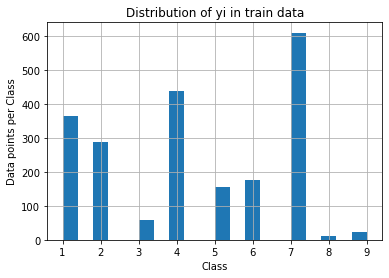

In [52]:
train_df['Class'].plot(kind='hist',bins=20)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

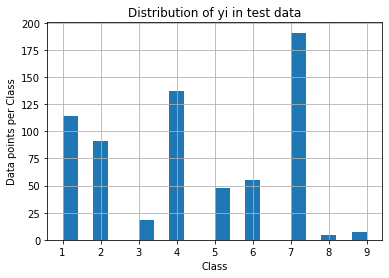

In [53]:
test_df['Class'].plot(kind='hist',bins=20)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

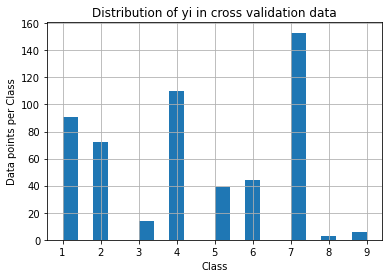

In [54]:
cv_df['Class'].plot(kind='hist',bins=20)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

In [55]:
#the all above were my own plots 

#lets see what that code are in notebook  where along with plot ,% of each class in each set in observed



In [56]:
train_df['Class'].value_counts().sort_values()

8     12
9     24
3     57
5    155
6    176
2    289
1    363
4    439
7    609
Name: Class, dtype: int64

In [57]:
train_df['Class'].value_counts().sort_index()
# we can also make a plot with that,

1    363
2    289
3     57
4    439
5    155
6    176
7    609
8     12
9     24
Name: Class, dtype: int64

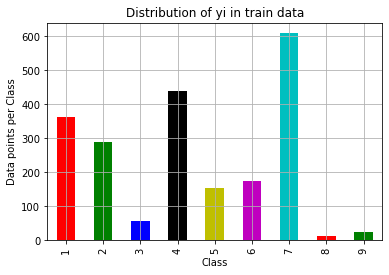

Number of train data pts in class  7 : 609 ( 28.672 % )
Number of train data pts in class  4 : 439 ( 20.669 % )
Number of train data pts in class  1 : 363 ( 17.09 % )
Number of train data pts in class  2 : 289 ( 13.606 % )
Number of train data pts in class  6 : 176 ( 8.286 % )
Number of train data pts in class  5 : 155 ( 7.298 % )
Number of train data pts in class  3 : 57 ( 2.684 % )
Number of train data pts in class  9 : 24 ( 1.13 % )
Number of train data pts in class  8 : 12 ( 0.565 % )


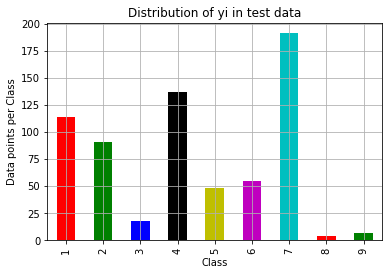

Number of test data pts in class  7 : 191 ( 28.722 % )
Number of test data pts in class  4 : 137 ( 20.602 % )
Number of test data pts in class  1 : 114 ( 17.143 % )
Number of test data pts in class  2 : 91 ( 13.684 % )
Number of test data pts in class  6 : 55 ( 8.271 % )
Number of test data pts in class  5 : 48 ( 7.218 % )
Number of test data pts in class  3 : 18 ( 2.707 % )
Number of test data pts in class  9 : 7 ( 1.053 % )
Number of test data pts in class  8 : 4 ( 0.602 % )


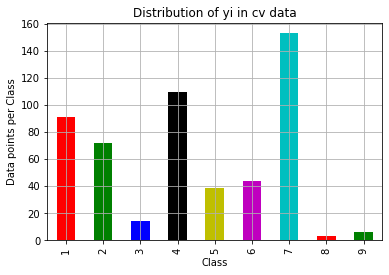

Number of cv data pts in class  7 : 153 ( 28.759 % )
Number of cv data pts in class  4 : 110 ( 20.677 % )
Number of cv data pts in class  1 : 91 ( 17.105 % )
Number of cv data pts in class  2 : 72 ( 13.534 % )
Number of cv data pts in class  6 : 44 ( 8.271 % )
Number of cv data pts in class  5 : 39 ( 7.331 % )
Number of cv data pts in class  3 : 14 ( 2.632 % )
Number of cv data pts in class  9 : 6 ( 1.128 % )
Number of cv data pts in class  8 : 3 ( 0.564 % )


In [58]:
#so it return a dict ,kets as class labels and values as the number of data point in each class

train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

y_colors=[i for i in 'rgbkymc' ]
train_class_distribution.plot(kind='bar',color=y_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


print("="*100)
#now for percentage of each class in each set ,we need this code,in sorted order of highest to lowest percentage 
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sort_yi= np.argsort(-train_class_distribution.values)

for i in sort_yi:
    print("Number of train data pts in class ",i+1,':',train_class_distribution.values[i],'(', \
         np.round((train_class_distribution.values[i]*100/train_class_distribution.values.sum()),3),'% )')
    
test_class_distribution.plot(kind='bar',color=y_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

print("="*100)
#now for percentage of each class in each set ,we need this code,in sorted order of highest to lowest percentage 
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sort_yi= np.argsort(-test_class_distribution.values)

for i in sort_yi:
    print("Number of test data pts in class ",i+1,':',test_class_distribution.values[i],'(', \
         np.round((test_class_distribution.values[i]*100/test_class_distribution.values.sum()),3),'% )')
    

cv_class_distribution.plot(kind='bar',color=y_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cv data')
plt.grid()
plt.show()

#now for percentage of each class in each set ,we need this code,in sorted order of highest to lowest percentage 
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order

sort_yi= np.argsort(-cv_class_distribution.values)

for i in sort_yi:
    print("Number of cv data pts in class ",i+1,':',cv_class_distribution.values[i],'(', \
         np.round((cv_class_distribution.values[i]*100/cv_class_distribution.values.sum()),3),'% )')


In [59]:
# well that is affect of startify = y_label because it distribute the labels in approximately equally in each set

In [60]:
#In tarining data, 
#we are dealing with multiclass classification problem
# Dataset is quite 'imbalanced'
# Most domininating is class 7 followed by 4
# Least occuring pts are class 8 followed by class 9

In [61]:
#Distibution of class sholuld be roughly the same in case of all set(Train test and cv)

<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

The confusion matrix should be something like that

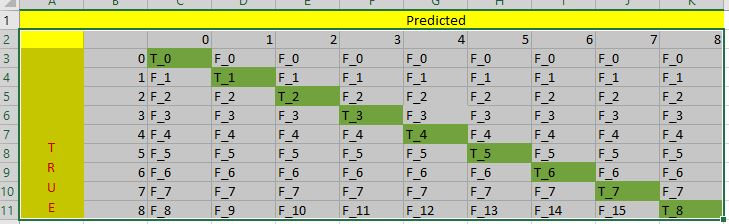


THis is when predicted is 1 and actual is The T_1 ,else if predicted is 0 the F_1

In [10]:
# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(test_y,predict_y):
    C = confusion_matrix(test_y,predict_y)
    #as we have 9 classes hence there will be 9*9 confusion matrix,each cell (i,j) reprsent i as predicted and J as actual
    #a 2*2 matrix as[[TN,FP],
                    #[[FN,TP]]
     # now we need to get the recall matrix ,"Recall" is  TP/(Total positive pts = TP+FN),SO recall is how good 
    # we have predited the Postive points correctly ,
    # So we can divide the each element by the denominator ie.
    #we need to add all the column value and and devide the each cell in that column so we get this value and so in each
    # row sum is 1
    
     #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    A =(((C.T / (C.sum(axis=1)))).T)
    # SImilarly we can get the Precision matrix, 
    #Precision is How well we have identified point correctly in true and predicted of that class
    # Precision = TP/(Tp+FP)
    #so we need a sum of row and divide each value to the row sum
    B = (C / C.sum(axis=0))
    
    labels = list(range(1,10))
    
    # representing A in heatmap format
    print("-"*30, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C,annot=True,cmap="YlGnBu",fmt=".3f",xticklabels= labels,yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    #lables = list(range(1,10))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    lables = list(range(1,10))
    print("-"*20, "Recall matrix (Row Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss for the cross validation Data using Random model is  2.398762785990975
Auc for the cross validation Data using Random model is  0.5692045169673464
Log loss for the Test set Data using Random model is  2.503987047557708
AUC for the Test set Data using Random model is  0.4888109208532596
------------------------------ Confusion matrix --------------------


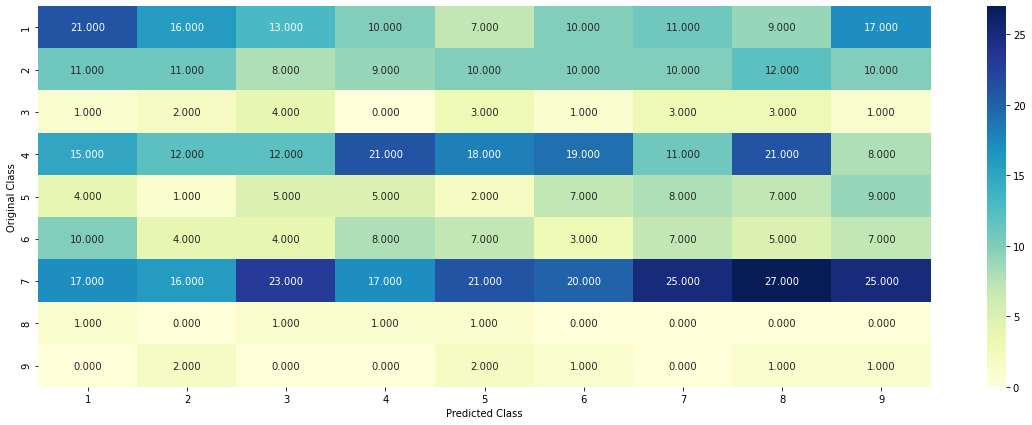

-------------------- Precision matrix (Columm Sum=1) --------------------


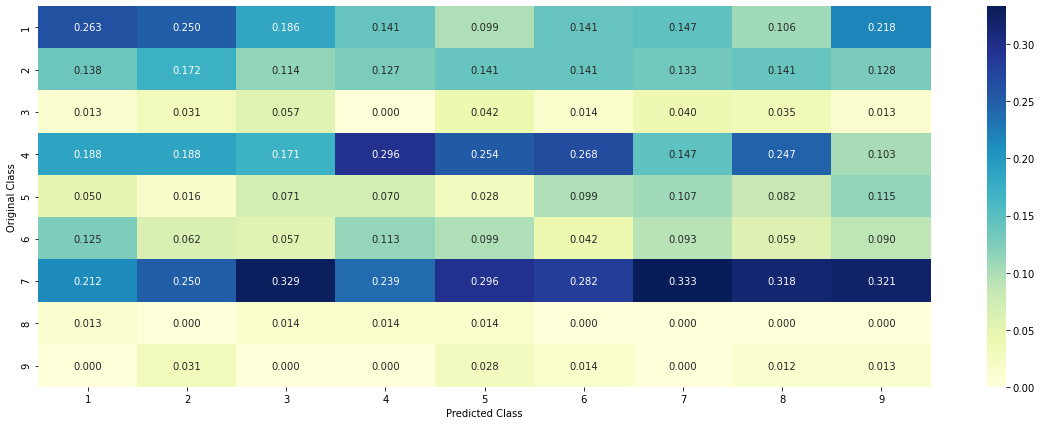

-------------------- Recall matrix (Row Sum=1) --------------------


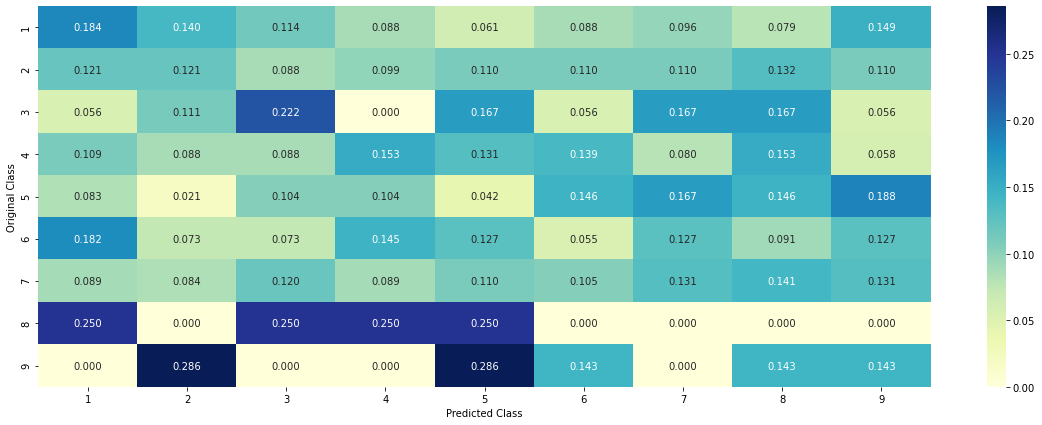

In [63]:
#In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1.
#so we can generate 9 random number and add then and divide number with the sum

#lts do it


test_data_len= test_df.shape[0]
cv_data_len = cv_df.shape[0]

#we can create an aray that has excatly as same isze as Cv data

#cross validatio error for a Random moddel
cv_predicted_y = np.zeros((cv_data_len,9))
#now generate random number
for i in range(cv_data_len):
    rand_prob = np.random.rand(1,9) #this will generate a list of 9 random number I.e. prob for each class for a row,but sum !=1
    #print(rand_prob)
    #print(rand_prob/sum(sum(rand_prob)))
    cv_predicted_y[i]= ((rand_prob/sum(sum(rand_prob)))[0]) #two times sum because each row is 2D matrix
print("Log loss for the cross validation Data using Random model is ",log_loss(y_cv,cv_predicted_y,eps=1e-15))
print("Auc for the cross validation Data using Random model is ",roc_auc_score(y_cv,cv_predicted_y,multi_class='ovr'))

#Test Set error

#we can do the same as earlier
test_predicted_y = np.zeros((test_data_len,9))

for i in range(test_data_len):
    rand_prob = np.random.rand(1,9)
    #print(rand_prob)
    test_predicted_y[i]= ((rand_prob/sum(sum(rand_prob)))[0])
    #print(test_predicted_y[i])
    
print("Log loss for the Test set Data using Random model is ",log_loss(y_test,test_predicted_y,eps=1e-15))
print("AUC for the Test set Data using Random model is ",roc_auc_score(y_test,test_predicted_y,multi_class='ovr'))
#now for confusion matrix we would need the actual label Hence we will use the argmax 
#print(test_predicted_y.shape)(665, 9)
predicted_y = np.argmax(test_predicted_y,axis=1) #axis =1 because we want to reduce the column or max value in all column for all rows

#print(predicted_y.shape)(665,)
#print(predicted_y)

#now get the Confusion matrix

plot_confusion_matrix(y_test,predicted_y+1) #one because the index start from 0 but label starts from one



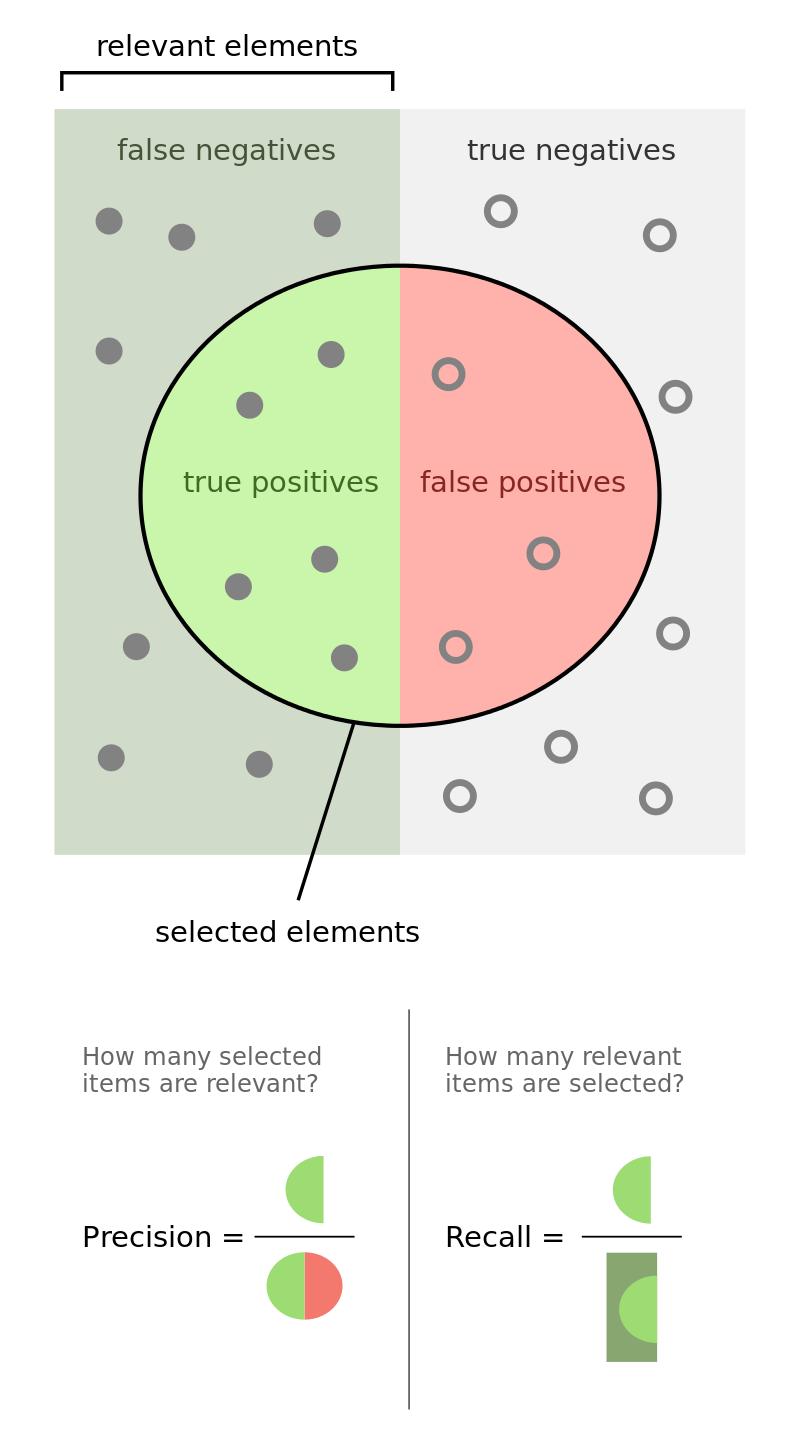

In [64]:
from IPython import display
from base64 import b64decode,b64encode
# with open(r"C:\Users\jhaki\Pictures\800px-Precisionrecall.png", "rb") as image2string: #read the image from source and get base64code
#     converted_string = b64encode(image2string.read())
# print(converted_string)
#copy base64 data here below
base64_data = "iVBORw0KGgoAAAANSUhEUgAAAyAAAAWvCAIAAADYJAIIAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOzdd1xT9/4/8E8SCAl7I1M2CDIVRAFX3bt1dP86btXb22Ht7bq29367bm2/9XbaofV666pWrXsjbgVlCLKRvUfYJGTn98fpNzdNAibhQAK8no/76MVzTj555xMgLz7ncz6HoVAoCAAAAADQh2nsAgAAAABGGwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCwAAAAAmiFgAQAAANAMAQsAAACAZghYAAAAADRDwAIAAACgGQIWAAAAAM0QsAAAAABohoAFAAAAQDMELAAAAACaIWABAAAA0AwBCwAAAIBmCFgAAAAANEPAAgAAAKAZAhYAAAAAzRCwAAAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCxjunjxIoPBYDAYe/fuNXYtoxC6FwAAjAUBCwAAAIBmCFgwTE6dOkWNJx0+fNjYtYxF6H8AgOGEgAUAAABAMwQsAAAAAJohYAEAAADQDAFLJ3v37qXmr1y8eJEQcurUqYcfftjHx4fNZltbW6seWVtbu2nTpri4OGdnZzab7erqOnfu3O+//14oFBrwvDq2JhaLnZycGAxGZGTkAK2tXbuWehXFxcXKjXV1dd99992aNWtCQ0Otra2pZ5kxY8ann37a0dGhS2+kpKSsWLHC09PTwsLCw8NjzZo1GRkZqsenp6czGIylS5dS/1y9ejVDxYIFC2jvkKFoTe1VnzhxYtGiRe7u7lwuNzQ09J133mlra1MeXFhYuH79+qCgIC6X6+LismLFiszMzCGqhMb+7+np2bJly4wZM1xcXMzNze3s7AIDA5OTkzdt2nTt2jU9ehYAABSggz179lDddf78+eeee061Ay0tLZWHbdmyxcLCQms/BwYG5ufnqzWbkpJC7d2zZ4/mk+rV2l/+8hdqV3Z2ttaXIBAIbG1tCSFTpkxRbmxubmYwGP19b7i6ut68eXOA3khJSdmwYYPmA1ks1u7du5XHp6WlDfAdOH/+fB3eASN3r+qrvnDhwtq1azUfFRwcXF9fr1Aodu3apdmyubn5iRMnaHldQ9T/BQUFXl5e/R3m6emp49sEAAAKhQIBSyfKj7SZM2dSH3sff/zxoUOHdu3a9dJLL1HH/OMf/6COCQ8P//LLL69evXr37t2zZ8+++OKLZmZmhBB3d/eGhgbVZgdIAPq2dufOHer4DRs2aH0Jv/zyC3XA999/r9zY2NjIYDCmT5/+ySefnDp1KiMj4+bNm7/88svKlSup4OXs7EyFBq29MXfuXELI5MmTv/vuu5SUlBMnTrzwwgvUA7lcblVVleqjTp48ST3q0KFDena/8btX9VU/9NBDhJAZM2b8+9//Tk1N3b9//4wZM6hdjzzySGpqKpPJ9Pb2/uyzz86fP3/69Ok///nPVJ84OTm1t7fTWAmN/S+XyydOnEgd8PTTTx85cuT27dv37t27fPny1q1bly9f7ufnp+9bBgAwliFg6UT5kUZ9iIpEIrUDrl27Rn2wrVu3TiKRqO1NTU01NzcnhDz//POq2/tLAIa1FhYWRghxcXERi8WaL2H+/PmEEAsLC9XPeIFAUFJSovUlp6SksFgsQsjrr78+QG+8+OKLMplMde///u//Urs2bdqkun0wAcsUulf1Vb/xxhuquyQSybRp0wghDAbD2dl5ypQpXV1dqge8//771AO3bt1KbyV09f/du3e1Pkqpo6ND63YAANAKAUsnyo80V1fX7u5uzQPmzZtHCAkKCtL8mKT8+c9/JoRwOJy+vj7lxv4SgGGtffbZZ1Rrx48fVzu+oaGBSkurVq3S8SUrFIonnniCEDJ+/Hi17creCAkJ0axQJBI5OjoSQhITE1W3DyZgmUL3Kl91eHi4WqZRKBS//vortZfJZJaWlqrt7ezspIajVq5cSWMlNPb/6dOnqb3nz5/XWgkAAOgFk9z189hjj9nY2Kht7OrqSk1NJYSsXr2a+hzVNGfOHEKIUChUDhX0x+DWnnrqKSpF7d69W+34vXv3ymQyQsizzz478LOrmjRpEiGkurq6v9nuTz/9tGaFbDabemB5ebnuzzUAE+lepSeffJLJVP/BoV4yISQhISEoKEhtr52dXUBAAPljnwy+Ehr739PTk/pi586dEolE9wcCAIBWCFj6iYuL09yYlZVFxZdPP/3UrB9r1qyhDm5ubh74KQxuzcPDg5qUc/Lkyfb2dtU2d+3aRQhxc3OjThSqycjIePXVV+Pj452cnNhstvL6sr/+9a/UATweT2upylk7apycnAgh3d3dA79SHZlI9yqFh4drbnRwcBhgLyGEGlVS7ZPBV0Jj/0dGRlLf27/++qufn98rr7xy+PDhhoYG3VsAAABVCFj6cXZ21tzY0tJCfSGXy2X9kMvl1DEPXFBgMK0988wzhBCxWHzgwAHlxqysrIKCAkLIk08+qTbgIZVK165dGx8f/+2332ZkZLS3t2sdvRAIBFpLtbKy0rqdGkij0sPgmU73UiwtLTU3Kse0tO5VHqDaJ4OvhMb+ZzAYR48eTU5OJoTU19dv3bp19erVnp6egYGBGzduLCkp0b0pAAAgCFj60noqRyqVUl/s2LHjgSdlH3vssYGfYjCtrVixws7OjvzfkBVF+TUVv1T9/e9/37FjByEkMTFx3759xcXF3d3dUqmUavzrr7+mDlMoFLp1z5Awne415dc1eJ6enteuXbt+/frGjRsnT55Mza8vLy//6quvwsPDN2/ePNQFAACMJtpnfoBeXFxcqC9UF/A0SmscDufRRx/dvn37nTt3SkpKqEnQ+/fvJ4TExMSoLUMqFAq//fZbQkhSUtLVq1c15xWpnWc0FtPpXnqZTiWqkpKSkpKSCCFCoTA9Pf3IkSM7duzo6+vbtGlTTEyMXqvCAgCMZRjBokFsbCx1sb3yUiwjtqacxk4NXJ05c4aaQaU5fFVcXMzn8wkhjz/+uGa6IoQo19aixQArmg7MpLqXRsNcib79z+FwZs6c+c033xw+fJjaonreGQAABoaARQMXFxdq8kpRUdGhQ4eM29rUqVODg4MJIXv27JHL5VTMMjc3p9ZcUKWc1qN1ilVpaemFCxf0ffYBcLlctefVkUl1L42GuRKD+3/evHlU/u7vWgcAANCEgEWPDz74QLli5I0bN7QeU1pa+uOPPw5Da9RgVV1d3cGDB6nRkYULFypPSCkFBARQz7Jv3z6RSKS6i8fjPfroo3TNUqcoFwIoLS3V97Em1b00Gs5KBu7/zMzMvLw8rQ9MSUmh5tr7+/sPvgwAgDECAYseM2fO/PDDDwkhnZ2dM2fOfOKJJ3799deMjIysrKyzZ89u3rw5OTk5NDRUebZlSFt7+umnqSGHF198USwWk36Wv3JxcVmyZAkhJCcnJykpaf/+/dnZ2WlpaZ9//nlkZGROTk5iYqKB3aFNUFCQu7s7IeT777/fu3dvQUFBWVlZWVlZY2PjAx9rUt1Lo+GsZOD+T09Pp1ZqeP/990+cOJGVlZWbm3vhwoU333xz9erVhBA2m71u3brBlwEAMFY88PIlUPzx9roDHLZ9+3Zra+sBevuRRx5RPX7guxHr25oqaoFKipOTk+a9fSgNDQ2BgYGaLbNYrE8//ZSaAk8IuXv3rl698eSTTxJCLCws1Lb/8MMPms+l+82ejdu9A79q5Vqs/d0Lkkqrmsvi016JwqD+V77XWtnY2Pz2229anwsAALTCVYR0Wrt27cqVK3fs2JGSklJQUNDW1sZgMBwdHYOCgqZOnbpo0SJqzs0wtPbMM89cvHiR+vrxxx9ns9laD3N3d8/Kyvriiy+OHj16//59BoMxbty4mTNnvvjii5MnT966dateL/+B/vznP3t5eW3bti07O5vH41Gja7ozne6l17BVMkD/v/DCCwEBAampqZmZmfX19c3NzX19ffb29qGhofPmzVu3bp2bmxstNQAAjBEMhVGXOAIAAAAYfTAHCwAAAIBmCFgAAAAANEPAAgAAAKAZAhYAAAAAzRCwAAAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzM2MXYAgPD4/GxkZjVwEAQ+tf//rX66+/buwqAAAMgREsAAAAAJohYAEAAADQbESeIlSaMWPGwoULjV0FANDpb3/7m0KhMHYVAACDMrIDVkJCwttvv23sKgCATps2bULAAoCRDqcIAQAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCwAAAAAmiFgAQAAANAMAQsAAACAZghYAAAAADQzM3YBhrCzsxMKhYQQLpdr7FoAgGYODg5yuZwQwuFwjF0LAICBGAqFwtg1AAAAAIwqOEUIAAAAQDMELAAAAACaIWABAAAA0AwBCwAAAIBmCFgAAAAANEPAAgAAAKAZAhYAAAAAzRCwAAAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzM2MX8GAt7Y1tXc3GrgIAjM/bJdDYJQCA8bHZbDabbewqHmAEBCy5QiaRiY1dBQAYn1wuN3YJAAA6wSlCAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCwAAAAAmiFgAQAAANAMAQsAAACAZghYAAAAADRDwAIAAACgGQIWAAAAAM0QsAAAAABohoAFAAAAQDMELAAAAACaIWABAAAA0AwBCwAAAIBmCFgAAAAANEPAAgAAAKAZAhYAAAAAzRCwAAAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGZmxi5gDJGIxVduXLpXkMfjtYjEYkKIt6f3xpffMKy10rKSH//9PSHkyTVPTYqJo7NQ0B/eDoCxKTs7+4033iCE/O1vf5s7d66xywETgoA1TCRS6dbt39TW1xq7EAAAABhyCFjD5E5mGpWuYqJikxKSbaxtFAyGuRn6f2QoLC7YsWs7IeSZJ5+Lmhht7HJglEhLS3v33XcJIe+///706dONXQ5ogfcIDIYP+GFSUlpMCLGw4Dy+6kkz5KpRx8vT56W1rxBCXF3djF0LAAyfoKCgL7/8khDi4+Nj7FrAtOCTfph0dncSQhwdHJCuRiVLLjfAP9DYVQDAcLOxsYmKijJ2FWCKcBXhMJFKZYQQMxbSFQAAwOjHUCgUxq7hAZra6lo6GoxdhYFy83N27ftPf3vf3/SRrY0tIaSzqzO/MK+isqyhsaGzq0smk3K43HGubhNCJiTEJ1lyuZqPHeCyNaFIlHb7ZmFxflNzc59QYG7OtrGytrG19ff1Dw0OC/AL0Gyts6vjZvqN0rLS9vY2oVDI4XI93T0jwiPiJ0/Va6JY1t2MfQf3EkL+/Ke/BAeGlJSV3Ey7XlNbzRcILC2tAnz9ZiU/5O3d70C6AWXI5LJb6Teyc7KaW1tkcpmDrX3YhInTE2fY29l//f0X1bXV49zc33rtnT8+ix69XV1T9fUPX/ZXcEhw6PrnXiTa3g6ZTPo///y7oE/gPs79zQ3v9NfCwSMH0jPSCCHvvL7J1eUPpxf17Q0D3vcRx9c11Ngl0KOwsPDll1/ub29cXNxnn31GCElJSdm8eTMhZMuWLbGxsWlpaWfPni0pKeno6DAzMztz5gwhZPv27QcOHCCEHD161M7OTrO1tWvXlpeXBwcH//jjj5p7W1tbjx8/npWV1djYKBAIrK2t/f39k5OTFy5cyGazdX9FaqVmZWUdO3aspKSkq6vL1tZ24sSJjz32WEhISH8PN6AMqVR64sSJ1NTUmpoaqVTq6uo6derUVatWOTs7v/TSS0VFRb6+vjt37lR9CI/Hu3HjRm5ubkVFRWtrq1Qqtba2Hj9+fHx8/JIlS2xsbFQP1vE90ryKUCKRrFq1qqenx9/ff8eOHf218K9//ev06dOEkJ9//lnt9KK+vdHX13fixIn09PSqqqre3l4LCwt7e3snJ6eIiIi4uLhROcDG4XD0+v40CgyoGF9vb+9Hn72vlnT5/N7yyt7yyvIrN64899QLfuP9dGytuaVp284fOrs6lVtEIqFIJOS18yqrKjKzM/7nbx+qPeTK9UtnLpyWSqWqz15aVlJaVnLtxpXnnn5hnJu7Aa/r2Mkj125dVf6zp6crJy8ntyD38VVPTta2kIEBZfT29v648/uGxnrllhZeS8v1S3cy0597+gWtVdHb2wNgscxioibdTL/e2NRY31Dn6eGleYxEIrl77y4hZLz3eLV0pW9vGPC+wwgil8s///zzs2fPKrewWKzBN3vw4MGdO3eKxWLlls7Ozuzs7Ozs7MOHD3/00Ue+vr4GNPvdd9/99ttvyn+2tbVdvXr1+vXrb7/9ttaFDAwoo6Oj46233iovL1duqa2tra2tPXv27Icfav9W7+joePTRR9V+9js7Ozs7O3Nzcw8fPvzhhx+Gh4fr/3LVmZubz549+/jx4xUVFWVlZYGBWiYPiESiy5cvE0ImTJiglq707Y2qqqq33nqLx+MptwgEAoFA0NDQkJeXl5KS8uuvvw7+RYEBELCGVtTE6C82f00I+d+vPm1qbtS68JVcISeEBPgFhAaHebi7W1vZSGWyjs6Oe/k5eQX3ent7d+7e8eZrb1NjXQNTKBS79v9MfcpOjomLCI+0s7MzN2MLBPzG5sbSspKGRvWxwHMpZy5cOk8IGefmPiVuqpeHF5fD6e7pzi/MT8+41drG++HfP7zxyl9tbLT8ZTyAy1dTS8pKvL184ifFuzi7SiSSgqL825npCrni0NFfA3wDHRwcBlmGXC7/adc2Kl35jfdLmjrdzdVNJBIVlxZduXnl5307ORYczcL07e3xPr5fbP7asKsI42Pjb6ZfJ4RkZN3RGrDyCvNEIiEhJG5S/GB6w4D3HYwrLCzs0qVLul+htm/fvtzcXE9PzwULFnh7ewuFwuLi4kHW8PPPP+/evZsQ4uvru2jRoqCgIGtr67a2tlu3bp0+fbq+vv7NN9/88ccfnZyc9Gp2//79WVlZISEhylLT0tLOnDkjl8u/+OKLyMhIN7c//C1hQBkymWzTpk1UugoPD3/kkUd8fHwEAsGdO3cOHz78wQcfcLWN+lPRKioqKi4uzt/f38HBQSqVNjc3X7169caNGx0dHe+9995PP/3k7OxMHa/ve6RqwYIFx48fJ4ScP39ea8C6efOmQCAghMyfP38wvaFQKD766CMqXc2dOzcpKcnFxYXNZvf09FRWVmZlZalmUBhmCFjGx+Vw33l9k4uzq+pGv/F+sVGxpWUl2/7zA1/Qe/napeWLVzywqcamhqamRkLInFlzF81bororwD8waWpyX1+f6saKqvKUyxcIIVPjp61cvprJ/H1Onoe7Z2jwhKiIqO07f+zp6Tp94fRjK5/Q60WVlJVMm5K0cvlKBuP3NsMnTHRxcT155rhEIknLuKlanmFl3Lx9s7auhhASHRn79GNPK5/Iz9c/Ijxq67Zv+PxezcJo7O0H8vb2cXMd19zSlJWbtXTxchZTfcghI/s2IcTMzCw6ctJgekPf9x1GnNzc3OTk5Pfee8/c3JzaMm/evME0eO/evT179hBClixZsmHDBuV4WEBAQHx8/IwZM95+++22tradO3e++eaberWclZW1bNmyV199VfmtO23aNE9Pz+3bt4tEolOnTv3pT38aZBknT54sKSkhhMyaNevdd99VPlFERMT06dM3bNjQ2fnfoVwlKyurXbt2eXn94U+d8PDw2bNnZ2dnv/XWW11dXYcOHXrxxRf1er1ahYSE+Pr6VlVVpaamrl+/XvPapvPnzxNC2Gz2rFmzBtMbFRUVlZWVhJAnn3xStWMJIVFRUStWrOjt1fJrEIYHJrkbn7m5udrnvVJwYEhMRCwh5F5Bji5NdXZ1UV8E+Gm/ok3tD7uUSxcUCoWzs4vqB7lSUEDwlLgEQsjdnCyJyrkqXbg6uz6y7L/pijJ92nRLriUhpKzyD39UGVbGzbTr1CtavWKN2hN5eXo9NHO21sJo7G1dUENTfH5vUUmR2q6enq7SshJCSHjoRNWJXwb0hr7vO4w4Dg4O77zzjjJdDd7evXsVCoWXl5fqB7lSTEzMwoULCSGpqamq56p04e3t/corr6h9665cuZKa4ZSbmzv4Mo4dO0YIsba23rhxo9oTBQUFPf7441oLs7CwUEtXSrGxsVTQuXbtmm6v8sGoBNzZ2Xnnzh21XW1tbVlZWYSQhIQE1YlfBvSG8sxgfxOtrK2taXgxYBAELFPn7eVNCOno6BDoMAihnOJ6O/O2TC4b+GChsK+0vIQQEh0RrflBTgkODCGESKTS+oY6vcqeFBun2SaLZebt6U0IaW/773QBw8ro7OpsaW0mhESGRWpND/GTp+pVMEWv3tbF5Jg4BpNBCMnMVv8lm5mTpZArCCHxk/97ftCw3tDrfYeRaNasWTSmZD6fn52dTQiZMWNGf3O5Jk+eTAgRi8X379/Xq/F58+Zptmlubh4cHEwIaWj479lqw8rg8Xg1NTWEkOTkZK3pYcGCBXoVTKHKa25u7unpMeDhmubMmUP9CFODVapSUlLkcjn5Y6mG9YbyhObZs2elev4ZDEMNpwhNRW1tTUZORnVtVRuPJxKJND8mBfxerZcTqvIY5+Ht7VNbW5NzL7uyqjwyPNLfP9BvvL/W+Vu19bXUB3zqldTUqxe1t6hgUP+v7y8d937mxVtaWRFC+kTCQZbR2PT7r+n+rkm0s7WzsbHr6enSupeW3taFrY1tSGBocWlRQVGBoE9ADeBRMrLuEEJsrG1Cgib8tzCDekOv9x1GogGuvzNAaWkp9QG/f//+/fv3D3xwR0eHXo33Ny/e1taWEMLn8wdZRkVFBfVFf33i4uLi5OTU1tamdW9JScmFCxcKCwsbGhr6+vo0Q0lXV5fa5YSGcXZ2njx58p07d9LT03t6elTbvHDhAiHEwcEhLu6/l/sY1hv+/v4hISElJSWXL1/Oz89PTEyMjo4OCwtTBi8wIgQs45PL5YePHaSu1R+ASPLggXoGg/H8Uy/s2b+roqq8q7vretr162nXCSHOjs7hE8KnJiS5qpwdU56bVyjkpN/FOn7fIZVKHvjsqvq7gJbJYBJCFHL5IMsQCH7/NW1j3e+vQltra82ARWNv6yguNr64tEgmk97NzUpMSKY21tbXNjU3EkJioyerjlQZ1ht6ve8wEmldf8FgyilKcpWfxP5IJPr97Pc30kaNyqhexGdYGV3/d0Jc7UIZVfb29poBSyaTffXVV9TKCAMQiUQPLEZH8+fPv3PnjkQiuXTp0vLly6mNpaWlVVVVhJA5c+aojlQZ1hsMBuPDDz/85z//ee/evdbW1mPHjlHnTz08PKZNm7Z06VJvb2+6Xg7oCwHL+M5cOEN93vv6+iclJHl5etva2FmYs6lTS9dvXT168gghhKFba3a2di+vf7WyquJeQW5FVUVDQ71MLuO1867evHot7dqiuUsemjmHOlL+f8M2j658fMrkhCF4ZToZujK05hN6e1sXE8MjORyuUNiXkZWhDFgZ/3fGMC72D9cPGtwbur/vMBLRewcI5bDNG2+8sWjRIhpbNuUydu7cSaWriRMnLl++PDg42NnZ2cLCgvoL58iRI1u3bqX3GRMTE62srPh8/vnz55UBS3nGUO36QYN7w8XF5auvvsrLy7t+/XpeXl55eblUKm1oaDh8+PCRI0eef/75J57Q7xIloAsClpFJpNIbt64RQvx8/V9e94raZG1CCHUpr778fP39fP2p9mtqqnILcm9npEkkktPnT3p6eIYGTyCEWFv9PvZDTWYyFsPK4HKtqC96+r9GprdX/bTmEPX2wMzNzGIiY9Lu3Kqpq27htbg6u8rksrs52YQQTw8vD3cP1YMH+abo8r7DKKMcBelv5EPzGlJ7e3vqi9ra2qEr7IEMK4M61UhUhnw0KUe5lMRi8dGjRwkhERERX375peYER7qmXqmiLhI8depUcXFxbW2tt7e3VCq9dOkSISQwMNDf31/14EG+KREREREREYQQsVhcVFR07dq1M2fOiESiHTt2BAYGxsfHP7AFoB0muRtZa2uzWCIihMRGxWp+3hNCaupqBtO+uZlZgH/gI0tXPvPE89SWu/eyqS+8PL0YDAYhpLCoYDBPMUiGleE+7vc5XjV11VoP6O7p7u7pVttocG8zBjeiFTdpCvVFRtZtQkhRcSFf0Es0lr8i9L0pA7zvYDoYg/zGIoQQYmn5+8S+7m71b3hCSF9fX1NTk9rGoKAg6qnT09MHX4DBDCvDz+/3dYD7WwmMx+OprrpJqa2tFQqFhJDZs2drvXykqEj9Ol/KIN8j5TAVNXB1+/ZtKvypDV8R+t4UNpsdFRX1yiuvvP/++9QWakVTGH4IWEamPJUuFmuZ6NDKaym+r/3HXl+hwaFUpOjt/X32kpWVtb+vPyGkubU5J4+2hQn0ZVgZDvYO1Lyi/IJ7QqGWK/5uZ2r5JWVwb5uZ/X55vFTP+SgUXx9fam2IrLuZCoWcOj/IYrImRU1SO5L2N0XzfQfTYWFhQX0xmHk/7u6//7FRWFiouff8+fOaI1v29vaRkZGEkOrq6qtXr2o+angYVoarqys1r+jGjRuqU+aVNK/aIyo9TMUsNXV1dZmZmVqfbpDvUXh4OLU2xIULF+RyOTW93czM7KGHHlI7kvY3ZfLk3+d3ao7nwSiks4kAACAASURBVPBAwDIyZydn6q+WrJxMtetZ+ILeXb/8TF1TpqPauprGpkatu0ruFysUckKI6oLIC+Ysop790NEDlVUVWh/Yymu5dfum7jUYwLAykqYmE0IEfX2Hjx1Su/1FfWP9pSspmo0Y3Nt2dr+P3rdo/GWsI2quVWdXZ869nMLiQkLIhJAJVlbaLjLXvzf0fd/BRCgv9aqr028ZFFWRkZHU5+ihQ4fU0kNxcfFPP/2k9VHPPvss9W32r3/9Ky8vT+sxdXV1J0+eNLgwXRhWxooVKwghPT09X331ldrPfnl5+S+//KLZiIeHB/VEFy9eVFvZq6ur64MPPujvBOvg3yNqsIrH4129epUanYqPj1eeEFRlQG+UlJQoL6tUk5WVRb0oZQSHYYY5WEZmZWUdFhpeUJTf0Fj/7bavZyTNcnV2lcqkldUVV65f6enp8vX1r+rnU1ZTVW310ROHvb18wkLCPD297WztmExmb29PaVnJzbSbhBAWy2xa3DTl8QH+gQvmLjx74UxfX9/Wn76JiYiZGBbh5OBMmIze3p6GxobCkoKq6srAgKBpUxKH5PUPooxpCUkZdzNq62qyc7O6ujuTp81wdXEVicXFpUVXrqWamZlbWdm0d7Spzlc3uLddnJypRR9upV93dXb29PBimZkTQjhscx1vIjQ5dvLZlDMKhfzw8YMymZSonDccfG/o+76DifD09KQWFDh+/LiXl1dQUBC1lCiHw9E9EDs6Os6ePfvixYtVVVUvvfTSypUrPTw8enp6MjIyzp8/7+rqKpPJNM8SRkVFPffcczt37uzt7d24cePMmTMTExOpFNLZ2VlWVnb79u38/PyYmJilS5fS/LIHXcayZcsuXLhQUlKSmprK4/EeeeQRb2/vvr6+O3fuHDx40Nzc3M7OrqmpSfXsnr29/dSpU2/dulVeXr5hw4bVq1d7e3uLxeK8vLzffvutra1t4sSJ+fn5mhUO/j2aN2/ef/7zH7lc/uWXX1KD6JrnBw3ujaKiom+++SYkJCQhISEoKMjZ2ZnFYnV0dGRlZVH36jE3N1+yZInWp4OhhoBlfGseXrO1pam1jVdbV7P3wC7ldgaTsXjBUjbbQveARamtq6nVNpeIY2Hx+Oonx437w18zc2fNt7GyOX76qEgszs7Nzs7VMlOHYzHk64AbUAaTyVz7zHrqZs/lleXlKqvDc7ncZ598/uTZE+0dbeZmf1j82rDeZjCY8x+af/jYQb6Av+/gXuX2kODQ9c/pdGMNezuHoICg0rISasaxlaVVWGhYfwcb9qbo9b6DKWAymf/v//2/L7/8sru7e/PmzcrtcXFxn332me7tvPTSS+Xl5ZWVlZWVlVu2bFFud3d3/+STT/q7+fFTTz3l4ODw/fff9/X1Xbp0iZp8rcbKykr3MgxjQBksFuuTTz6hbvacm5urujq8tbX1Bx98sG3btqamJrXFYjZu3FhdXV1fX19SUvLxxx8rtzOZzHXr1nE4HK0Ba/DvkYuLS3R0dHZ2NrUIi62tbUJCvxcIG/amlJSUUPcOUsPlct955x3lrDUYZghYxmdjY/f6K29euX45r/BeK6+VMBi21rYB/gGJU5K8vXyoBY10lBA31dnR6X75/dq6mu7uzp7eHrFEwuVYurq6hgaFJMQnal01KiF+WmREdHpGWun9ksbmJoGAz2AQLtfK1dnZ18cvNCSMmhU01Awow9raeuPLf72VfiM7J6uppVmukNvb2k8InjAjaZaDgwM1N4vD+cMtnw3u7WlTEu3t7G/dvllXX8sXCKhRKL3ExcZR98YhhMRGxbJYA/306dUbhr3vYAqWLl3q7Ox86tSp+/fvd3V16bvoFMXOzm7r1q2//fbblStX6uvrmUymu7v7jBkzVq5cqZwCr9XixYunT59++vTpzMzM6urq7u5uBoNhY2Pj5eU1YcKEKVOmULOChpoBZTg4OPzwww8nTpxITU2trq6WyWQuLi5TpkxZtWqVm5sbNTdLLYg4OTlt27bt0KFD169fr6+vJ4Q4OjpGR0cvW7YsJCSEWj5Kq8G/R/Pnz6dWaSeEzJ49e+BbHunVG4sWLfLw8MjOzi4pKeHxeO3t7WKx2Nra2sfHZ/LkyUuWLBlgtTAYagy1E9gmqKmtrqWj4cHHAaiQSCSb3n9bJpclJiSvXL7K2OUAPXxdQ41dApg6kUi0dOlSqVS6fPnyDRs2GLscGBIcDqe/5axNBya5w+iUc+8udQMcP18MjwOMIVeuXKEuYZk4caKxa4ExDQELRrDunm7qEjk1rbyWE2ePE0IsudyIsOE4xwEAw4nH42m97q+urm7btm2EEBsbm6SkpGGvC+C/MAcLRrDbmWkZmXdioyf5+wU42jsSJqOrq7O4pOhm+nWhSEQIWbbk4YGnOwDASHTu3Llz587NmTMnMjLS1dWVyWS2trbevn37+PHj1HUkL774onIJKwCjQMCCkY3XzrtwScu6ggwmY8mCZfGx2pdCAICRrqGhYffu3ZrbmUzmCy+8sGDBguEvCUAVAhaMYJOj49nmFmUV91taW/j8XqFIaGFh4WDvGBQQNC0h2cXJ2dgFAsCQmDt3LofDycnJqamp6erqEggEXC7Xzc0tJiZm+fLlnp6exi4QAFcRAsDIgasIAYDgKkIAAACAsQkBCwAAAIBmCFgAAAAANEPAAgAAAKAZAhYAAAAAzRCwAAAAAGiGgAUAAABAMwQsAAAAAJohYAEAAADQDAELAAAAgGYIWAAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCwAAAAAmiFgAQAAANAMAQsAAACAZghYAAAAADRDwAIAAACgGQIWAAAAAM0QsAAAAABohoAFAAAAQDMELAAAAACaIWABAAAA0AwBCwAAAIBmCFgAAAAANDMzdgEAAECPnp6empqanp4ePp/P5/PNzMysrKysrKwcHR19fHzMzPALH2D44OcNAGBk6+3tLSwsLC8vb2lp6e8YMzMzHx+fwMDAkJAQJhPnLgCGHEOhUBi7hgdoaqtr6WgwdhUAYHy+rqHGLsG0SCSSzMzM7OxsqVSq40Ps7e0TExMDAwOHtDCAIcXhcNhstrGreACMYAEAjEgtLS2nTp3q6enR61GdnZ2nT58ODAycN2+eubn5ENUGAAhYAAAjz/379y9cuKD7wJWasrKyzs7OZcuW2djY0FsYAFBwJh4AYITJy8s7c+aMwemKwuPxDhw40N7eTldVAKAKAQsAYCSprq6+fPkyLU0JBIKTJ0+KRCJaWgMAVThFCAAwYvT09Jw9e7a/i5MYDIanp2dAQICTk5OlpaVMJuvt7W1sbKROCGp9SGdn57lz55YvXz6UVQOMRQhYAAAjxrVr1/obcPLz80tMTHRyclLd6Orq6u/vn5iYWFpaevPmze7ubs0HVlVVlZWV4bpCAHohYAEAjAzUWJTmdgaDMX369Ojo6AEeGxwc7Ovre+7cucrKSs29t27d8vf3x/pYADTCjxMAwMiQlpamdfu8efMGTlcUNpu9dOlSf39/zV0dHR2FhYWDrQ8AVCBgAQCMAL29vbW1tZrbY2JiQkN1XX+VwWAsWLDA3t5ec1dJScmg6gOAP0LAAgAYAaqqqjQ3crnchIQEvdoxNzdPTEzU3N7Q0CAUCg2rDQA0YQ7WoPR09fYJhMI+ESHEgsO24FjYOdgwGAxj1wUAo43WuVPR0dEG3DAkMDDQycmpra1NdaNcLq+urg4JCTG8RABQgYBliK6O7uryuqb61j6B+h98bLa5m6eLl6+H6zgnrY8FADAAj8fT3BgQEGBYawEBAWoBi3oKBCwAuiBg6UfA7yu6V1Zf3djfOjRisaS2sqG2ssF1nFNYTIidPW5DAQA0EAgEals4HI7aogy68/T01NzI5/MNaw0ANCFg6aGxriU77Z5UKtPl4JamtpZzt8KigoMm+A11YTDWKUgbr6O5vlUgEAoFQplMZsFhczgW9k527l6uFhwLY9cHgyUUCjVvjGNlZWVwg1of29vba3CDAKAGAUtX1RX1uXcK+hu40k5BCnNKJSJJWHTwkNUFY5pMJisvrqoorREJxZp7qyvq72UWObk4TIgMcnTRcuEYjBRabztoZmb4L3Bzc3MdnwUADIOApZPmhla909X/uV9UacFhB4T60l0UjHUNtc15WUXUNRb9USgUvJb26xdvu3u5RU8JZ7O1fKyC6eNyuZobNU8a6k7r2cDBDIkBgBos0/BgfXxhVto9w9IVpSCntL1V+43AAAygUCjysoozbuQMnK5UNdY1Xz5zs7Ndy51SwPSxWCzNjMXn8w2+T7PmDHdCiKWlpWGtAYAmBKwHy88pkYgHNXKuUChyMwuI4QkN4A/ys4srSqv1fZSwT3TrcmZ3Z89QlARDzcZG/YoZuVyude0GXWh9oK2trWGtAYAmBKwH6GzvbqhpGnw73Z29ddUNg28H4H5RZUVpjWGPlYglaVeyNJcXAdPn4+OjubGgoMCAprq7u6urtQR0b29vA1oDAK0QsB6guryOrqYqy7Tc5gJAL92dvYW5pYNpQdgnyssqoqseGDZa7yFYV1endYX3gd26dUsmU78a2sbGxtXV1bDaAEATAtZAFApFY10LXa118Lp0nzEDoFVBTsngzzU31rXwmtvpKAeGz7hx46ytrTW3p6Sk9PTocdq3uLhY620HAwMDDS8OADTgKsKB9HbzRULaIpFCoWhv7fDwGUdXgzDWdLZ3tzRqWc7bAPcLK5zdHGlpCoYHg8GIjY29du2a2naBQHD8+PHly5drTtLSVF5enpqaqrmdxWLFxMTQUygMDaFQWFdX19vby+fz+Xw+i8WysrKysrJydHT08PDALdpMEALWQGifqiLA3BcYBFqmA1JamtvEIjHbQu/b2IERRURE3L17V3O8qq2t7ddff50/f/4Ak6ikUmlmZuadO3e0XhAdGRmpSz6D4SeVSouLi0tLS+vr6+VyudZjOByOv79/aGgoZtGZFASsgfTRfUZPiIAFg9BUT9sJa6IgTfWtPv5a7pcCJsvMzCwxMfHcuXOau/h8/pEjR7y9vaOjo318fFTXIO3t7S0vL8/MzOxvoXYulxsXFzdURYOhpFJpbm5uZmamUPiADw6hUFhYWFhYWOjm5hYfH691uh4MPwSsgSj6+XPBYPJBLKYFY5xMJuvppvNWcZ0d3T4EAWuECQkJqaury8/P17q3tra2traWxWJZW1tbWVlJpVKBQDDwDXCYTOaCBQu0LmQKRtTe3n769On2dv3mSjY3N588eXLixIkzZ85ksVhDVBvoCAFrIFxLDs0NcnFXODBQn4Dm8VQRLrkYmWbNmtXR0VFfX9/fATKZrKurq6urS5fWkpOTtS4AAUZUXV199uxZg1eRzc/Pb29vX7x4MVaONS5cRTgQ2u+Sy+HSnNiGjlgk7unq5TW3t7d28HsFchnNg3mgL7FIy90GB0NI3wUcMJyYTObSpUs9PWkYfZw2bVp0dPTg2wEalZeXnzhxwuB0RWloaDh06JDWGyLBsMEI1kDsHGzYbHOxWEJXg86upn7dVldHd311U2N9S+8fz0YxGAwXN8dxXq5e4z3M2fi2MQIzM5oH/M3N8T6OVBYWFg8//PDly5cNW2iUEGJmZjZ//nwszWBqWlpazp07199kdr10dnaePn165cqVOFdoLPgNOxAGg+Hm6VJbSc8K7HYOtlwr0x3B6u7szc8ubm3WcocyQohCoWhpamtpaiu4W+of7BM8MYD2z3sYGIfuE9YjaDwVNLFYrDlz5nh5ed26dUuvdbAIIT4+PjNmzHB0NPW/98YagUBw8uRJqbTfO7O5uLj4+vo6ODjY2NhIJJKenp7W1taKior+bvvd2Nh4+fLlOXPmDFnJMBAErAfw9HGnK2B5jjfdFbBqKxtyMwpkOpwHlMlk94sqmxtb45NjrKxxgn/4sNnmZuZmUsmgboupytIK85pHvNDQ0MDAwNzc3KysrL6+vgce7+rqOm3atPHjxw9DbaCv69ev93dFgoeHR3Jy8rhxWj5EZs2aVVBQkJ6erjVmFRQUBAcHY5qdUbDef/99Y9fwAL193Xyh0W5Pa21j2dbaIeA/+DfXwLiWnElTI5lMU1wLLj+7uDC3VOvqOP0RCcV1VY2Ozvb4kB5OvV18Gm/VHBE7wYIzwtbBsrdyNnYJJofJZHp4eMTExHh5eZmbm4vFYolEovrjzGazXV1do6KiZs6cGR8fb29vb8RqoT+tra1XrlzRuishIWHevHla1/En1JkWN7ewsLDGxkatY5k8Hi8iImKUrURqZmZm+qc+MYL1YBMigm60aF+dT3chEwNYLFO8pKAkv7y8RMttXx9ILJakX81Knptga6/9xx5o5+bhXFtFz3iqpRUXb9xowmQyvb29letMCoVCkUjEYDAsLS1V18QCk5WWlqb1U2bWrFmRkZEPfDiXy33kkUeOHj2qeXkpj8e7f/9+cHAwPYWCzkzxI9/UOLrYh0cP6lvTN9BrfIAXXfXQqLmhtSS/3OCHS6WyjJs5Uqn6XWNhiHj4jLOyoee0bOAEX1raAdPE4XDs7OxsbW2RrkaEvr4+rTftnjhxoi7pisJisRYvXqx1oKuoCPd3NwIELJ0EhPr6+Bl4UbSji/3E2An01kMLuVx+L7NokCNzvd38sqJKukqCgTEYjLDIoMG3Y2Nn7RuIW2oAmIrKykrNX8UWFhaJiYl6tcPlchMSEjS319bWSiS0XQ4POkLA0lVMwsSouHB9T2MHTfBLeijeNE8O1lQ0DH5uGSGkvKSa9iWaoD8ePuNcxjkNqgkGmRgbOsomZACMaBUVFZobo6KiOBy9L/UNCwuzs7NT2yiTyWpqagwsDgxlih/8Jss30GvqzEm29jrdEpXDtYhNiAiLDjbZT7LK+/T8vEkl0poKeiYGgS7ik2Ns7AyfPjUxJtR1kBENAGjV2tqquTEoyJDhagaDoXV5s5YW+u5kCrpBwNKPyzinWQumRceHOzjZ9ZecbOysw6KC5ixJ9vbzGObydMfvEdB4PVpjfTNdTcEDmZmx4pKiDVsjIyBkfEAILtEHMC2aKyxYWFg4Oxt4zayXl5Ypv1jVffhh/qP+GGR8gNf4AC9hn6i1qa1PIBQKRURBLDhsCw7b2dXR2tbK2CU+WH8Lihqmndcplcqw9OiwsbG1mj4/IfNmbmuTru8jy4wVHRfm5Wu6oR9gbBIKhZqLi/a3KIMutD524Ht+w1BAwDIch2thymNUA+P3aF/510AK0sfvG8x5K9AXm20+bdbk1ua2/Ozi7s6BfnUyGAy/IJ+Qif5sixG26hXAWKB16XZzc3ODG9T6WExyH34IWGOUUEjztPS+PhEC1vBzcXOaMX9qU31rY11Lc0OLRPyH39R2DrYe3q7u3uNsRsKoKsDYxOVqWa65v7vf6ELrYy0tceON4YaANUbJ6F68ivYGQUdMJtPD283D240QIpVI+/pEMqnMgsPmcC1M9gILAFBisVgcDkcoFKpu5PP5UqnUsGXMOjs7NTdaWeGvrOGGSe5jFIdL89kirqUFvQ2CAczMzWxsrewdbbmWHKQrgJHCxkb94nSZTFZdbcg9NgghlZVa1ibUfAoYaghYY5QFl+Y8ZMFBwAIAMISnp5aFrAsKCgxois/naw1YWi8thCGFgDVGOTrRecNXSysu11LvBfEAAIAQonXlqsrKyoYGvZcYvH37ttZrEt3c3AwsDgyFgDVGObs5mrNpm4E3ztOFrqYAAMYad3d3rVPdL168KBKJdG+nsrIyPz9fc3tAQIDhxYGhELDGKAaD4eFF2x807t742wgAwEBMJjMiIkJze0dHx6lTp8RinS76bmhoOHfunOY9DRkMhtbGYaghYI1doZFBLDqWBnXzcHF2dRx8OwAAY9akSZO0rqRQV1d38OBBHo83wGMVCkVubu6RI0e0RrHw8HAnJ9wdywgQsMYuDtfCN9B7kI0wGIwJkYbcMAsAAJTYbPbUqVO17mpra/vll18uXrzY3Kx+UzKpVFpWVrZ///4rV67IZFrWymGz2QkJCfSXCzrAOlhjWnh0cGdbV1trh8EtREwKtXPA1b8AAIM1ceLE2tra0tJSzV0KhaKgoKCgoMDa2trR0dHKykoqlfL5/JaWFq0LwVMYDMa8efOwApaxIGCNaQwGY9K0yKvn00VCPeZRKnn7efgF+dBeFQDA2DR37tzOzs6Wlpb+Dujt7dX9roJTp07F9HYjwinCsY5ryZm5YKqjs36rNjAYjLDo4NgETJwEAKCNmZnZ8uXLXVxouC570qRJcXFxg28HDIaABYTDtUicHecf7KPj2t+WVty4xKigCX5DXRgAwFhjaWm5evXqwYw8sVishx56KCkpicaqwAAMzUs6TU1TW11Lh96LrYEB+D2C4ryyxvqW/m4syLXi+AX5+AePZ7EQzcEIfF1DjV0CwHBQKBTZ2dm3b9+WSCR6PdDJyWn27NkeHh5DVJiJ4HA4bDbNN3yjHQIWqJNJZS2NvPa2TpFQLOwTsVgsDteCa8lxdXe2d7Q1dnUwpiFgwZjS19eXmZmZl5enS8yyt7ePj48PDQ0dC/chRcCiBwIWAFAQsGAMkkgkVVVV5eXlNTU1fX19qrsYDIaDg4O/v7+/v/+4cePGQrSijIiAhasIAQAATJe5uXlQUFBQUBAhRCqV9vb2CgQCMzMzS0tLS0tLJhMTNkwUAhYAAMDIYGZmZm9vb2+v33XfYBRIvgAAAAA0Q8ACAAAAoBkCFgAAAADNELAAAAAAaIaABQAAAEAzBCwAAAAAmiFgAQAAANAMAQsAAACAZghYAAAAADTDSu4AYDRisbi7q7urs1skEstkMj6fTwjp7uohhAj4AqlUpna8s+04tS0sFsvGxoYQQq1tbWNjw2KxOByOg4ODg4OD6d+tDABGKwQsAKCfSChqaGhsa23v7uruov7X2d3d1dXZ0dXV1d3d+fsWtTvX0s7KysrhjxwdHZVf29vbu7m5eXl5cbncIS0DAMYgBCwAMJBYLG5uamlpbm2sb2puamluamlsaGpubG5uauns7DJ2dYQQwufz+Xx+XV3dwIc5OTl5eHh4eXl5eXl5eHh4enp6eXl5enq6u7tbWFgMT6kAMMowFAqFsWt4gKa2upaOBmNXATCm9fX1VVXUVFVWV9yvrKqsrq2pa23h8VrbjF3XkHNzc3N3d/fz8wsKCgoJCQkKCgoKCrK0tDR2XQBjGofDMf0JAAhYAKCutYVXWV5VVVldUV5VVV5VVVnT1Ng8PL8rbOyszNhmltYcjqWFOVt9iN2qR/14sUTKF4l6+4RiqbSTzx+GChkMhpeXV1BQUHBwsDJyjRunPjkMAIYOAhY9ELAAhpRCoaitqS/KLyrIL8rNziu7X9Hb00tLy2bmLHsnW1sHa1tHa+q/dg7W//2ng7Wdk42dg7WVrSUhRGuiUhN/kTHwASKJRCASE0K6BYL23t62np72nt72nt72Xuq/Pf/9uqeX190tkanPozeMra1tWFjYlClToqOjY2Ji/Pz8aGkWALRCwKIHAhYAveQyeWVF1d2se3ezcgrzi2uqaqVSqcGtWdpw3bycXNwdPXxdPf3cnMc5OLs7UF9YcGn+DfjAgKWvPrG4sb2jorm5oa2jsaOjoqm5oqm5ob29ppXXKxQa3CybzQ4LC0tISIiOjo6Ojg4ODmaxWDSWDTDGIWDRAwELYPDq6xqKCkoK84sK84oK84u7uroNaMTZ3cEv1Gt8sOf4YA8HZ1tXL6dx3i7O4+xZZsOUHmgPWP2RyGSN7R21PF5NK4/X3V1cV19c11BYW9vU0WlAa46OjtTIVkxMTFRUlI+PD+0FA4wpCFj0QMACMIBCoSgqKLmblZuTlZtxO7ujvUOvh1tw2X6hXn4TvPwneHv6uflN8PIOcH/gKbyhNmwBqz9iqfR+Q2NhbV1FU3NBTW1hbW1BTa1QLNGrERcXl8TExISEhKlTp0ZFRTEYRn5RACMOAhY9ELAAdMdr5d1Jz8pIz8pIz6qtecDyBKq41pyQKL8JsQEh0X7+E7zGB3tyLE1uhQKjByxNApGouK6+oKY2u7wyq7z8bnmlXucW/f39k5OTp0+fnpSUhJnyADpCwKIHAhbAwNp47Vl3sjNuZ2ekZ1VWVOn4KK6VRXCkX2is/4SYgNAY//EhnkymycUXNSYYsNTI5PKS+obM++VZ5eWZ98tzKqsEIpGOjw0JCUlOTk5OTp42bZqrq+uQ1gkwoiFg0QMBC0CTQqEozC++knr96qXrJUWlujyEzTEPifILjfGfEBsQGuvvF+LFZI2wu5GafsBSI5PLC2vrssrKM8vKs8oq7lZUiiQ6nU+MjIxcuHDhokWLcA4RQBMCFj0QsACUent6L1+8du3yjdu3MnSZqG5jZxX/UGTU1NCoaaHBkb4jLlGpGXEBS41MLs+pqLpRVHSzsDgl554uC3c5OjpOnz59wYIFS5Ysoe66CAAIWPRAwAJob+u4dvnG1UvX027ceeD9+9gc84nxwZOSw2OTwybGB7M55sNT5DAY6QFLVZ9YnF5SejW/8Epe/u3S+w+cKW9pafnQQw8tXLhw/vz5zs7Ow1MkgGlCwKIHAhaMWRVlldR41b2cfLlcPsCRFlz2xPjg2KSw2OnhE+OCRlOoUjWaApYqoViSXlJ6Nb/gSn5BeknpwGGLxWLFxcUtWLBg0aJFISEhw1YkgOlAwKIHAhaMNY0NTedOp5w9cb6k+P7ARzq52SctnJS4MDZ+dhTXyuQu+qPdaA1YqvhC0YW7Oaczs09lZDV3PmDZrYiIiDVr1qxcudLT03N4ygMwBQhY9EDAgjGis6PzwtnUMyfP52TdG+AHk8FgBEf5JS2KTVo4aUJswJiaAT0WApaSXKHIvF9+MiPzdEbW3YrKAY5kMplTp05dtWrVihUrHB0dh61CEIV3PwAAIABJREFUAGNBwKIHAhaMbh3tHWdOXrhwNvXe3bwBzgPa2FklLZ6UvGjy5JkT7RzH6GTnMRWwVLX19Fy6l3/yTuaJ2xldAkF/hzGZzPj4+BUrVqxevRrztGAUQ8CiBwIWjEpisfjGlVvnz168knpd2Nfv0pTWtpazHk6YuSw+bmYE7bf2G3HGbMBSEohEqbl5R9JuH0lL7xb0e7kDl8tdvHjxww8/PHfuXAuL0X/uGMYaBCx6IGDBKFNcWHJo/5Gzp1L4vf1epW9pw523OnHREzMipgSP9LUVaISApSSTyy/n5e++dPVY+p2e/i8stbGxWbly5QsvvBARETGc5QEMKQQseiBgweggFosvnr/824FjWRl3+/u5Y7KYcbMi5q9JmrlsipUtd5grNH0IWJq6BIIjt27vv3bj0r08WT+nmBkMRlJS0nPPPbdkyRIMaMEogIBFDwQsGOmqKqsPHzh28uiZzg7tF4UxGIyJ8UHz1iTNWTnN0dVumMsbQRCwBtDU0Xnwxq39126kl/S7sr+zs/MTTzzxzDPPBAYGDmdtAPRCwKIHAhaMULoMWQVOHD9n5bT5jyZ5+OLecw+GgKWLiqbmX65eP3jjVl51jdYDMKAFIx0CFj0QsGDEaeO1/7L718MHjvU3ZMW15sxblbjiT3PCJmEgQQ8IWHq5U1q2/XzKges3+ELtN5x2dnZ+7rnn1q9f7+LiMsy1AQwGAhY9ELBgBMnLLdj+3c4bV29pXXCBwWDEzYpY8fyc5MWT2Rajc7H1IYWAZQChWHIyI3P7uZSLufe0HmBubr548eINGzbExsYOc20AhkHAogcCFowImbezd/173/UrN7X+TGHIihYIWIMx8IAWk8lcsGDByy+/nJiYOPy1AegFAYseCFhgymQyWcrZS7t37ivIK9J6QEiU34o/zZm/JhlXBQ4eAtbgdQkE+65c334+JbeySusBkyZNevXVV5cuXcpisYa3NABdIWDRAwELTBOfLzh66MS+nw801Ddq7jVnm81bk7TmxYWhMf7DX9tohYBFo4z7Zd+eOnvg2g2JTKa5d/z48X/5y1+efvppKyur4a8NYGAIWPRAwAJT093Vs3vnvgN7D/d092jutbLlrnh+7uMvL3bxwF3haIaARbtaHu+rE6d/On9R62ql9vb269ate/nll+3ssHoImBAELHogYIHpaOO17/jh56OHTvRp+zTyCXJ/7q2Vc1ZNwwT2IYKANUR6hcJ/p6R+efxUdUur5l5LS8t169a99tprDg4Ow18bgCYELHogYIEpEAj6ftn16+5/7+vq6tbc6zfB66kNy+Y/lmzONhv+2sYOBKwhJZJI9l65tuXoieK6es29jo6OGzZsWLdunaWl5fDXBqAKAYseCFhgXH19fb/u++0/2/doXdQqJinsqY3LEhfEMhj47B9yCFjDQK5QnMrI/PzI8RuFxZp7XVxcXnvttT/96U9cLi7aAKNBwKIHAhYYi0goOnTg6M5tu9p47Wq7GAzG9CVxz7z5cPhkLLswfBCwhlN6SenmQ0dPZmRqfkyMGzdu48aNzz77LIfDMUptMMYhYNEDAQuGH7+Xv3vnLwf2HOrs7FLbxWQx5z+a9MxfH/ab4GWU2sYyBKzhV1BT+8H+g4dvpWt+WDg5Ob366qvr16/HaBYMMwQseiBgwXBSKBQp5y59+dm3WhdfSJgTve7va8Ljgoa/MCAIWMaTVlz6P7/8mpKTq7nLz8/vo48+Wrp06fBXBWMWAhY9ELBg2OTfK/j8k69zsrR8isTNilj73pqoqaHDXxUoIWAZ1/WCor/v2381v1BzV2Ji4ieffBIdHT38VcEYhIBFDwQsGAY11XWf//PLa5dvaO5KWjjp+XdWYtTKFCBgmYL0ktJ/HvztVEaW5q4FCxZ8+umnfn5+w18VjCkIWPRAwIIhJRD07dy2a/fOX0QaN2gLmxT44gePx8+ONEphoAkBy3Scz87ZtOeX7PIKte1cLvfVV1997bXXsJoDDB0ELHogYMEQkUgke/6z/+ftezSXtvLwdX19y3PJiyYbpTDoDwKWSVEoFIdvpb/1nz1VLS1quxwdHd966621a9eamWFlOKAfAhY9ELBgKFw4m7r1yx+rK2vUtlvbWq77+6OPrJ2HJUNNEAKWCeoTi785eeaTQ791C9RvbxAUFPTee++tWLHCKIXBKIaARQ8ELKAXr7Xtf//55fnTKWrbGQzGgseT//LBE66eTkYpDB4IActk1bTy/rZ73/5rNzQ/U1atWrV582ZXV1ejFAajEgIWPRCwgC4KheLIweNffb61u0v9Js3RiRNe++yZCbEBRikMdISAZeJul95/fcfPt4pL1LY7ODh8+OGHTz/9NG54ALRAwKIHAhbQouBe4QfvbS4pKlXbHhDu89pnz2Am+4iAgDUiXMy9t3HHz/nV6uffIyMjv/nmm5iYGKNUBaMJAhY9ELBgkEQi8Y4ffv7P9t0SiUR1O8fSYu27a9b8ZSHbwtxYtYFeELBGCpFE8tWJ0x/sP9gnFqtut7Cw2Lhx4+uvv25hYWGs2mAUQMCiBwIWDMalC1c2f7ilpblVbfvshxP+uuV5Z3cHo1QFhkHAGlka2ttf2fbvI2m31baPHz/+iy++mDNnjlGqglEAAYseCFhgmOamlo//8Znm2qFuXk5vfvUClmAYiRCwRqKTdzL/8uNPdbw2te0rVqzYsmWLi4uLUaqCEW1EBCymsQsAGBJnT11Ys+xptXTFYDCWPTt77+0tSFcAw2Zp/OS7X215ZvZMtRnux44dmzp16rFjx4xVGMCQwggWjDa81rb/+dvHN67eUts+ITbgb9+tD4nCTTxGMIxgjWi3ikvWf7dNc/L7smXLvv76a0dHR6NUBSMRRrAAhtudtMwnVz6nlq7YFuZr312zPfUjpCsAI5oWGpLxr8/ee3QV+4/Lu584cWLGjBm3bqn/UQQwomEEC0YJsVj87Rc/7v3Pfrlcrro9NjnsnW/Xjw/2MFZhQCOMYI0OBTW167/bdrOoWHUji8V69dVXN23aZPojE2B0I2IECwELRoP7JeWb3vhHaXGZ6kaulcVrnz27/LmHsLbhqIGANWrIFYofzpx/6+c9AtEfbrIeGRn5008/hYaGGqswGBFGRMDCKUIY2eQy+Q/f/PTo8qfV0lXs9PAD2V+teH4O0hWACWIyGC8tXlDw3ZfTw8NUt9+7dy8pKWnz5s0ymcxYtQHQAiNYMILVVNdt+us/8nILVDeyLcxf/vipNX9ZiGg1+mAEa/SRyeVbjp74x74DYqlUdXt8fPz27dv9/DBvErTACBbAEDp59MyTK59VS1deAeN+OP/+oy8tQroCGBFYTObbK1dc+uf7fm5/uBv0nTt3Zs+efejQIWMVBjBIGMGCkUcg6Pvw3U/OnrqgupHJZDy1cfnad9ewObjvzaiFEaxRrE8sfmfX3m9PnVX7VFqzZs3XX39taWlprMLABI2IESwELBhhamvq/vry39Tu2ezgYvfu939OXozlQ0c5BKxR70ja7fXf/cjr7lHdGB0dvWfPHh8fH2NVBaZmRAQsnCKEkeRK6vXHH35WLV0lLZz0S8a/kK4ARoFHpk659+0XC2JjVDfm5ORMnz79woUL/T0KwARhBAtGBolE8umHWw4f+MNdNSy47He+WbfoyRnGqgqGGUawxo7t51Ne2fZv1ZnvDAZj/fr1H3/8sbk5pgGMdSNiBAsBC0aAxvqmv77yTkFekepGL3+3T/b9FYuzjykIWGNKVlnF6s+2VDa3qG6cNm3azp073d3djVUVmIIREbBwihBMXdqN2489/Ixaupq1ImH3rc+RrgBGsUmB/hlffLZocqzqxlu3biUlJV25csVIRQHoCgELTNrenw+8vPb1zo5O5RYmk7H23TWf7H3dypZrxMIAYBg42diceO+d9x5dxVRZeIXH461evXr79u1GLAzggf4/e3ce2ESVPwD8TY4maY7eB03v+6ItLaW0UEAOQUFlUUBlvfDadb1Wd2V13V3dVVddf+qu94WKigpUUVQOBQQKlNKT3i1t0zZt07u57+T3R2AS2rTN1U4m+X7+mvc6mX5nOk2+ee/Ne9BFCNyUWqV++olnjxw8alkZPC/g+V1/zFmSRlRUgFjQRei1TtQ33vKf1/rHxiwrb7zxxrfeeovFgu9aXge6CAFw0Pi4+IG7H52QXWUtTvn45L8huwLACy3PTC975d+LkhMtK0tKSrZu3To+Pj7VqwAgECRYwO0IOrtuu2l7RXkVXoNh2C0PbXjn8LOh/CACAwMAECg6JPjUi889uP4ay8oTJ06sXr26vb2dqKgAmAokWMC9nDtz/rbNd3d3CfEaHyb9nx8//OhLd9DoVAIDAwAQzodGe+P+uz999CGGxUwNbW1tq1evLi0tJTAwACaDBAu4kZ3v7/rd9oclYvMkzmGRQTtPvHD1lqUERgUAcCu3r1x+4t//DA/wx2tGR0evv/76d999l8CoAJgAEizgFnQ63T+f/vd///OWQW/AK1Ny4nee+HfS/Fji4gIAuKOC5KSKV19eEG+eqEWv1+/YseORRx7RarUEBgYADhIsQDypRPqHu/9Y8vUVs7QXr1/43pFng+cFEBUVAMCd8YMCT774rw35eZaVn3zyyebNm8ViMVFRAYCDBAsQbGhwePu235WdKbes3HjX6hd3/4nFYRIVFQDA/XGYzJIn/7x99UrLyuPHj69fv14kEhEVFQAmkGABIl1sbb954x2tzRfxGhqd+uSb9z/51v0wpB0AMCMfGu2jhx947w/306jmd4y6urpVq1a1tbURGBgAkGABwrS1tN9/58PDQ8N4DYvNeOHzxzZuX01gVAAA0rlv7Zqv/vxHXwYDrxEKhdddd11TU9M0rwJgVkGCBYhRW123fdv9ltlVcHjAu0f+ufy6RQRGBQAgqRuLFv/6wrOWjxb29/dfe+21lZWVBEYFvBkkWIAAR48cv+e3D1hOx5CQEf3p6ZdSF8QTGBUAgNTykxLL/vPvFH4EXjM6Orp+/fqff/6ZwKiA14IEC8y1/SU//OnhpzQaDV6TuSj5XXhgEADgtJjQkJMv/is3wfxVTalU3nLLLSUlJQRGBbwTJFiOMxgMo0Njwq7+9pau9mZBT2ffkGhEp9MTHZdb++zjL5958jnLya4KVme/+ePfeQEcAqMCAHiMUD+/E//+55qcbLxGq9Xefffd77zzDoFRAS+EGY1GomOYgWhEODjWR3QUVxgSjXR39Ir6hnRa3YQfUamU4LCgqNiIiOgwDMMICc9t/fc/b+18f5dlzapNhc/ufJjuQyMqJEAui36B/ylgE7VWu+3//ltypsyy8tFHH3322WeJCgm4EJPJ9PHxITqKGVCfeeYZomOYgUwpkaukM+83J8ZHJZVnL7TUt0vEMoPBMHkHo9Eolyr6egb6hQO+bF8O13fug3RPb7z6zkfvfWpZs+7m4mc+fAiyK2A7fgckWMAmNCp14+JFbX39Dd09eGVZWRmGYUuXwtJbpEej0ahUd5/KBxIsO3S0dpeXVitkSlt2Vqs0wq5+tUodFhECTVn/ef61Tz783LLm9sc3/vn1e6hU6KQGdoAEC9iOSqHcWLRYodGcaWrBK0tLS+Vy+cqVK6d5IXB/pEiwoPHAVi317c11F2fe70qCi0KNRrewKMubc6z33vzo80++sqy57+mtdz91E1HxeDbZiHqwTTYskCklWo1CZ9AbGWwag00LiPQNTeQGRvoi770TgdfBMOzlO29j0OnPfb0Pr3zjjTeCgoL++Mc/EhgY8AbQgmWTrnZhfXXLzPtZIxXLdFpd6Lxg14ZEFh+9++mbr5mXuMcw7PH/237bYzcQGJKnEvcrL/zQ13pycLRbrpJodWqD0YAQQnqNQS3XifuVfQ3ivkaxjy+NG8KY6WBuClqwgANWZmVyWcwj1bV4za+//srhcAoKCgiMCjiDFC1YkGDNTDIuPV9a48zTAGMjYr8AHpfHdmFUpPD+Wx9NyK6eeut3m+69msCQPJJBZ2w40t90dEAl1U6/p05tGGiTDnfKg+M4NAb5+mchwQKOKUpNCeJyDlZW4zXHjh3z8fEpKioiMCrgMEiwXIPwBKuqrF4mkTt5kLERcVxSlFd1FH74zidvvvaeZc1jr9x1I2RXrqaW6ypLeoY6ZHa8RKYTNUsCIn2ZXPrsBTYbIMECDitITvJn+x6uqsFrTpw4wWKxFi9eTGBUwDGQYLkGsQnW6NBY0wUXrBiq1epYviz/QJ7zhyKFne/v+t//vW1Z8+hLd9z84Hqi4vFUOrWh/EuBdEht7wv1WkNfkzg4ls3kkCnHggQLOGNxSjKVQjleV4/XnDhxIjAwMC8vj8CogANIkWCRr49gjnV19LrsUO1CVx3KzX352d7/vXJFdnXvX7fc8tAGouLxVEYjuvBjr3xUM/Ou1hh0xtoDvRolTI0LvMjftt701y034kWj0fjEE098+OGHBIYEPBUkWNMyooG+IVcdbHxUrFSoXHU0t/XdNz+8/NyrlkPWbnlowz1/3UxgSJ5KeGHMrp7ByZRibfOxAVfFAwAp/GvbzQ+uvwYvmnKsPXv2EBgS8EiQYE1HIpapVQ42D1g1MjTmwqO5oR+/O/iPvzxnOQXr7Y9vfPSlOwgMyVPpNYaLp4edP05/k1gssmlqNwA8A4Zhb9x/959+cz1eo9fr77///gMHDhAYFfA8kGBNR6lw8QePZ7dgXaipf/bpf1u2XV1/58oH/nkrgSF5sN5GsUYxcaUmxwjOj7rkOACQyEt33nb7yuV40WAw3HfffdXV1dO8BAC7QII1Hdc2XyGEVJ6bYHULeh6673G1yjza+tpty59883de9eDkXBpolbjqUEMdMr3WyrpPAHgwCobtfPgPtywzL5ujUCi2bNkiEAiICwp4FEiwpjMLK2F7ZrYxIBq857YHxsfG8Zprty3/+/t/oFA883wJp9MYxoQKVx1Nr3Xl0QAgCyqF8sXjj/x2xTK8ZnBw8Prrrx8cHCQwKuAxIMGaDpPl4gmvmb5knUF7GjKp7A/3PDogMr8lLVqV9de3fw9tV7NHMaYxurTJSTZs90QPAHgADMM+eviBlVnz8Zqurq7NmzfL5c7OfQgAJFjTcXmCxXL1AQmn1WoffeCJtpZ2vCZpfuyLX/yJRnf3GUpITSWbYcZ2e6nlrhnOBQDp+NBo3zz15/kx0XhNTU3NnXfeqdPBPwVwCiRY0+H5c12bYwWHBbnwaIQzGo1/3/Gv82WVeE14VPDr+59i81gERuUNtK6evEqrgjFYwHv5+fr+9I+/Rgab35+PHDny2GOPERgS8ACQYE0HwzAXLtLsH+jn8iYxYr3zvw9+OnAYL3L92K/tfyp4XgCBIXkJH1+aaw9IZ8JbAfBqkcFBP/3jr36+vnjNp59++sorrxAYEiA7eFedQVRshKsOFR3nskO5gx/2H3z/rZ14kUqj/mvXo/FpUQSG5D0YbBf3wDJItWAOALNhfkz0rsceolLMH4vPP//8N998Q2BIgNRc/D3Y8wSHBYZFhDg/nzuXx45N8pzko6K86h9PPoc/ZYlh2LMfPVS4JofYqLyHbwADoyAXjnPnBPm47FgeTWcwdssVHVKZWKOVarVKvYFJoXB86DwaLZbLjuOyfSjwrZXErl+U//6Dv7v7f5dW+jJNjhUeHl5UVERsYICMIMGaWXp28vDAiF7v1KdZWnayxzxVNzw0/Jc//s1yBOjdT920ZvMSAkPyNjQfSlA0Z1jg1Do55qMxKIHRbJccyoN1SGUVw2MdUpnWMGn2FoUSIVQ+PErFsGi2b25wQLq/tyzr7nm2r17Z1tf/4r5vTUWtVnvvvff++uuvISEhxAYGSAe+bM2M58/JLcxy5ggpmQnzIkNdFQ+xtFrt4w8+OTRoXqTlmluX3fMULDU410ISOa46VHAsh0L1kOx/NgwoVV+0d33R3t0illrJrizojcZOmbxEIPyotbNbDlOLkdULt926tdj8jVEoFN5xxx1arYsf3QUeDxIsm0REhaXOT3TwtdHhKZkJro2HQP948vmaqgt4MWdJ2tPvPOAxjXMkEpnpz+K5YuAUhhIKXfYkh+c5OzjyYWtnh9S+WZH6FMpP2wQ/9w4YXD9ZMZh1GIZ98siDi5LN7/mnT59++OGHCQwJkBEkWLZKyUzIX5JNodpxxTAMS89Jzl+S7TH5xxeffv3jdwfxYkhE4AufPwZTXhGCQsMSl7igz4Kf6c8J9qiHW11FazB8IxD+0ud4klQ2NPJFe7dC5+I5NcAcYPrQ9/91R0RgIF6ze/fujz76iMCQAOlAgmWHiOjw4lWLAoP9bdmZw2UXLFuQlBY321HNmfNllf/37//iRR8G/cXdjweF2XQ1wGyYl+4XEudURyGLR09e5iGd165lMBr3dPY0jDu74KNAJv/sokDt3AhOQIh5AQF7//K4D808UnnHjh2lpaUEhgTIBRIs+/gH+RWvKVhUnBMWEUKx9rgQhmGBIQE5izJWrl8SFuE5gyKFPb1/euhJvd78XfzJN+/PXJRMYEgAw1D2dXxOkIPtT1Q6tuA3kT4saIC04nCvyN5uwakMqtTfdvVCTyEZFaWmvHbPXXhRq9Xeddddvb29BIYESASbhfWMXUw0Ihwc6yM6Cit0Wt3I0JhCrlSrNEajkcH0YbKYQSEBDKanPfGuUqpu33JPS3MbXnPjvVc/8d97CQwJ4JRibc13Qsmgyq5X0ZnU7Ov4QTEke3hw0S9z0dt+YVT8XfeUH6JsGi3Fj5PE4wYwfHxpVKVOL9Hq2qWypnGJWDPlOOjisOAV86CxkJTue+vdDw7/ghezsrKOHDnCYsF6FURiMpk+Pu7+UQsJFpjZM089/+3e7/FiRn7Su0ee9WHA1JTuQq81NP4i6msQ27i/3zxW9gY+y498f8E5SLDUesObTW1WB07RKZQlYcGLQ4LoFCthGBCqGh47IRq0+loKQr9PSwxkuPtHAphMqdEU/+XpyosdeM327dtfe+01AkMCpEiwoIsQzODH7w9ZZldhkUGv7N0B2ZVbodIp86+JWLwtNoDvO/2eLD961nr+4m2xZMyu5saZwWGrGRKPTr8zMbY4LNhqdoUQoiC0MDjgnuT4MBZz8k8NCP3aP+jiWMGcYPn4/PC3p/hB5gHvO3fu3LdvH4EhAVKAFiwwnf4+0ZbrfysRS01Fug/t7UPPZC1OITYqMA3ZiHqwTTYskCklWo1CZ9AbGWwag00LiPQNTeQGRvoiMj/SOtstWEqd/r+NbVrDxDHpbBpte3Ksv23fmFV6/c7WzhG1ZvKPfpeaEMKEZzZJ6WRD4+qnn9VeHocaGBh4+vTpiAiPWgCNREjRggUzuYMpGfSGJx//O55dIYQeefEOyK7cHCeIwQlixC8OIjoQUmqRSCdnVwihTbF8G7MrhBCTSt0SF/VBa4du0qyk9WPiq2AkFjkty0h/6c7bHvvoE1NxdHT03nvvPXDggNWnnQBA0EUIpvHm6+9WV9TixTWbl2z+3ToC4wFgtrVYfJ3ApfnzYjn2PQ0QzGTkBwdOrrd6fEAWf7xhww0F+XixtLT0pZdeIjAe4OYgwQLWnTtz/uP3P8OL4dEhO/4Hjw0CT2ZAqENiZXnHJWGOzHRfFBo8uTtzSKWe5klD4P4+fuTB6BDz/fDyyy+fOnWKwHiAO4MEC1gxPjb+9BPPGi73lVColH/ufJjrR7JH+gGwy7hao5s0JtXPhz7P2qD1GfnSqNEcK88cDKvVjgQH3EMAh/3ZYw9TL3cLGgyG++67b2xsjNiogHuCBAtMZDQa//rnZwcHhvCa7X+5MbsolcCQAJgDMp1uciXf1/HpjiJ9rSRYUq2V3wJIZFlG+hObNuLFvr6+hx56iMB4gNuCBAtM9PUXJaUnzuDF3GUZdz+5mcB4AJgbMmupD5fu+HwWXB8rTxFJoYuQ/P65bWthqnkdiwMHDnz66acExgPcEyRY4AotzW2WCw7yAjjPfvQQZYqJfwDwJDprzw9Snbj3qdZWeYdVCT0AjUr9/LFHeBatmzt27GhpaSEwJOCGIMECZlqt9m9/flajMc/f8/j/bQ/lwwP/wCtwrDVWWe03tJHVJjEOHSbH8QTx4WGv37MdLyqVyt///vc6J+4W4HkgwQJmO9/bZbng4LXblq+7uZjAeACYS1ZTn0Gl42PSB1VWXsuhQYLlIe5afdXW4iV4sbKy8r///e80+wNvAwkWuKS9reODtz/Gi1GJ8/786t0ExgPAHPP3oU/u0hMpVY5NrKAzGNutTfrg7wOLFHmOdx+4LyY0BC++9NJLDQ0NBMYD3AokWAAhhHQ63ZOP/V2rvfRBQqFS/vnxw75cWC4eeBEfCiXC2jODlcOOPIRfNybWTBrUxaHTQh2a9AG4J382e/efHsVnbVCr1du3b1epVMRGBdwEJFgAIYR27dxt2Tl48x+uTc9LJDAeAAiR6s+bXHluaMTeRiyNwXBCNDS5PpnHhQdGPExRasrD112LF5ubm19++WUC45nAaDTK5fLh4WGZTGaw9hgHmD2w2DNAPd3CmzZsUykvfesKjwr+suJVaL4Cbmi2F3seVWvearo4uT7Cl3lHUhzN2lOBkxkR2tPR0yqxsirOtoToeC7H2SiBm5Gr1NkPP94uEpmKPj4+paWlKSmELduqVqs7Ozvb29tFIpFcLrf8lGez2WFhYfHx8fHx8SwWid/kSbHYMyRY3s5oNN53x4PlZyvwmtf2P1V09QICQwJgKrOdYCGESgTCxnHJ5PpEHufG2EifmVb2NSD0U09f9cj45B9F+LLuTo5zTZTAzZxqaFrx1N8Nlz9Pi4qKfvrpJ8y2jNyFZDJZWVlZc3OzXq+ffk8Mw5KSkgoLC/39/ecmNtciRYJFfeaZZ4iOYQYypUSughVSZ8s3e77bvWsPXrzmlmW3PXYDgfETEaOhAAAgAElEQVQAMA1+x6x/YoWxmJUjY5O/d46qNW1iaaSv7zTzLIxpNCWdwuYpVnTeGMP3d/uPBOCYmNCQgXFxxcV2U7GnpyciIiInJ2fOAtDr9efOnTt06NDAwICN7SYjIyP19fUqlYrP51Nm+ubgbmg0GpVKJTqKGUALllcT9vTetH6bUqk0FUMiAr+qeo3Ds7K+BwDuYA5asBBCh3tF5UOjU/001Y+bGeCXyOPSL0/AqzcaO6XyxnFJ3ej4VINcknncrfFRsxAscBdSpTL9D48Kh0dMRS6XW15eHhERMQe/WiaT/fjjj6LLfZT2Cg4O3rBhg5+fn2ujmlWkaMGCBMurPXz/n04cMy8F/9ynj67ZvGSa/QEg1twkWHqjcddFgVCunGYfDCE2jeZLoyr1erlOb5j2jTSA4XN3chzL7b9wAyftKT2z9eVX8eKNN964c+fO2f6lg4OD33//vVwud+YgTCZzw4YNfD7fVVHNNlIkWCRrFQQudPrkWcvsqvjahZBdAYAQomLY5tgo3rSrEBoRkul0gyq1VKubPrtiUClb46Igu/IGW5YWrV+YhxdLSkpOnjw5q79RLBbv37/fyewKIaRSqb777rvh4WGXRAVMIMHyUjqd7pUXXseLbB7rif/eQ2A8ALgVDp3224ToAKe/IvvSqLfGx4QwGS6JCri/t353D9viz/2Xv/xlxvHmDtNoNAcOHMDHeFhFp9ODgoIiIyODg4Onb/LRarUzHg3YBQa5e6kvP9v7w3cH8eIfX74rf8V8AuMBwBZzMMgd50ujzQ/061UoHZvJHSEUymTclhgDM4t6FX82m81kHqqqMRWHhobCwsJyc3Nn43cdP368q6vL6o8oFEpGRkZxcfHKlSuzs7PT09OzsrIWLlwYExNDo9GGh4etjg5Sq9Wjo6METjBhOxjk7howBsvlhoeGr1+zWS5XmIrpeYkfnXiBQoEZEIG7m5sxWJYMCJ0fGjk1MKzU2dEOQadQFocGLQkNopPt4SzgPL3BkPfHJ2o7Baaiv79/VVVVUFCQa3/L0NDQl19+afUTPCIiYtWqVYGBgVO9ViwWT5Ocbdq0KSrK3R/IgDFYwE299fr7eHaFYdhjr9wF2RUAVlEQKggJejAtqSg0mGFDtkTDsNzggD+kJa4ID4HsyjtRKZTX7rkTL46Pj7/wwgsu/y2lpaVWs6u0tLRNmzZNk10hhPz8/G644Ybs7OypjuyaEL0e/P97nYYLjfv3HcCLq28qml+QTGA8ALg/JpWyKiL08fkptyZE5wYFhDIZTKr5zdOHQglmMrIC/W+KjfzT/NT1kfO4U8+VBbzBVfMzNxUW4MWPP/7YtYtADw0NdXd3T66PiYlZs2aNLX1nGIatWLEiKSlp8o8GBwd7enpcEKXXg3cB72I0Gl9+/jV8RSoWm/HwC7cRG9Ic0Ch0GoVeLddR6RQGm8Zg0yg0aLEDdqNiWAKXk3B5rRudwagzGqkYgpYqMNkr2+/4qbJKpdEihPR6/Y4dO3744QdXHbytrW1yJYPBWLt2rV3Tx69Zs6a/v18mk00+vvv3Ero/SLC8y5GffqmpuoAXtz16fSjfxSMD3Ie4X9nfLBm8KFWKrxikTKFhQdHs0CTuvBQe1Qc+GoGDaBSMhiBTB9bFhYU+dsN1L+z9xlQ8derUgQMHrrvuOpccvLOzc3Jlfn6+vcsL0un0goKCo0eP2nJ8YC/4dPEiSqXy/178H14Mjw65/bGNBMYzeyQDyoq93WVfCLoqRydkVwghg8441CFrONx/4v2LneUjBr27P+cBACCjJzdvirAYC/X000+rVCrnD6tUKidPWIVhWHp6ugNHS01NpdEmNrXIZLLR0SkXMwA2ggTLi+z+dM+AaBAv/u7vNzNY7v4UhgN6asfLvuga6Zp55j2tSt96cvD8ni6NcrYmqgEAeC0Ok/nPbVvxokAg+OCDD5w/rFRqZd6iiIgIe5uvTGg0WkxMzOR6icTKkufALpBgeYux0bEP3/kYL2bkJ627pZjAeGZJ01FR48/9RoMdjVLjvcqyzzvlI5rZiwoA4J3uWr0yNyEeL7788svj4+NOHnPykCmEUEBAgMMHtPrIodXfAuwCCZa3+PiDzxSKS1P0Yhj2+Ct32TUWkhTaSoe6q8cceKFSrD2/t0st07k8JACAN6Ng2Ov33IUXJRLJ//73v2n2t4VCoZhcyWazHT6g1dfClO7OgwTLKwyIBr/6bC9evGpjQUa+ladzSW2gTdpR5vhCWmqZ7sKPvQiGYwEAXKo4I+2Ggny8+M477wwODk6z/4yszsLgzII8Wq2VtQrcf5509wcJllfY+d6navWlLjAKBbv36S3ExuNyeo2h8WeRkwcZ7VEI65xtvQcAgAme++0tlMs9BgqF4vXXX59+/+lZbXBypkfP6lrRzjSJARNIsDxfX29/ydff4cXVNy2JT/O0CU66qkY1Chd08F08M6TXGpw/DgAA4DJjojcVLcaLH330UV+f4+u/WU19ent7HT6g1WAgwXIeJFie76N3P8VbgKk06n0e13xlNKKuKtc8UayW6QZaYWVxAICLPXvrVrwRS6VSvfbaaw4fyt/ff/LEClKp1LGeR4lEMvmFGIa5fPFELwQJlocT9vRaLoxz9ZYlUYnzCIxnNoj7lRqFy+ZZGLwICRYAwMXSoyJvXrYUL37yySdW17qxBZVKtTrNenl5uQNHO3/+/OTK8PBwxyZ9AJYgwfJwH7z9sU53qe+MSqPe85SnNV8hhEYEM095ZbthGybQAgAAez1zyxba5ZHjGo3m1VdfdfhQ8fHxkyvb29vtTdpEIpHVRRITEhIcjAxYgATLkwk6u77/9ke8eO225ZHxYQTGM0uUEiuPwDhMrzHAvKMAAJdLipi3bbl59sHPP/9cIBA4dqjExMTJvYQIoYMHD9o+z5ZMJvvxxx+NxonPTlMolOTkZMcCA5YgwfJkH77ziUF/acg23Yd2z5M3ERvPLFHJXJlgIYTUrj4gAAAghJ65dYvP5cRIq9W+8sorjh2HyWQuWLBgcr1Kpdq3b59INPMj1cPDw3v37rX67GFGRgaXy3UsMGAJEiyP1Svs++n7w3hx3S3LwqNDCIxn9rj8uT+9FqbDAgC4Xmxo6C0WI7G++uqrnp4exw6Vl5fHZDIn18vl8pKSkrKyMo3G+uoUOp2uoqJiz549VhfDodFoBQUFjoUEJrDSxgg8w2c7d+NTz9Ho1O07biQ2ntnD5NARcuWkwww2/F8AAGbF32/evPvEKa1ejxDSarVvvfXWiy++6MBxGAzGsmXLjhw5MvlHOp3u3Llz1dXVsbGxsbGxfn5+TCZTpVJJpdLu7u6Ojo5p1pxesmQJTNDgKvBB4pnGx8a/tXh48Jpbl0fEhhIYz6zy8XXxjMMMDvxfAABmRXx42K3Liz899qupuGvXrh07dji2kmBaWtrQ0FB1dbXVn2o0mtbW1tbWVrsOmJOT40AkwCroIvRMX3zytUp56TsKhUq564lNxMYzq/wjXPk4MS+MSaF62iqNAAD38eTmTficWHK5/N1333X4UMXFxXFxcS6Jis/nr1q1yiWHAiaQYHkghUL51RfmlQeXX7eIH+eBDw/iQhK4LkyJQhNhdCcAYBal8CNuWLwIL7733ntW12+2BYZh69evT09PdzKkhISEjRs3wvqDrgUJlgf6/psfJWLzbJm3PryBwGDmAM2HEhjtskEDYcmQYAEAZtfjG6/Dt8fGxvbs2ePwoahU6po1a5YuXepYeoRh2KJFizZs2GB13gfgDEiwPI3RaPxyl/l/NbsoNWtxCoHxzI3kZSGYK9qwIjL8OEEMFxwIAACmtiQtdWl6Kl58//33nTxgXl7eb3/728TERLteFRMTc+uttxYWFjr524FVkLF6mrOl5wSdXXjxt49eT2Awc4YbwgxL5olarDx1bDsKFUso9MyZLAAA7uaR69aXNjabthsaGk6dOlVcXDz9S6bn7++/fv16kUhUW1vb2dmpVqun2pNOp8fGxmZlZUVGRjrzG8H0IMHyNJ9/8hW+HZ00r3j9QgKDmUsZV8+TDatlI1O+p8x8hLXzfP3pLgwJAACm8pvCgriw0M6BSwstv/32204mWCbh4eHh4eEGg0EoFPb398tkMoVCodVqaTQam81ms9lhYWFRUVHQITgH4BJ7lM4OwZlTZXhx0z1XYy7pOSMDGoOSfR3/3G6BTuPIvKMxeYER6X4ujwoAAKyiUij3r7v6L59+bioeOnRIIBDExsa65OAUCiU6Ojo6OtolRwOOgTFYHmXfl9/iC0sxfRkbbruK2HjmGCeYUXh7PDvIx76XYShtZXjqVZ78oCUAwA1tX72S6XOp1dxgMHz88cfExgNcCxIsz6FUKveX/IAX191czPX3ugl5ff3pi26ODUvm2bg/i0fPuT4yOteRWf4AAMAZIX68m4vNK+d8+umn08yxDkgHEizPcfinozKpeeXOLb+/hsBgCOTDouZczy+8LS40cbr5sXwDfNJWhi+9OyEsCeZlAAAQ46EN5jfqsbGx77//nsBggGvBGCzPsWd3Cb6dW5yekOHVve+8MOaCjZE6tWGoUyYRKTUKvVqho1AxJofO8qMHx7O5wVbWSQUAgLmUmxBfmJp8tvnSgjY7d+7csmULsSEBV4EEy0M0N7Y0XGjEi7+5ew2BwbgPGoMyL5U3L9XWHkMAAJhj961dgydYZ8+ebWpqSktLIzYk4BLQReghvtljblgOCOZdtXExgcEAAACw0dbiJQEc83jZzz77jMBggAtBguUJNBrNoR+O4MW1NxfTfaBtEgAASIDl42M51H3v3r06nY7AeICrQILlCUp/PSMWmycxv+EuWBEdAABI456rzW/ag4ODx44dIzAY4CqQYHmC774xz86QlpsQnxZFYDAAAADskpsQnx0Xixe/+OILwkIBrgMJFumNj42XnjiLF6/dtpzAYAAAADjgtquW4duHDh0Si8UEBgNcAhIs0jv4w894hz3dh7Z269Lp9wcAAOBufrtiGY1KNW2rVKr9+/cTGw9wHiRYpHfwwGF8u2BVtl8gTJsJAAAkE+bvvyp7Pl78+uuvCQwGuAQkWOTWK+y7UFOPF6+5ddk0OwMAAHBbt19lHuBx5syZ3t5eAoMBzoMEi9yOHDyKr+7MYjOWXpNHbDwAAAAcc92ihfjaz0ajEXoJyQ4SLHI79MPP+PayDflMXwaBwQAAAHAYl8XakL8QL5aUlEyzM3B/kGCRWLegp7mxBS+uvrGIwGAAAAA4afOSQny7qqqqu7ubwGCAkyDBIrEjB4/i2xye7+I1OQQGAwAAwEkb8vPYzEsdEUaj8bvvviM2HuAMSLBI7PgvJ/Htpdfm+TDoBAYDAADASb4MxrrcBXjx4MGDBAYDnAQJFlkNDw031DXixVWbCqfZGQAAAClY9hKWlZWNjIwQGAxwBiRYZHXs5xP484O+XBb0DwIAgAdYn5+HP0uo1+uhEYu8IMEiqxPHSvHtRVfNh/5BAADwABwmc0VmJl786aefCAwGOAMSLFKSyxXlZyvwYvH6fAKDAQAA4ELXLTJP1nDs2DGlUklgMMBhkGCR0rkz5zUajWmbQsGK1i6Yfn8AAABksX5hLr6tVCpPnTpFYDDAYZBgkdKZU2X4dvrCpMBQPwKDAQAA4EIxoSFZsTF48ejRo9PsDNwWJFikVHryDL5dCMPbAQDAs1j2Ev7888/T7AncFiRY5CPo7OrvFeHFxWuyCQwGAACAy129wPzG3t7eLhAIiIsFOAgSLPI5e+ocvs0L4KTnJRIYDAAAAJcrSk3h+bLw4vHjxwkMBjgGEizyOVNqTrAWrsikUOGPCAAAHoVGpVpO1gDDsMgIPptJRq/XV56vxouLVmYRGAwAAIBZsjpnPr5dWlpqMBgIDAY4ABIskmlubJXL5HgREiwAAPBIa3LMw7DGxsYaGxun2Rm4IUiwSOb8uUp8Ozw6hB8XRmAwAAAAZklqJD8iMBAvnjx5ksBggAMgwSKZynJz/+CCpWkERgIAAGBWLcswv8mfPn2awEiAAyDBIhOD3lBVUYMXFyxNJzAYAAAAs2p5Zga+ffr0aRiGRS6QYJHJxbYOmVSGF7MLUwkMBgAAwKxamm5+kx8bG2tpaSEwGGAvSLDIpLb6Ar4dGOoXkxxBYDAAAABmVUZ0VDCPixfLy8sJDAbYCxIsMqmtrsO3s4vSMAwjMBgAAACzCsOwJWnmRixIsMgFEiwyuVBTj29n5icRGAkAAIA5UJBifquvqKggMBJgL0iwSGN8bLxb0IMXM/JhhRwAAPBwBcnmBKulpUUsFhMYDLALJFikUVfbaDQaTdtUGjUtN4HYeAAAAMy2/KREKuXSJ7XRaKyqqiI2HmA7SLBIo7G+Cd+OS41k+jIIDAYAAMAc4LJYKXzz80yQYJEIJFik0dxofkA3YyH0DwIAgFfITzK/4dfW1hIYCbALJFik0WSRYKUsiCcwEgAAAHMmN8H8hn/hwoVp9gRuBRIschCLJf29IryYnBVLXCwAAADmTk58LL4tEAgkEglxsQA7QIJFDq1Nbfg2hYIlZsYQGAwAAIA5kxMXh896aDQa6+vrp98fuAlIsMihuakV345MCGexYYQ7AAB4BZ4vKy4sFC/W1dVNszNwH5BgkcPF1nZ8G5qvAADAq2TFmt/2GxsbCYwE2A4SLHLobBfg24kZkGABAIAXmR8TjW+3tbVNsydwH5BgkUOHRYIVlxZJXCAAAADmWlqU+W2/ubmZwEiA7SDBIoHhoWGpRIoXY1IiptkZAACAh0mN5OPbIyMjIyMjBAYDbAQJFgl0XBTg21QaNToREiwAAPAiKfwIyuUHCRFCra2t0+wM3AQkWCTQ2SHAtyNiQ+k+NOJiAQAAMNd8GYzokBC8CAkWKUCCRQI9XUJ8OyYJmq8AAMDrJPPn4dsdHR0ERgJsBAkWCfQK+/DtyIRwAiMBAABAiKQIc4IlEAiICwTYChIsEujtMSdYEbGh0+wJAADAI1nONdrV1UVgJMBGkGCRgNCiBSsiBhIsAADwOnFhYfg2JFikAMOl3Z1ELJXL5HgRWrA8W1tb2/vvf4AQuvmWm/Nyc+fghd5Jq9GcP3myta5ubGhIo9EghMIjI+949FHHjiZoa/v6vfcQQhtuvTUDLv5MHL5cXn6dLVuwRkdHJRIJj8cjMB4wI0iw3F1fb59lMTwqZKo9AQC20Gl1u99+WyQUzrwrAG4jJuSKN/+enp6MjAyiggG2gATL3Yn6B/Ftrj+bzWMRFUljU9PHOz9GCN12221ZWfOJCsM7wcV3obrz5absKi0nJ3fJUjaXgxBGo8GbIcHaG5v27fwIIbTx9ttTsrKIDsftBHI5PF+WRKE0FYVCISRYbg7eU9zd4IA5wQrlBxEYCZgDkZGRv//d/QihUIvxFrP6Qi/U0dyCEGIwGetvvpkKedWcC4+MvOX3v0cIBYXaN+DB4Rd6DH5QkERxqeW1v7+f2GDAjODNxd0NDZqXRAiZF0hgJGAOsFis+ISEuXyhF5JKxAghnn8AZFeEYLJY0Q7dqw6/0GNEBAY09VxKsEQiEbHBgBnBU4TubmhwCN8OjgggMBIAPINep0MIQXYFSGdegPkjABIs9wdvMe5uaHAY3w4OJybB6u7qeuPNt/DiZ599ZvnTlOSUe+69GyFUWVX11ZdfIYTuu+/epKSkxqam8+fOC3t7pFIplUp7/vnnEEI//XTw+PHjCKFnnnmGzfad/Ltee/X1vv6+yEj+I488Mvmn4+Pis2fPtLa2jY6OqdVKFpM1LyIiMzNzUX4+jW7HzTwh1JrqmvLz5/v7+1UqFZfHTU5MWr5iRUhI8FQvb21prais6BR0yWUyjIL5+/klxCcWLSkMD7c+DaxapS47V9bY2DQwIFIqVT4+dDabzeXx4uPiUlJS4uPj8T0nPwxo48Wf/EKdXv+vZ/+lUCrCw8Mff/yxqc5l395958rLEUJ//vOfQq/sebH3att+moRouXBh/65deFEkFL70pz/hxQf/8Q82l4sQko6L2xrqe9rbB/v7pWKxXqdj+rKCQsPiU1NzCguZLPsGQWrU6pqzZRcbG4YHRGqliu5DZ7G5HB4nMi4hPjUlyto1kYyPV585K2htEY+OqVVKpi8rdF5E8vz58/MX2XWTN1RV/bB7N0Jo6/33xyYlNVZX15WXD4lEKqWSw+XFJicuWnFVYMiUD810trTWV1YIOzsVMhkFwzh+fjFJiQuKloRMcZPbfqaTHwbs6+r67I038B0s/0wIobiUlC333mv1hXq9/s1nn1UpFCHh4dst/poTHNq7p/ZcOULonieemNC9aO/VduAP6kIRgeZODEiw3B8kWO7OHRIsexkNxq/37Kk4X4HXUKkuOOyJEycPHTqk0+nwGplc3tbW1tbWdvLUyTvvvDPc/uFHBoNh167P6urq8Jqx0bFz5eWVVVWbN2/OzV0wYX+NRvPl7q/qG+otKwcHhwYHh86dK1tx1Yp169ZhFmuyIoQGBgY++OBDsViM16hUapVKPTIyKugUVFRW/e3pv9obti1oVGrOguwzZ86KRKLevl5+BH/yPlqttvZCLUIoOjp6QnZl79Um6jRdSyGTvf38c8hovLJSrpB19HR0nD95ctNdd/JjYm082vDAwJ4P3peOm6+JWqVWq9TjI8PCTkFDZcUDf/vbhJeUn/j15MFDeovLrpDJBW1tgra28ydPbLrzruAp8ptpGAz6/bt2tVy4gNeIx0Zrz5XXV1Zdu2VL+qT5DrQazYHdu9vqr7jJR4eGRoeGas6WFVy1cvk169CVN7kDZ+oSVCo1LSen+syZIZFooLc3jG/lJtdptc21tQihiOjoCdmVvVebqNPEhQf449sDAwOz+ruA8yDBcndjo2P4dmCoHyExRMfE/Oc/L9v+INvR48c72tuDgoPyF+aHhIRoNZrunh4nYzh85MgvP/+CEAoPC1tUsIjP5zOZTKlU2tDQcO5c+cjwyAfvf/DIIw/bOzHM4cNHenp6YmJilhYvDQ0NUSlVDQ0Np0+f1ul0X3/1FZfLTUpKxHc2Go27dn3W0tKCEAoKDlqxfHkEn2/Q6ds7Ok6cOKFUKo8dO44w7Jp16yxf8vnnX5jSjty83PmZmTw/Px86XSGXiwYGWlvbZhypau/Ft7Rw4cIzZ84ihCrOV/JvsPLZ01DfoFKpTXtecVnsvNrOn+YcSMnK2vHKKwihj155ZVgksjrxldFoRAhFxcfHp6aEzJvH5vL0ep14dKy1rq6lrk4hk5Xs3Ln98cc5PBv+E43G7z/7zPRhnJGXl5yZyfXzp/nQlXL5sEgkaG0dnHRNSg8fPv3zzwih4PDw7IJFYfxIBoMpk0ku1jfWnisbGx75+r3373jsUQ7Xvpu89NDh/p4efmxM3tLioNBQtUrV1tBQeeqUXqf74csv2VxuTFKSZdj7P93V0dKMEAoIDlq0/KowPl+v1/e0Xyw/cUKlVJYdO4phaNk11zhzphNExMTseOUVx54inJ+fX33mDEKo/nyF1QSrtb5erVIjhDLzr7jJ7b7aTp+m88L8zTfe8PDwNHsCdwAJlrsTiyX4Ni+AQ2Aktutob58/P/PWbdtol1uu8hbmOXPAzs7Oo78cRQgVFBRs2vQbCsU8djAlJSUrK/vDDz+QSCSHDh/esnmzXUfu6enJysra9tttlMvfyOPj41NTUz/88CODwVBSUrLjiT9jl39dxfkKU3YVExNz3333+vj4mOpj42JzcrLffvsdiUTy67HjWVnz8eai/v5+U0v+ylUrLRMvhFB8QkJRUZFSpXTggtgoKioqLCxsYGCgprp6w4YNVOrEMZcVFZUIIRqNlpOTjVc6cLWJPU0XYjCZ9z7xxISOM35MbPqCBYK2tj0ffKCUK8pPnFx53XUzHmqwr39IJEIIFa5adUU6glB0QkLukiVq5RXXRNjRefqXXxBCOYsXr9m0Cb/soSgiPiU1JXv+nvc/kEklp346dM3WLXadVH9PT2pW1vW33Ya3rUbFx8enpu794AODwXBo3777duzAb/ILFedN2RU/NmbrfffTL9/kkXGxaQsWfPHmWzKppOzYsZSsLDybsfdMXWteVFRwWNjwwEBjTdVV119nebua1FdUIISoNFpajrlB2oGrTexpmgRxufj26OjobP864CQY5O7WTO3PeJEXSI4Ei8PhbN2yleaSfkGEEEK/HD1qNBqDg4MnfN6bJCYmLMovQAhVV1frtDprB5gSi8W6afONlCv7O5KSkgoLFyOERkZGGpua8PqTp04hhCgUyi233IxnVyZBQUE33HA9QshgNJ46VYrXSySX8uOEOOuDM1jM2Z3YbOHCPISQTC5vaWme8COJRNJ6sQ0hlJ6exrIYWuTA1Sb8NF2FRqdPNSwpNikpLScHIWTZ1zYN07OKCKGoeOsPvjGuHM515ujPyGgMCA62/LzHxSQmZS8uQAg11lTZe5MzWax1mzdP6LmOTUrKKSxECI2PjFy0uMkrTpxECFEolA233Eq/8ib3Dwpa9ZuNCCGj0Vhx6qTDZ+pypqYphUze0dw04UcyqUTQ1oYQSkxPtxw/58DVJvw0EUKBXPNHgEwmMy1CANwWJFhuzbL5CiHkR5IWrJycHAaT4aqjqVSqtraLCKGs7KzJb4UmScmJCCGdVtfb12vXwbOysqx+9hcUFJg2WltbTRsSicTUSJOcnBwUZGVCsvmZmRwOByHU0tyCV/L8LvUvnD9/Xq832BWbS+Tm5poaJ0yNVZaqqqqNBgNCaOHCfLzSsatN+GnOjXA+HyEkGRtT2dBWwfW71JtTd77cYJjhmqhVKkHbRYRQanb2VJc9JjEJIaTT6gZ67bvJU7KzrH725yxebNrobLl0x8okYlMjTVxKir+1mzwlM9P0KEBnSyteadeZzoaMyzd5/aSbvKGiynSTz7foH9vYXaAAACAASURBVHTsahN+mujKBAshND4+TkgYwEbQRejWxONXJFhk6SKMjIp04dGEwl7TW+Svx44fP/6r1X2wy6OSpTKpXQePiY62Wh8WHu7j46PRaPr7Lo2rwEcRxcbGWo+BQomOjm5sbJTJZDKZzJRszQufFxUV1dPTU1Nb2yEQzM/MiI9PiI2NmbNFxHg8XnJSUktLS1Njo0Kp8GWZn9ysrKhACHE4nJSUZLzSsatN+Gm6Vn9PT0NlZV9X19jIiEalmvxpqpTLZ3ycMHTevHlRUf09PU01NcLOzqTMzOiEBH5sjNXxWyJhj+mylx07Vnb8uPUjXr7sCjtv8oiYGKv1weHhdB8frUYzdPkmx0cR8ad4CUahzIuKvtjYIJdK5VKpKdmy60xnA4fnF5eU3NHSfLGhQaVQMH3NN3l9ZQVCiM3lxqWk4pWOXW3CTxNd2UWIEBodHQ311jlXSQESLLeG97wghGh0KovDJDAY23HYbBceTXb5Dc5gNE54vAuH19rbe8K58g0LR8EwNoetGdXIFQpTjVx+aYM7xUsQQng+IZfLTQkWhmF33nH751/s7uzslIjFp0+fOX36DEIoKCgwPT1j8eLFoaGzvrjkwoV5LS0tOr2+prq2qKjQVCkU9ooGBhBCubkLLL/EO3a13eE0XcJgMBwp2Wd6pH8aWlu6ZjDsN3fe+f0Xnws7OqVicdXp01WnTyOE/IOCE9PTFxQVWvZFKi4v6G6c+rLjLB/ttAWbY/2LGYZhvmyOWDOqVFz67arLNzmbN+VNzvG79COlQmFKsOw601mSmb+wo6VZr9c31dQsKCoyVYqEwmGRCCGUnptreZM7eLXd4DR5vr5UCkV/OeOHFiw3BwmWW5NffiNACHF4vhNGUbitqVrdHYO/m2zevHnRovzpd3ZDPD+/Bx74vaBTUFdf19HR2d/fp9cbRkZGT506VXr69Lq1a1euvGpWA8jMyGQymSqVqrKiAk+wKiouTaIx4flBh6824afpEqcOHTJlV5GxcQuKCsOjojg8Hp1ON/VAVZ4q/eW7/QhZ5JjT4vr5bXvgD8JOQWvdhZ6OjsG+PoPBMD4yXHHqZOXp0mXr1i5eucq0J95Ids2WzVmLCmbhzGaX7Wc6S5IyMhlMplqlqqs4jydY9Zdv8vlX3uQOX23CT5OCYTxf1tjlzwWp1L62TDDHIMFya0qFeagHk02O5qvpYZRLOaLRaH0Qg1qjmlDD4VxqDxscHJy0u7NkU7xDGYxGU3bLvtzdgE+LOs2bGv4j9qQ2vNi42Ni4WISQTqvr7u66UFdfXl6u1WoPHjzI50ekpKQ4cxbTo9Fp2dnZ586d6+7pGRwcCg0N0esNNTXVCCF+BH/evHmWOzt5tQk8TefptLrK0lKEUGRc7K0PPDD5+4xSqXDgsJFxsZFxsabj93V3tdbV1Z47p9NqT/x0MJTPj09JRQj5Xr5hRmbhJpfLZFbrjUajQi5DCLF8L/125uWbXC6Z8ibHf8TynThRsC1nOktodFpaTk5NWVl/d8/o0FBgSIjBYGisrkIIhfH5IVfe5E5ebQJPEyHEZjLxBEuhcOSGBHMGBrm7NaXSnG2w2C4bNu4YDLmg/YzhcylNVMitvDVo1JrRsYmN3nx+pOmjrmnSI0LO6+rutlo/IBKZntCZF3HprRlPRAQCgdWXGIzG7u5uhBCXy+VM0SmDEKLRafEJCRs33nD77beZampqameM08mLn395hG9lZQVCqLm5ydTjuTB/4vQZrrrajp0msUYHB019f+kLcq22FvdPcbfYiEanRSckrN64cePtt5tqmqprTBth/EjT1J3tTRMf9nRef5f1sIdFItP5hly+yUMv3+S9XV1WX2I0Gvu6uxFCbC6XPXVf+TRnOh3MtobBKWReflaj7nwFQqi9qUkpV6BJ018h111tB0/TOWyG+YNALpdPsycgHCRYbs2yBYvlS3ALFp1ON21odVqHDxIUdGky+i5r7+AVlRXGSQOKOWx2XFwcQmhwYPCCbU/I267uQp1KNbHNDCFUXn7etJGcfGkAOI/HM62E09raOjIyMvklDfX1phYsG9tpkpOTTdNDyOXWGxgsOXnxY2JiTCv/VFZWGYxG0xOFVColZ8HEqepdfrXtOk1i6S5fW63GykUeHRrqbG2dXO+AuJQUUwKnvPw1w5fDjoqLQwiNDAw0u/omb75wQW3tJq8tP4fHY9rg8PxMK+F0trSMW7vJW+vq5FKp5UumN/lMp0G7fJPbO8jMhB8bYxoF1VBVYTQaTf2DFAolPWfiVPUuv9p2naaT2EzzBwG0YLk5SLDcmlJp2UVIcAsWPoJ7xIkZhOPj403DWU6cPDlhEpfunp6fDh60+qq1V68xvX/t21si6BRY3WdoaPhs2Vl741EoFSUl3xiuHOjafvHimTOmMdpB6WlpeP3yZcsQQgaD4auvvpoQ/Njo2P793yGEKBhWXLwUrxcKhVMtGdba1mr6vYGBVp6Hn8D5i78wbyFCSCwWX6itbW5qQgilpKRafRzBgavtqtMkln9QsKlho6G6Un/lZ7xSrvju888mZ//TEAmFQ1NcE0Frq2nKeP8g89JyS9euNf32Q3v3Cqe47KNDQ9Vn7L7JVQrF4X37jFfe5N3tF6tPn0EI+QcFJVrc5PnLliOEDAbDD7u/nDCWXzw2+sv+7xBCGIblFy/D6+0906lw/S6tAzPqaD9p5sKFCCHpuLi5tra9sREhFJ+a5suxcpM7cLVddZpOYjOhBYs0YAyWW1MqzbOMsnwJTrCCQ4J5PJ5EIjl9+mxQcDCfz6dTaQghug/d9qfxuVzugpzsqqrqgYGBN954s7i4OCgwQKFUtba2Vpw/7xfgz/ZlT56hOD4h4eqrrz58+LBSpXz73Xezs7MyMjKCAgMxjCKTS/t6+5uam7oEXYmJCYWLC+06qaioqJqaGvH4+JKlS0JDQ1UqVUND4+nSUoPBQMGwG2+8EbMYsJ+3MK+mtralpUUg6HrttdeXL18Wwefr9frOjs4Tv55QKBUIoRUrr4qIiMBf0tXVvX///sjIyLT0tEg+n8fzo1AxmUTW2tZ29uxZhBCNSl28eOZhts5f/Ny8vMOHDxuMxm9KvtXp9cii33ACB662q06TWL4cdmJ62sWGxsHevs/ffDN/+fKgkBCdTi/s7Kw4eVImlUTGxgkFnTYera+r6+dvvw2PjExITw+P5HN4fhQKRS6VCdpaTB/bVCo1+/JMVAih6ISE4qvXnjp8SK1U7n7n7bTs7MSMDP+gIAzDFDLZYF9ve1OTUNAVk5i4oMi+m3xeVFRTTY10XJxXvDQoNFStVLU11leeKjUYDBiGrbvpJsubfH7+wuba2o6W5t4uwcevvrpo+YowPl9v0Ak7Os79ekKlUCCEFq9cGco33+T2nulUAoKDOVyeTCqpPnM2MDQ0LCKCSqMjhOgMuo2rA2Xk5Z06dMhoNB4uKdHr9ejK6a8sOXC1XXWaTmIzzC1YytmfOx44AxIst2bZVO7DoBMYCUKIgmGr16z6puRbhUL+1Zdf4fUpySn33Hu37ce5/vob+vr6RSKRSCTau3cvXh8UFLT9ru1ffP6F1VetXr2Ky+V8f+CARq2pqa6psTbWgcm0uxd17dqry8rO1dfXd145sopGo920+SbLhQgRQhiG3X77babFnoeHh0tKvrH8KQXDVly1Yt3atZN/i1AoFAqFk+sZTMbWLVvDbVi+1/mL7+/vl5CY2NbWZlq1xteXnWrRbjGBY1fb+dMk3NqbbhoZeGtseEQkFB74wnwrYhTK8vXrfXx8bE+wTERCocjaNfFhMNbffHPIldekaM1qNpd77PvvNBpNY3V1Y3X15Bcy7L/Jl65bW1t2rrWubkLwVBrtmi1brliIECGEYRvvuN202PPY8PDhkn1X/hAruGrlsitXQzKx60ytwjCsaM2aI9+UKBXyH3bvxuvjUlK23HvvjC9HCPH8/WMSEwVtbaZVa1i+7IT09Kl2duxqO3+aTmLQzZ/aMJO7m4MEy63p9eYEizJpIbm5V7i40M/P/9zZMmFvr0IuNzWE2IvN9n3owQdPnjp14cKFkZERhKHAgMCsrKzi4mLmtPO/FxQUzM+aX36uvLW1bWBgQCGXIwzz9fUNDg6OiYlJTU0xDR6yC4VCueOO26sqq85XnBf1i1QqFZfLTUpOWr58hdWpm3x8fO648/aW1paKikqBoEsmk1Iwir+/X0J8YmHR4glP5CGEChYtCgoOvNh2USgUjovFMplMq9GyWMyQ0NDkpOTCwsXTDIefwPmLn7cwr62tzbS9YEH29GsZ2XW1XXiaxOJweXc8+tj5kyda6+rGhocxDGNzudHxCQuWFIVHRprmPbJR1qIC/6CgrraL/cJumVgsl8p0Wi2DxQwKDY1LSc0uKLA6SDx7cUFK1vza8nOCltZh0YBSIUcYxmL5BoQE82Ni4tPSohy5yam/ueOOhsrKuvMVQ6I+tVLF5nFjk1IKrlphdeomuo/Ppjvv7Gxpqa+oEAoECpkUwyhcP7+YpMQFhUUhk25yx87UqgVFhTx//+qyMwPCPqVcprf/Js/MzxdcvsnTFuRQp73J7braLjxNZ1j+2zpwfcBcwowzTbNGONGIcHCsj+goiPHKC69/9vGXpu2rtyz91yePEBuPx6isqjK1A913371JE77BAze26BdyTAXnDhqqqkztQFvvvz8WbnJPcfN/Xvv61KVE/6GHHnruueeIjYcoTCZzwoKwboj4RhEwDctWCqobtGABAAAgEM3ig8Cxxy3BnIHPbLdmsFg3l0qDPxYAAHg1KgUSLNKAz2y35m5jsAAAABCIRjGPwYIEy83BZ7ZbwzDzH8jtB8sBAACYXZaT9rl21VfgcvDncWs0msUDIzp4YAQAALya3mK2WxoN5gFwa/DncWuWX1AgwXKhvNzcvNyJC2gA4EkycnMz4Cb3OJZPPkGC5eagBcutUS3+fywHvAMAAPBCkGCRCCRYbu3KB0YgwQIAAK+ms+ginH4aVUA4SLDcGhXGYAEAALhMa/HkICRYbg4SLLfGYJhnqlVZLPwMAADACynU5vUHWSwWgZGAGUGC5dYs/39UckiwAADAq8lVKnzb19eXwEjAjCDBcmssX3OCpYQECwAAvJtcbf4ggATLzUGC5dZYLCa+rVSoptkTAACAx7NswWKz2QRGAmYECZZbgy5CAAAAOLkKWrBIAxIst2bZRaiQQwsWAAB4NRm0YJEHJFhujcvj4NtKmUqnhZkaAADAS6k0WoXFGCx/f38CgwEzggTLrfH8/PBto9EoHZcRGAwAAAACjcqklsWAgACiIgG2gATLrfn7+1kWxaOQYAEAgJcalV7xERAYGEhUJMAWkGC5NQ6XTaGa/0biUek0OwMAAPBgIxYJlo+PD4fDmWZnQDhIsNwahULhcbl4UTIGLVgAAOClRqXm79gwAMv9QYLl7nh+5gRLPAIJFgAAeKlhiTnBggFY7g8SLHcXHBKMbw/1jRIYCQAAAAL1jZo/AsLCwgiMBNgCEix3FxIWgm8Pi8YIjAQAAACB+sfMHwHh4eEERgJsAQmWuwsNNbdgjUCCBQAA3qp/dBzfnjdvHoGRAFtAguXugi0SrKF+SLAAAMBLWbZgQReh+4MEy92FWCRY0EUIAABey3IMFnQRuj9IsNxdaKh5DNaIaMygNxAYDAAAAELo9PqBcTFehATL/UGC5e4iIs0d7VqNbhAeJAQAAO/TPTSs05uXo42NjSUuFmATSLDcXfi8MCqVihf7BIMEBgMAAIAQnQPmN38GgwGD3N0fJFjujkqlhoWH4sX+LkiwAADA61gmWHw+n0KBj293B38hErDsJeyDBAsAALxP58AAvh0TE0NgJMBGkGCRAJ8fgW+LuocIjAQAAAAhBIPmN//o6GgCIwE2ggSLBCKjzQlWd1s/gZEAAAAgRGtvH74dHx9PYCTARpBgkUBcQhy+3dkkJDASAAAAc89oNDYJzW/+qampBAYDbAQJFgnExZu726ViOUw3CgAAXqVneESuUuPF5ORkAoMBNoIEiwRi4qItZ2roauklMBgAAABzrFlofttnMBgwyJ0UIMEiATqdzo8yD8PqhAQLAAC8iWWClZCQYPmVG7gtSLDIITbO/H0FWrAAAMCrWCZYiYmJBEYCbAcJFjkkp5r/o9rqugiMBAAAwByr7RTg22lpacQFAuwACRY5pKSZhzS2Xug0Go0EBgMAAGDOGIzGWoEAL2ZlZREXC7ADJFjkkGqRYMklyt5OmM8dAAC8Qltfv+UjhPPnzycwGGA7SLDIITKa7+vLwottdQLiYgEAADB3ajo68W0ejwfTuJMFJFjkQKFQklIsh2EJiIsFAADA3KntNI+7zczMxDCMwGCA7WhEBwBslZSSUFtdZ9puruogNhgAAJhMpTcMKFUSjVah1yt1OjadxqXTuXRaGJNJo0Ba4KCqDvMbfmZmJoGRALtAgkUaGfPT932137Rdd67VaDTC9xgAgDuQaLTNYmmLWNolk1t9AMeHQknkcVL8uMl+XB8K9JzYwWA0ljW34sX8/HwCgwF2gQSLNLJyzF9cJGOy3o6ByIRwAuMBAACZTne0b7BudHz6B5s1BkPjuKRxXMKkUpaEhSwKDoQGLRu19vaJFQq8uHDhQgKDAXaBbxKkEZ8Yx+Fy8GL9+TYCgwEAgMZxyTtN7Rdmyq4sqfSGo30DH7Z2DFk8Fgemca7V/FYfGBgYFxdHYDDALpBgkQaFQsmcn44XGyDBAgAQ59f+wRKBUKXXO/DaIZX647bONonU5VF5nnMt5rf63NxcGBlCIpBgkUlGlnkC34aKiwRGAgDwWkaEvhEITw0MO3MQtd7wdUdPxfCYq6LyVOVt5gQrLy+PwEiAvSDBIpOsHPP8ci01HUqZisBgAADe6edeUcO4xPnjGBE6JOxvhXasqUkUSss5GiDBIhcY5E4muQtzKBSKwWBACOm0+tqy5sWrc4gOCgDgRS6Mis8NjU6zwzxfZjyXw6XTWFSqXKcbVWvaJDKxRmt1ZyNC3wp6706OC2YyZidecjvV2Ki73AlLpVKLioqIjQfYBRIsMuH5cZOSE1qaL7UYV5c2QYIFAJgzCp3+cK9oqp9mBvgtDw8JZPhMqL8GIYFMfrRvsE+hnPwqjcHwk7D/9sRY14bqGU7UN+Lb8+fP53K5BAYD7AVdhCSTtygX364+1TjNnsB7aBR62bB6pEs+3qdUSbQGPawFDmbFqYEhq6PamVTKtoTo38TwJ2dXJrEc9t3JcasiQq2O0O6SKVrF0FFoxYn6Bnx76dKlBEYCHAAtWCSTt2jB7l1fm7YbKy+qFGqmLzSte6mhDtnQRdlgh1Qt01nWU6hYQJRvSBwnIsOPzqQSFR7wMGKNttLamHQWlXpnUqwtfXxFocE8Ov3brt7JPzrWP5jsB80zV5AqlVXt5lUIlyxZQmAwwAGQYJFMTm4WhmFGoxEhpNXo6svbFq6AlRO8zlivouXXQXG/lQ4XhJBBbxwRyEcE8vYzw/GLg6MXBFBo8Gg3cFbt6LjeOLFxFEPoprhI20dQZQb4Das1p0RDE+qHVOoeuTKKzbL6Ku90uqkZH4CFYdjixYuJjQfYC7oISSY4JCguPgYvnjtaS2AwYO4Zjaj52ED5l11TZVeWtGp9y4mBss8FSrH1IcYA2M5qL15WoH8sh23XcYrDggN8rPQktohd8GSiJzlSbX57z8jICAwMJDAY4ABIsMhnybJCfPvM4WoCIwFzzGgw1v3Y21U13TNck0mHVed2C6RDMKkHcJxUq+1XTryFMISWh4fYeygqhi2z9qo2iczB4DzUwUrz2/vq1asJjAQ4BhIs8ilcWoBvtzd0D4tgpj5v0fCzqL/ZkW/5armucl+PSqqbeVcArJmcXSGE+L4sPx+6A0dL8eNSJ81IPqxSawwGR4LzRN1Dw81C82C1VatWERgMcAwkWOSzcFEu4/KIB6PRWH70ArHxgLnRWzfeWzfu8MvVcl3tASGC5wuBQ6RaK9l5PI8zudIWDCqFb224lWSK6bK8kGX/IJvNhgFYZAQJFvkwmIzsBeYp3cuPQ4Ll+bQqfcuvg04eZLxP2V0L7Z3AEVYTLB7d8cekrDZ9Wf0t3unnGnOCVVhY6GNt1Bpwc5BgkVJRsfnbzNnD1QY9tKt7uM7yEa3akVV1J+g4O6zXQisWsJva+vRXjk8CwqRYea0auggRQghpdLrDVTV4ceXKlQQGAxwGCRYpLb/KPOPc+Ii05kwzgcGA2WY0GHtc1PKklusGWuFZLWA3lrVcSqFzPOmX66w0VvnSYNo2hBA6dqFOrFDgxWuvvZbAYIDDIMEipfjEuJi4aLxY+lMFgcGA2Tbeq9SpXfbNfqgDntUCduPQrPQGjmk0Dh/Q6mut/hYv9P0581t6WlpaXFwcgcEAh0GCRVbLVxbj2yd+OE9gJGC2DXe5MiUaFkCCBezGszZk6qKjEytItVqRwsqkD1wnBnV5DKPR+N0581v6NddcQ2AwwBmQYJHV8pXmXkJhu6irtY/AYMCscu00oTq1wYXtYcBL8H1ZlEkTKwyp1CJr0zfMqH5MMnkkYLgvk06BjyRU2d7RN2qe6279+vUEBgOcAXczWS3Iy+ZZLN11EhqxPJdK5uJHq1QyeBge2IdFo0azfSfXH++3++FWld5wenB4cn2KH8+RyDzOj+cr8e3Q0NDc3FwCgwHOgASLrKhUavEKcyPWLyVnCAwGzCqDzsXP/bn8gMAbpFhbjPmiRGZ1Behp/NTTp7Q2Oj7F0Vm1PMze02fx7XXr1lGgVY+04C9HYtdsWINvN1d3CJqtrFEPPACT4+KBKQxXHxB4g6xAf6vzMhwS9tu+ys3x/sGGcSvPscZy2KEsplPxeYQLgq6G7h68uGnTJgKDAU6CBIvECpcW+Fk0qh/99uw0OwPyYrBdmQ9hFIzhCwkWsBuTSikKC5pcb0Do647ussGR6V+uNRi/EQhLB6x0DiKEVkaEuiBE8rNsvgoJCVm2bBmBwQAnQYJFYjQa7ao1y/Hi0RJIsDyTP9/KoiKOHy2ChSYOVgbAJouCg6w+TmhE6Oe+gQ9aO1rEUr1xYge0Sq8vHxp9o7HNatsVQijdn8f3deVNTl57Ss2DPTZs2EB1YipXQDj4Iktuq9eu3L/vgGm7vbFb0Nwbm8onNiTgciEJXAoVM+hdM3AqNNHKSBoAbEGnYL+J4X9+sWtyFoUQEilUezp7fCiUSDaLS6czqRSFTv//7N13YFPl3gfw7N2dpnvvQWkpQ6BFpqw6UBAF7wuKAxVc93qvW1Hc1z0RB6ggMkQZgsy2jEIXdAAFuvdIV2bTrPePYOht0tKmJzlJ+v38lfMkefiJpfnmnOf8ns7e3kZFj87c6w3cWMx5gb7WrNphFFfXXGm4fj/47bffTmIxMHI4g+XYJqdN7HuV8M9fskgsBqyEwaIJQ4lZ/0ulUX2iELDAcsF83vxAv0Fe0KvTVUrlRR1dZ9s6Sjq76+XKQdIVk0ZdGhbER39RCoVCofx0/PovcKFQmJ6ePsiLwf4hYDk2BoNxy4LZxsP9P2diX0KnFJXubdKEyBKBSe5cNzOXeACGLsXL/WZf75HPw6RRl4QF+WBtO4VCoVA0Wu2Px64HrMWLFzOQOx0cApbDy7jjep9fcVNnflYpicWAlQiEbN/YkXYJorNoETcJCakHRrlpvt63BwfQR5D6XZnMlVFhES5ozXDN4fPFrd3dxsN77rmHxGKAEAhYDi95XFLffQkP/JJNYjFgPQlz/ARCtuXvp1KSbwtAgwYgSpKn24qoUF+Lzj/Fu7uuig6z7L3Oqu/1wfj4+JSUFBKLAUIgYDmDufOvXyXM2pvbo1CRWAxYCZ1FS7k9kMW18K6iqKkiohZyARgE8LgPxoTfHhzgZu7WQrMCedz7o8PuCg0UYNvBPqRK5Z7c67tx3HXXXSQWA0RBwHIGfa8SyiXKY7vPkFgMWA/PgzVlRbirz/C+99MY1KSF/uE3melgBDBCVAolydNtTXzUPeHBKV4ePIb5LwBebNZUH+Gq6LD7o8MC0ZHBxLbsU/Kea1+MqVTq3XffTW49QAh8h3AGIWHBY1PGFJ0rMRz+/v2RBctvHvwt4KDYAsaEpSFlx1saSrsoQ+jb4CLkxM7y8Qwys4scAFFoFEqUqyDKVZAR5CdRqyW9GrlGo9XrmTSqC4PpymIOFLzAYOOhI8bHU6dODQ4OHuTF4CgQsJzE3cvuMgasopyyK8XV0UmhpFYE1sJg0RLn+oWO96zKbW+9KtX0mr9v1M2PG5zi4RfnRsjthwBD5MpkujJxp+owFJRX5l0tNx6uWrWKxGKAQFT9wB1K7ERze31rZ+ONXze6qVS9c6Yu7O6+1ij57kfn//ODB8gtCWxAp9V31Cm6m5S9Ck2vQktn0tgCBseVIQp3ccr17BOPIC2Cs1n95YYNBw8bHnt7e1+8eJHFYpFbkv3jcDj2/7fkhL+CRyc2m5Vxx/wtm381HB7Ymv34G8s5vBHcdOYIFF29bRUyRVdvj1SjVeuYXDqbz3Dx5ogiBUzOqLgkQaNThaF8YSif7EIAwBJSpXJL5gnj4fLly+0/N8AQIWA5j0VLbjcGLGm3/OhvOQvvm05qRdai11OaLnVX53VI23rMv4JK8QrmR0wRegRg7REA2K9t2adkPdd+j1Gp1Pvuu4/ceoBAuIvQeUTFRIxNGWM83P7VARKLsR5JS8+Zn6tK/mwcMF1RKBQ9pb1GnvtLzfk/6lVyjQ2rAwAYhs/2/Wl8PHXq1KioKBKLAWIhYDmVZf+31Pi47FzluZMXSSzGGqpy289sqZa0DByt/lfLVenpTZXtNXKrVgUAYIEjRcUlNbXGw9WrV5NYDBAOAcupzJ43w8dXZDx0spNY1fkdV7Jb9brh3ZbRq9QW/lbXUaewUlUAAJb5bO/1wd0Q1wAAIABJREFUX9EhISELFiwgsRggHAKWU2EwGIvvucN4mLU3r6W+ncR6CNR8WXI5s8Wy9+q0+nO/1yk6e4ktCQDAYpXNLfvy8o2HDzzwAJ0+Km7NGT0QsJzNnXffzvy7CY1Wo/3t20Pk1kMIdY/2wqGmkcygUelKDqDZBwDYi68O/KX7u00Sh8PB8nbng4DlbITewtlzZxgPd33zl0KqJLEeQlTkiDUq8+00h66rUdl8WUJIPQAAI9GtUHzz12Hj4Z133ikUCkmsB6wBAcsJ3Xf/PcbH0i757z8cJbGYketVauuKOgmZqiJHTMg8AAAj8fWBQxLF9a++jz76KInFgJUgYDmhxKSEm6ZMNB7+9OHvvT1qEusZodarUp2GmP0GZGKVVDzUOxABAKxB2dv74e97jYdz5sxJSkoisR6wEgQs57TyoeuX8ztauw9uOzHIi+1cy1UpgbO1XpUROBsAwHD9dDyrtbvbePjkk0+SWAxYDwKWc7pp6sSomAjj4bYv9tv/ppMDkbQQuYZs6D20AAAIp9XpPvpjn/EwKSkpPT2dxHrAehCwnBOVSl354D+MhxUXak/szx/k9XZLr6P0KrQETqiSOfDVUgBwdDtO5ZTVNxgPn3jiCRKLAatCwHJa82+9JTgk0Hj47Zs7HPEkVq+C4I1uiI1rAABDp9Pr1/+603gYHR29aNEiEusBq0LAclp0Ov2RNQ8aDy8XVWX+cZbEeixDZxH8I0pjUomdEABgiLZln7xQW2c8fO655xgMBon1gFUhYDmzBbfODQkLNh5+88Z23TD3mSEdg0WjExqJOAImgbMBAAyRTq9fv32X8TA+Ph6nr5wbApYzo9FpK1YtNx5WXqrLOXSOxHosw3ElMhJx3RCwAIAEe87mXaqrNx6uXbuWRsNHsDPD/10nd9udC/38fY2HG9dvd7iVWN7hAgJnE4YRORsAwFDo9PrXftluPAwLC7v77rtJrAdsAAHLyTGZzAce+T/j4aXCiuO/O9hKLFGkC1FT0Zk0YSifqNkAAIZoW/bJoqpq4+EzzzyD1VdODwHL+S1euigsPNR4+OWrWzVqR7qTzt2f5yriEDKVf7wbnYmfeQCwKZVa/cJPW42HsbGxy5cvH+T14BzwYeP8aHTa6rXXbyesK2/a99NxEusZLiqVEjPDZ+TzMFi0yDTvkc8DADAsGw8dqWltMx6+9NJLdDqdxHrANhCwRoVbFsyKjL7e2P37d3YqZY7U0NwziOcb6zrCSaLSRSwufqkBgE1JFMq3tv9mPExKSsrIyCCxHrAZBKxRgUajrXl6tfGwpb598we7SazHAmPm+bv5cS1+e3CyR3CKB4H1AAAMxfrtO5s6O42Hr7zyCpWKbnyjAgLWaDFj9rTkcdc3bN/yyd7G6lYS6xkuGoOacnugi7cli7F8ol0IucgIADAsVxubPtmz33iYlpY2Z84cEusBW0LAGkWef/VfNPq1/+O9PeqP/r2J1HKGjS1gTLo3xDtieH0WIqYIk28LpNHxlREAbO2xrzb2aq7t98VgMD744ANy6wFbQsAaRWLjY+6461bjYfa+vDNHzpNYjwXoLNq4RUHjlwQLhOwbvtg7XDB1ZXjkFCxsBwAS7M8vOFJUbDxcuXJlbGwsifWAjVHtv+1kc3t9a2cj2VU4iY72zlvnLJZJZYbD0NiALWc/YDAdb+m3TqtvuSJtLZe2Vcm0vbq+T7H5DO8IgW+Mq1cIWl45m4lHcCYSHINKrU5c83R5U7Ph0NPTs7Cw0MMDK0GJweFwWCwW2VXcABqdjS6eXh4PPXb/R+9+ZjisLmvY/d3hJavnkVuVBWh0ql+cq1+cq06r71VoVDKNplfH5NLZfAaLx8ASUgAg1xf7DxrTFYVC+fe//410NdrgDNaoo1ar71q4rKaq1nDo4s7fWfKZuxdh3dIBrAdnsMAhNHd2xTy6VqJQGg7j4+NPnDiB1u0EcogzWFiDNeowmcx/PveE8VDaJf/2ze2DvB4AAIbl1a2/GtMVhUJ55513kK5GIQSs0ejmmelTp002Hu7aeKjiQi2J9QAAOI2C8spvDx0xHs6bN+/mm28msR4gCwLWKPXUs2uMLRt0Wt1nL/xEbj0AAE5Ar9f/Z/NPur/X3jCZzNdff53ckoAsCFijVHRs5F1332E8zDl8/sAv2STWAwDgBDYdzTxaVGI8XLVqVUxMDIn1AIkQsEavNU8/4u7hbjz86NlNnW3dJNYDAODQmjo7//n9JuOhj4/P888/T145QDIErNHL3cP9xXX/Nh52d0jXr/6KxHoAABzag5991SmTGw8/++wzd3f3QV4Pzg0Ba1S7Zf6smbdMNx6ePFBw9Lcc8soBAHBUWzJP/JlfaDy88847586dS2I9QDoErNHuxdeedXW73gTrvSc3doolJNYDAOBwWrq6ntz4vfFQKBT+97//JbEesAcIWKOd0Fv41LNrjIdd7dJPnttMYj0AAA7nyY0/tEulxsP169d7eXmRWA/YAwQsoNx59+03TZloPDywNfvE/nwS6wEAcCC7c87+euKU8XD27Nn33nsvifWAnUDAAgqVSn3lzee5XK5x5J0nvpF2ywd5CwAAUCiUTpn88a+/NR4KBIJPPvmExHrAfiBgAYVCoQQE+j/46Erjobipc+N67J8DAHADL/60tamz03j43HPPBQYGklgP2A8ELLjmgYf/L2FMnPFw+5cHTh0sHOT1AACj3B9n874+eMh4OHny5Mcff5zEesCuIGDBNTQ67aXXn6PT6YZDvV7/9poN3R3Swd8FADA6tXZ3P/LFBn2fXXE++OADGg2fqnANfhTguvjE2L4XCtsaO9av/sr46wMAAAz0ev3Kjz9v6eoyjjz//PMJCQkklmSkUqmam5srKytLSkqKiorKy8sbGxvlciyrtTUG2QWAfVm99sHzhcVnT+cZDrP35W37fP+9azPIrQoAwK6899sfBwrOGQ/nzp37zDPPkFgPhULp7u4uLy+vrKxsamoy+8VYKBRGRERERER4e3vbvrxRiGr/5yea2+tbOxvJrmIUaW1pW3LrfV2d176ZsdjMbzPfjBkbRm5VABQKZeIRKtklAFDOXL6S/tzLGq3WcOjj43Pq1CkSU4tYLM7Ozq6rqxvi6318fNLT0wMCAqxalVVxOBwWi0V2FTeAS4TQn8jHe/17r1Kp1z7JelXqF+77UCFVklsVAIA9kCiUyz/4xJiuqFTql19+SWK6ys3N3bZt29DTFYVCaWlp2blz59GjRzUajfUKAwQsMCN9+pQl995pPKyvaP7oP5vIKwcAwF6s2fBtZXOL8XD16tWzZ88mpRKNRrN///6cnBzt32lvWEpLS3fs2CGV4k4ma0HAAvP+9cJTMbFRxsM9m44d2n6SxHoAAEj3c2b2T8ezjIdJSUnr1q0jpRKlUrljx47y8vKRTNLa2rpt2zaxWExUVdAXAhaYx2az3v7wdTaHbRx594mNTTVtJJYEAECiKw2Nj375jfGQz+dv2rSJzWYP8hYr0Wq1+/fvb21tHflUCoVi7969SiUWgRAPAQsGFBEV/sQ/HzMeyiSK1x78TKO25Fw0AIBD69VoVn7yuaynxziybt26iIgIUorJzMxsaGgY6Fkqlern55eSkpKWljZt2rTU1NTg4GBjj0NTEolk//79Op3OOsWOXmjTAINZvmJpzsmzJ7NOGw7Pn7r00b83PfvRKnKrAgCwsbUbvsspu2I8XLBgwYMPPkhKJXV1daWlpWafotPpSUlJ48aNEwgE/Z5SqVSlpaV5eXkqlcr0jQ0NDSUlJWPHjiW+3FEMZ7BgMFQq9Y13X/H08jCO7NxwcO/mYySWBABgYxsOHv7mr8PGQx8fn88//9x4q7Ut6fX6EydOmH3Kw8Nj+fLl06ZNM01XFAqFzWanpqauWLFioK0Sz54929vbS2Stox4CFtyAp5fHR1++x2QyjSPvPPFN4YmLJJYEAGAzx0tK12z41njIZrO3bNni5eVFSjFXrlxpazOzFlYkEi1dutTDw8P0qb64XO6iRYsiIyNNn1Iqlfn5+cRUCRQKBQELhiJ5XNKzLz5lPNSotS/+48PWhnYSSwIAsIHK5pYl73yg6dMH4eOPP54wYQJZ9ZSUlJgO8vn8W2+9dYjL7Wk02ty5c8027iotLbX/3uMOBAELhmTp8sV3Lb3DeNjR2v2vxe+qlDifDABOS6FS3fn2++19OkWtWrVq2bJlZNWjVCobG83sazJlyhSzlwUHwmAwZs2aZXb+QdbOw3AhYMFQvfDas+PGJxsPLxdVvb12A4n1AABY1UOff11UVW08TEtLe/fdd8krh1JZWWl6hsnDwyMuLm64U/n4+Ji9UFhVVWVhcWACdxHCUDEYjPc/feveRStaW66tADiwNTs+NfLuR+eTWxgAuRQa7eVuSbVM0aXqlWk0Mo2GQaW6MJl8BkPEZUe5CkJdBPgu63D+u3vP1qzry8kDAgJ++OGHvqtRbc9s46uoqCjLlttHR0eb9iklpLcWGCBgwTAIvb0++PydVcsfNd5s8vF/NkfEB6XenEhuYQCkuNglyRd31MoU/c4qaCj6Hq2qjaKqlslz2zo4dHq0myDNx9uLbe/b04LBgYJz/9n0k/GQy+Vu27ZNJBKRWBKFQpHL5aaDISEhls1m9o3YOYdA+FoFw5OUnPjMc08YD7Ua7csrP2msxpceGF0aFMrvr1Ttqq6vMUlXpnq02uKO7q/LKv6sa+rRop2jvbva2LTi4890fS7GvfPOO0lJSSSWZCCTyUwHXV1dLZuNxWKZros3m+HAMjiDZUe62rubGloVMmWPUqXRaFhsFofLdvNw9QsQcfkcsqu77t5/LCm7UPb7rn2Gw/aWrqfueHPjsfVuni7kFgZgG7nijsMNLbph3m+l0+sL2jsrpPKl4UEiDgn7q8BQtHZ3z3/tzbZuiXHk/vvvX7lyJXkVXWe2RyiHY/mnA4fD6TenRqPRaDQMBrIBAfCXSD6dVld5tbbyco1S0WPu+YaSgkvuXm4xCRG+AWZurCXFC+v+U1FeVVJ0wXBYc6Xxn3e988Wfr7K5uAICzkxHoRyoayps77R4hq7e3h+uVC0KCYh2wxcSuyPvUWW8/nZFc7NxZPLkye+99x6JJfVlNksplUoXFwt/lky3IGQwGEhXRMElQpI11bcc3pt94dzlAdLVNV3t3WezC7MPnZFJ7OL8LZvN+uK7j8MjQo0jJWevPHfvf7Ua7FQIzuz3moaRpCuDXp1ue1Xd5W4sdrEvKrU644238q5eX/edmJi4Y8cOFstevjfy+XzTQYlEYjo4FD09Paat283+EWAZBCzS6PX6koKy3BPne5Rmzvqa1dnenfVXTlO9XSx4cnNz/XrTZz6+11d9nj507vWHv0CfOnBW2c1tFzq7B38NjUp1YTI59Bv8atVTKL/XNLQoB/taBbak0+tXfvx5ZskF40hgYODOnTstPjlkDWbTT3V1tWWzmX2jXf33OjoELNJcKrpaeaVmuO/SaLR5J8+3tdhFF3UfX9EX337s4nr9H+TBbSc2rt9OYkkAVlItk2c1m9mixMCDxZrpL1odG/HC2LinEqKeHRP7/Ni45REh47zcGQPcQt+r0+2srtfo8IXELrzw45ZtJ04ZD93d3Xft2uXn50diSabM1nP16lWdzpI7Jy5fvmw66OPjY8FUYBYCFjlqKuqvXrKwn5ter8/NPiftNnM7ie1FxUR89MW7fU+hf/f2zh1fHySxJADC6SmUQw0tZp9i0mhzA30fjYuYKhJ6c9jGMMWgUsNd+AuD/B+Pj4x3N3+fV4eqN0/cYZ2SYRg+2bv/3V2/Gw85HM7WrVtjY2NJLMms0NBQGq3/p3Z3d/fFi8PeHLahocHsGayIiAjLagNTCFgkUCp6igsujWQGjUZ77mwpUfWM0ISbUt9495W+ne4+fPaHzD25JJYEQKziji6zl/NcmIwVkSEThZ70gTs9ujKZd4UGzvY3f2LgZItYqcXKRTLtPJXzzLebjIc0Gu3rr7+eOnUqeRUNiMPhBAQEmI6fOnWqu/sGF6/7UqvVx44dMx3n8/m+vr6W1wf/CwGLBGXF5boR98LpbO9urG2+8etsYl7GnNVrHzQe6rS6dQ99XnauksSSAAh0skVsOsii0ZZFhPjxuEOZYbLI62ZfM3cB92i1eW04iUWas1eurvzk874dN15++eVFixaRWNLgxo4dazrY09Ozd+9ehUIxlBk0Gs2BAwc6Osz81CUlJVnWFB7MQsCyNYVcWVdtZrdOC1y5aEcJZvXaB5evWGo8VEiVj89fd6mwgsSSAAjRrOjpUJnZ13xeoO+w2llN8/UOczGzSPkSbickSe6V8lteeV3ec/02ozVr1jzzzDMklnRDERERZpdJtbe3b9u2ra1twGWCBjKZbOfOnWY3HOTxeCkpKcRUCRQKBQHL9prqWoi6z667Uyq1j64NBv98/sn06dfPq8skimfufLv6MvZmB8d2VWpmvaMvj5Pk6T7cqeb4+5ieH2hV9nSaC3BgVaU1tQtff1OiuN4IKiMj4/XXXyexpCFKS0szOy6VSrdt23b06FGzjRuUSmVOTs6PP/7Y0mJ+NeGkSZPI3WnR+aCfmK01NRDZZKG5odXFNYzACUeCTqe//+mbj6xYW3SuxDDS0dr9+IJ1Gw69HhiB6/rgqCokZs4wjffysOBSig+XEyzg1cj6X8qpkik8sE2hDV1uaJz98uviPv9np0yZ8u2339LpdBKrGqLAwMCUlJRz586ZPqXT6UpLS0tLS4VCoUgk4vP5NBpNLpe3t7c3NzcP8t0+JCRkzJgx1qx6NELAsrXuDgubwpnVRehsI8flcr/Z/Pljq54qyLv2j1/c1PnQrJe++mtdaIyZtZlAIq1a314rU3ape2QajUrL4tJZfIbAk+0RxKPRsQ7jug6Vut8IlUKxuA97jJuLacBqN7cFCljJxbr66S+80ncznLS0tJ07d3K5Q1pOZw/S09M7OjpqagZs9CMWi8ViMwsHzfLw8Jg/fz5WXxEOAcumNBqthtBe5z3216iQw+V89s0HD69YW1p8rWVfR2v32ow3vj60LiAMHVbsQnuNvCqvvbNOodOa+UZLZ1KFoYLwm4SuPna0AyZZdHq9QqPpNyhgMviWbifia+5TXKbu/0eAlZTVN8x88bW+6Wrq1Kk7duxwoHRFoVCoVOqCBQt+++23ga73DZ2Li8ttt91muuszjBzWYNmUqofg76mqHntcusEX8Dds+jQ+8XoXmdaG9sfmvdZUc4MFmGBtym51wa66/B217dVys+mKQqFo1fqWq9Kcn6pK/mzsVY72DgJyjcb0r0kwgs3aBAwzF6Gk6v4nycAaqlpa57zyektXl3Fk3Lhxv/76K4/HI7Eqy7BYrMWLF0dGRo5kEl9f36VLl7q7D3s1IQwFApZNMZkEnzIkfEKiCFwEX33/SWT09Z51zXXiNRmvi5tGuo8bWKytUnZqc6W4aqgtahsvdp/eXClpsbuzpLZk/rrJCC6mmE21VAquzlhddWvr9BdeqRdf3wYjOTn5999/d9zNYRgMxsKFC9PS0ixYnE6j0ZKTk++66y5sPmg9CFg2xWKzTPvwjgSHa7/ndd093L/6/pOg4EDjSH1F85O3v9nVjpvSSdBWKTv/R722d3gN2FQyTe6vNd3Nyhu/1EnxGQzT7CPttfyEk9Tc1UCBvX5Tchqt3d0L171V23Z9WVJkZOT27dvd3NxIrIoQqampK1euHDNmzNA/XCIiIu67776bb76ZMYJzsXBDCFi2xhcQeaWfb66tjv0Q+Xhv/PELv4DrtxCWl9asmv4CrhXamKSl5/ye+oGuCQ5O26sr/K2uRzpKFwlRKRTT5VYyjabb0ozVoDCTVl0QsKyporn5pn89f7Gu3jgSGhq6d+9ep9l3j8fjzZw58/77709LS/P39x9oubpQKJw0adLy5cszMjI8PDxsXOQohH/VtuYbIJJKLNyF0Mxs/mZ6Q9sVvwDfjT9+sWr5oy3N1/pT1Fc0PzTrpc/2vhwWFzj4e4EQOq2+eH+DzsxSoqHqVWiL/2yYuDSEwKociBeHJZP1z5eXu6UTvT0tmO2yubaiXlhibDUlNbW3vPJ6c+f1dVeBgYH79u3z9/cnsSprEAgEqampqampKpWqs7NTLpcrlUoKhcLhcHg8npubG64G2hjOYNmaTwBhkYjBZHiJHOBbSFBw4MYfvxB6exlH2ho7HpnzysWCchKrGj1qCzvkHSO9GaKzTtF82b56gthMpKvAdDBP3GHBdld1cmWjuTNYEfZ9Ktpx5ZRdufn5l/umK39//3379gUFBZFYlbWx2WxfX9+IiIjExMTExMTIyEh/f3+kK9tDwLI1L28PTyExt2xExIQ4SueSkLDg77d83fdaYXeH9PEFr+dn2suW1c5Kq9ZVnm2/8euGoOL0UNvqOJkYN1fTwQ5Vb27r8P5idRTKoYYm03F/HteVhQ7axDt0rmjOK+s6Zde3uwgJCfnzzz/DwuylOTM4NwQsEsQnR498EjaHHRnnSL8mQsKCt+z8ISbu+n+7Qqp86o43D+88TWJVTk9cLVf3ENNqQdauGp13FHqxWWZ3dD7a2FItG8ZeVX/VNzUqzPwFJno4/DprO/TDkeML1r3Zd5/BpKSko0ePIl2BzSBgkcDL2yMobKSX/8eMi2WYa6hjz7yEnt/9/GVy6vXd4NW9mldWfrz7u8MkVuXcWsuJvGeT2NkcyDRfoemgjkLZUVVXNYSMpdPrD9Q35YvN9CgRMBjjvNCFiGAf/bFv1WdfanXXr+JOnjx5//793t72vmgVnAkCFjlSJiWOZPlU7JjIgBCH3N3PxdVlww+fTp022Tii0+nfWfvNFy9vIbEqJ9bdRGSHha7GUdqvIdrVJdDcSawerW5Lec2xxtYe7YCnCZsVPT9X1JhNVxQKZZqvN5PQ1i3w3Oafn/luU9999+bMmbN7925XVzOXegGsh/7aa6+RXcMNyJQSeY+zfW+mUqk+/t7i1s4e5bB7u4dFBcWPjXaU1VemGEzG7Hkzr5SV11TVGgeLcsr0en3qtEQSC3NKV0606S3qzmAWnUkLTibzvoqAStJ+7H153KKOLrN/lXVyRWF7p0yjoVIpNCqVQaX16vSdvb1XJbKsprbDjS0D9XTw43EWBPo57r9le6PX61/6+Zd3du7uO5iRkbF582bH2gkHbojBYNj/ztzUQbbXthPN7fWtnY1kV2EVOq3u3NnS+hoz617NolKpY1Jjw6KCrVqVbei0uvWvvrvr19/7Ds5cdNNr365lc1lkVeVktGrdkU8uEzghk0OfuYaAFYQWm3iEzCxyvqNrby1hv4v4DMaq6DA3LG8niEKl+r+PPtt1+kzfwfvvv//DDz8ktr0z2AMOh8Ni2fsnBfpgkYlGp6VOSQqLDr5w7nKHuGuQV1Kp1JCIgOiECC7PSfbfpdFpL73+Hxab9cuP242Dx3af6WqXvvvLv1w9zNwYD8NFo9OoVAqB36Fo9FF9riXZ072tR3VmmDcPmsWgUpeEBSJdEaVdKr3zrfezL1zsO/joo4++/fbbOEEIZMElQvJxeZyQ8EBPoTuTxVT3qtV9tn2l02nunq5hUUEJ42JDIgLtdudBy1Cp1LSbp7A57NycfONgU03b0d9yJs0c6+GNBRMjRaVSas93adUWNGwyj+/JCho7Si8RGkS4CLQ6fZ1cMZJJeAz6PRHBwXzH22DYPp2rrJr2/MulNdeXHFCp1Hffffe5555DunJWDnGJ0Kk+sB0YlSLyE4r8hBQKRa/XKxU96l41h8tmc5y/v/MDD/+fq6vr2+ve12iuNcturG59ZM4r7277V0paPLm1OQGOC6NXQdguN1xXnHGhzPQXCTms/XVNGovODYq4nLtDAz3Y9n51w1EcLyld/M5/O6TXtzBnMpkffPDBihUrSKwKgIK7CO0QlUrl8bluHq6jIV0ZLL7nju+3fu3pdf3USHeH9LH563ZuOEhiVc7BO5zIi61CQmdzXEme7o/GRSa4D+8kK4dOm+3v82B0GNIVUT7d++ecl1/vm65EItGBAweQrsAeIGCBXRibMuanHd+FR17vAajT6t5/+rsP//WDTmfv92HYM1GkC2FzUSmiCASsa9xZzDtDA1dFh8W5uzJudB3KlcmcKhKuiYuaLPKi46IVETRa7SNfbHhy4/d9m10lJSVlZWVNmDCBxMIAjHAXIdgRuVzxn6deOpF5qu/glFtS1v/4NN8Vd1lbKOenakkLAf2rRJEuKXeQvD83uXcRDkSt01VI5VVSWXevRqpWq3Q6KoXCZzAETIY3hx3t5uLHdZJ7U+xEt0Kx9L0P/yo833dw/vz53333HXbcGyUc4i5CBCywL2q1ev3L7/y+a1/fwcSJ0W9veUYU4DXQu2AQnfWK3G01I5yESqNMXRnB9yT5N5p9Biywpdo28V1vv59fXtF3cMWKFR988AGTiTWCo4VDBCxcIgT7wmQy173z8stvPN/3DpHS3Cv3pD59/Pczg7wRBuIRyBNFjPRCYdBYD9LTFcCOUzlj1j7dN10xmcxPP/30008/RboCe4M2DWCP4hNjo2Iis4+dNN5aqFZpju0+Q9FTktPicev1cIkiBG2VcotvJ/QOEyQtCKDYwd866W0agCxane7Vrb8++c33PX0a2QgEgs2bNy9evJjEwoAUDtGmAWewwE7NnHPzD79s8PEVGUd0Ov3GN7c/dcebXe0I3MNDZ9GSbw/kulnyFd9VxElc4G8P6QpGrZaurlteeWP9rzt1fda0BAYGHjp0aN68eSQWBjAIBCywX3EJMbsPbJt1y4y+g2ePFN2T8lTu0WKyqnJQPHfmlP8L9woZ3hJg/wS3SctDWVx7/6YITuyvwvOJa54+VlzSd/D2228/c+ZMQkICWVUB3BAuEYJdY7FYtyyY5ermevZ0nu4kjVxaAAAgAElEQVTv+7F7FKq/tp/U6/UpuFw4HDQG1TfWlc1nSFt7btjenefOip3hEznFm0qzo79hXCIcVXR6/fM/bnns640Klco4yGQy33rrrTfffJPNHi2dAsGUQ1wixF2E4BgK8s79+8mXxG3ivoNT54177bu12LhwuLRqfdOl7pYrko46hU77P78B6EyaMJQvinLxi3Wj2t8JbtxFOHq0dHUt++8n/U5c+fn5/fDDD5MnTyarKrATDnEXIQIWOIzmppZnn3ih+Hxp38GgSL83f3wqJjmcrKocmrZXp5D0qmQajUrH5NDZfAbPnUVj2G+IQcAaJfKult/7/scVzc19BydPnvz999/7+/uTVRXYDwQsYiBggZFOq9vwxXfffPG9rk/7ZjqDvvzJWx9+eSmThb01nRwCltPr1Wie/eHHz/cd6LuenUajvfrqq08++SSWBIABAhYxELCgn0MHjr72wptymbzvYPLUuNe+XesX4k1WVWADCFjOraK5+R8ffppTdqXvoKur61dffZWRkUFWVWCHHCJg2d8iC4AbuWX+rF9+2xQVE9F38PypS8sn/fPPLVlkVQUAI/Hd4aMpTz7bL10lJSVlZ2cjXYEjQsAChxQSFrxl5w/33Le47yUDuUS57qHPn1/+gaRTRmJtADAsbd2SRW+99+BnX0mV1zfNpFKpjz322OHDh8PCwgZ5L4DdwiVCcGznC4tf/Ndr9XUNfQc9hK4vfLl6WsYEsqoCK8ElQufzS/bJx77a2CX/nyv+4eHh33zzzYQJ+CcM5uESIYDVJY9L2r7np8X33NF3sFMsefbu91578DOlrIeswgBgcF1y+d3vfrDsvx/3S1crV67Mzs5GugJHhzNY4CR+37n3vfUfyuWKvoNhcYHPf/7I2MmxZFUFxMIZLKeRfeHiw59/fbnhf363u7q6vv/++/fccw9ZVYGjcIgzWAhY4Dyam1pe+ve6vDMF/cZn3Tn52Y8f9BC6klIVEAgBywm0dnev+frbHady+o3PnTv3888/F4lEZt8F0JdDBCxcIgTn4evn882mz9c8vZrB+J+GWEd/y1k+4Z9Hdp0mqzAAMNiadWLMmmf6pSsWi7Vu3bpt27YhXYEzwRkscEIXSi699O91leVV/canzB33748fRK8sx4UzWI6rsrnlsa83/lV4vt94QkLChg0bxowZQ0pV4KAc4gwWAhY4J51O99v2PR++80m/VVkMJn3ZE7c+9NLdLDaTrNrAYghYjkilVr+69dcPf9+r1mr7jru4uKxfv37FihXozw7DhYBFDAQssFhbq/itde8fO5TZbzwo0u+5Tx8ePz2RjKLAcghYDudoUcnqLzeUNzX3G7/tttvef/99X19fUqoCR4eARQwELBgJvV6/Z/f+D976pLtb0necRqctWT3voZfudnHjk1UbDBcClgPplMlf2bLtyz8P6v73U8bLy+utt97CrYIwEghYxEDAgpGTSqRffrJx2887+u4STaFQXNz4//evO+5ZsxBXDB0CApZD6OlVv7Nr9we798h6/qcRHY1Ge/jhh1988UVXV9zSCyOCgEUMBCwgysms02+++l5jQ1O/8Yj44KfeXTFxVhIpVcHQIWDZv4OF5/753eaLdfX9xkNDQz/66KOZM2eSUhU4GQQsYiBgAYFUqt7vN2z+7uvNarW631Pjpyc+9e6KqDGhZNQFQ4KAZc/OV1Y//d0PmSUX+o2z2ewXXnjh8ccfZzJxnhiIgYBFDAQsINzlS1c+eveznFO5/cYZTPriR+Y9+MISF3cszLJHCFj2qV0qXffLjq8P/NXvPkEKhTJr1qw33ngjISGBlMLAWSFgEQMBC6wkNyf/v299fLnsar9xroCz/MlbV/xzEYuDL9z2BQHL3hiWW/139x/yHlW/p8aMGfP222+np6eTUhg4NwQsYiBggfVoNJptP+/c8Pm3km5pv6fC4gIff2N52vxUNOmxHwhY9kOv1/9xNu+5zT/320+QQqF4eHg8//zzDzzwAK4JgpUgYBEDAQusTaFQbv725x+++VGl6u33VHhc0IMvLpm56CbELHuAgGUP9Hr9ztNnXtv6q+lKdg6H89RTTz355JM8Ho+U2mCUQMAiBgIW2EZledX7b318+sQZ06eSp8Y98so949LjbV8V9IWARbpjxSUv/7ztdNll06fmzp27fv366Oho21cFow0CFjEQsMCW8s4UvP/Wx5cvXTF9asyk6EdeuWfCDGyaRhoELBLtzc1/a8dvZy6b+acxYcKEd955Z/z48bavCkYnBCxiIGCBjWk0mu1bd2388oeO9k7TZ9Pmpz78ytKYsWG2LwwQsEhRUF75ytZtf+YXmj7l4+Pz7LPP3n///QwGw/aFwaiFgEUMBCwghVqt/mPX/q8/29jWKjZ9duLMpMdeXxY3LsL2hY1mCFg2lne1/IUftx4pKjZ9yt/f/z//+c+yZcvs/3MOnA8CFjEQsIBEcrliy+ZtP32/1fQ2QxqNevOtE+99ImPs5FhSahuFELBs5sSFSx/+sXfP2TydyWeEp6fn2rVrH3nkET4f7eKAHAhYxEDAAtIplcrftu/57utN7eIO02ejxoQueyLjlrvTGEy67WsbVRCwrK2nV/3j8cwv9h8srq4xfdbHx+fpp59euXIll8u1fW0ARghYxEDAAjvR3S358bstv/y4XS5XmD4bGO5z79qMjH/M4PDYtq9tlEDAsh55j+r7I0c/3rO/srnF9FkXF5dHH310zZo1bm5utq8NoB8ELGIgYIFd6ers2rTx520/71QqlabPunm63PXwLUtWz/cU4XOIeAhY1tDc2fXZvj+/PnioQyozfZbP5z/88MNPPPGEp6en7WsDMAsBixgIWGCHxG3t237esX3Lru5uiemzLDZz/r3Tlj1xa2hsgO1rc2IIWMS6UFv34e97t2SdUJnsfU6hULy8vFatWvXQQw+JRCLb1wYwCAQsYiBggd1SKpW/79z38w+/1Nc1mD5LpVLTFqQueWTehJlJNBqSAQEQsAih0+sPnTv/xf6D+/MLzX4EhIeHP/7448uXL8daK7BPCFjEQMACO6fX68/m5G3Z9Gv28ZNmXyD09Viw/OZFq+b4h+JMwIggYI1QZXPLN38d3nwss7mzy/RZKpU6d+7cp556avLkybavDWDoELCIgYAFjuJcftHm737OOnZSp9OZPstg0tMXTlj0wGyc0LIYApZlDKesvvnryN7cfI1Wa/oCGo22cOHCtWvXTpo0yfblAQwXAhYxELDAsTQ1NG/fumvHtt1SSf/WWQY4oWUxBKzhqmpp3XDw0ECnrCgUiru7++rVqx944AEfHx8b1wZgMQQsYiBggSOSSqT7/ji445ffKq5Wmn2B4YTWbStnTpyRhAZaQ4SANUS9Gs2R88XfHT66Nzdfbe6UFYVCSUhIeOCBB+6++25XV1cblwcwQghYxEDAAod2sbRs16+7/9zzl0Jhpq0DhUJhc1lp81PnL5s2eU4KktbgELAGp9ZqDxac++l41r68AmVvr9nX8Pn8f/zjH/fff39sLHYgAEeFgEUMBCxwAl2dXX/s2r/z19211XUDvcYn0Gv24qlzl6ZhJ+mBIGANpLCicmvWyV9PnqoXtw/0mqioqJUrVy5btgwdrcDRIWARAwELnInhhNa+Pw72KHsGeo1PoNf02yYtWH5zbEq4LWuzfwhY/Zy8WLbj1OndObl1YjNbkhtwudylS5fef//9ycnJtqwNwHoQsIiBgAXOR9zWvnvHnv1/HKyqrB7kZQnjI2+5O23OkqlePu62Ks2uIWAZNHV2bss+tTXrRH55xSAvi4mJWbp06X333YcF7OBkELCIgYAFTqyxoeng/sO/79xbU1U7yMvC4gLTF4xPm5+aNDmGSh29IWM0ByydXn/60uV9efl7c/Mv1tUP8sqoqKj77rvvzjvvDA4Otll5ALaEgEUMBCxwejqd7lxB0YG9hw4fONrV1T3IKwPCfNLmp6bNT01Jj2eyGDar0E6MwoClUquzSi/uzc3fn19Q1dI6yCu9vLzuuOOOxYsXT548eTSncBgNELCIgYAFo4dOpysqLDl04Oife//qGqBxkQGLw0yeEpc2P3X67ZN8Ar1sViG5Rk/Aqm0T7z5zdl9uwclLl3p6zWwUaCQUChcvXnzHHXdMmjSJRqPZrEIAEiFgEQMBC0YhpVKZefTEgb2HzpzOVfWoBnkljUaNHx81beH48TPGxCaH0RnO3OjBuQOWRqstqKg8WlSy52xe3tVy3aC/nLlc7owZMxYvXrxgwQLsGAijDQIWMRCwYDTTaXVF50qyj5/MPJpdWVE9+IvpDHrUmJCJM5MmzBgzdnIsm2vvv4CGy/kClrK399SlsiPni48UFRdV1Zjdx6av2NjYefPmzZs3b+LEiXS6M4dpgEEgYBEDAQuAQqHo9fqyi1eyj5/MOn7yYsmlG/7L5Qo4yZNjx01LGJceHzcuwjnObDlHwFJrtflXKzJLS7NKL566WCbrGbBhhwGNRktJSZk/f/7cuXOTkpJsUySAPUPAIgYCFkA/4rb2E5mnso+fzDmZq1SabxDfF1fAGXtT7LhpCUk3RceMDeO5OOoVJccNWFKlsrCi6nRZWWbJhVOXyuSDXvY14PP5M2fOnDt37ty5c0UibFsJcB0CFjEQsAAGolL15p8tOHooMzcnv652sFv3jWg0anC0f1xKRNy4iNiU8OixYVw+29p1EsWBApasp+dcRVVBRUV+eUVBeeWVhsbB11QZhYeHT5s27bbbbktLS2OzHeZ/DYAtIWARAwELYChamlvzzxbknS0syC2srRlS2KJQKDQ6LTQ6IHZc+LW8lRTK4dnvh7o9ByyFSnW+qjr/akVBRUX+1YrLDY1anW6I742IiEj7m7+/v1XrBHACCFjEQMACGK7Wlra8M/n5uefycwsH2f3QFJ1BD4nyD4sLDIn2D40JDIn2D4ny5wo41it1WOwnYMl6ei7XN5bVN1yqr7/c0Hiprr6svmHoiYpCoURGRk6dOjU9PT0tLc3Pz896pQI4HwQsYiBgAYxEW6s490x+bk5+Yd65utoGC/7J+wYJg6P9Q6MDQmICQqMDQmMChH4e1ij1hsgKWA3tHWX1DcYgdbmhcZC9/wZCpVLDw8PT0tKmTZuWlpbm6+trjVIBRgMELGIgYAEQRSqRXiwtu3ih7GLJpYulZfV1DZbNw3flBoT6+AQKfYKEogAvUYCn77UHXlbtL2/VgKVSqxvaO+rb22ta2+rb2+vF7XXi9to2cWVzi3QIdxKYFRYWlpycnJKSkpKSkpyc7OrqSmzNAKMTAhYxELAArKS7W3KxtOxS6aULJZculpY1NjSNcEIqlerl426IXD6BQp9AL3ehq4s738Wd7+ohcHHnu7jxR3LBcSQBS9bT0ymTdckVnTJZp0zeKZOJJdI6sbi2TVwvbq9vb28etHX+EAUHB6f8LTk52d0du3QDEA8BixgIWAC20dXZdb6wpOJqZWVFVVVlTWV5lVJh4ZmbQTCYdBd3gasHX+DGd3Xnu3gIXN35PBcuh8dmshgu7nwmk8EVcLh8NoPZ/2RY7Ln+AatXrZGrVDJlT69G0yWXq9RqhUolVSo7ZXJDiuqUy7tk8k6ZTH2jHp4WcHV1jYqKio6Ojo6OjouLmzRpkqenJ+F/CgD0g4BFDAQsAFL8sPGnj9/73PA444757W3t1VW1TY3N5FZFFiqVGhAQYIhTMTExUVFRUVFRWJwOQAqHCFhWXC0BAA7t+OEsw4PwiNA333/N8FihUFZX1jTUN7Y0tzY1NLU0t7a2tDU2NLWLO3TDuYfObtHpdB8fn8DAQH9//4CAgMDAwMDAwJCQkKioKB6PR3Z1AOAwELAAwAxxm7ik6ILh8Yw5NxvHeTxufGJsfGJsv9drNJq2VnFzY0tzc0tLc2tLU2tTY1O7uEMqkUkkEkm3VK1W2676QbFYLPe/iUSiwMDAgL8FBQX5+PgwGPjFCAAjhd8jAGBG5tETxjNSM/sErIEwGAw/f18//wFbDyiVSqlEJumWSCRSSbdUKpFKJFJJt0TSLRWL2yVdEo1Wo5ArKBSKpFtKoVAUCoVGo+k3CY3af0dFJpPJ5/MpFIphObmLiwudTvf09BSJRO59uLm5GR54eHhwuY66UxAAOBAELAAw49jf1wd9fEUJY+JHPiGXy+VyuSIf75FMEirqf+YMAMA+IWABQH9ymTw3J9/wePqsaVSqvfRPByemVqtlMpler3dxcWEymWSXAzBSCFgA0N+JzNPGJVMzhnB9EMAyLS0t5eXlNTU1nZ2dfa8IMxgMd3f3kJCQyMhItLwHB4WABQD9HTty7fqgq5vLhEnjyC0GnI9er798+fLZs2e7usw3d9VoNGKxWCwWFxQUuLq6Tpo0KS4uDmdSwbEgYAHA/1Cpek8cP2l4nD49DbfUAbGampoyMzNbW1uH+HqJRHL48OFz587NmDHD39/fqrUBEIhGdgEAYF/yzuQr/m7gPmP2NHKLASdz/vz5nTt3Dj1dGYnF4l27dhUWFlqjKgBrwHdTAPgfx/++PsjmsKdOm0xuMeA09Hr90aNHL1y4YPEMOp3uxIkTbW1tc+bModFwdgDsHX5GAeA6nU53/Ei24fFNUybyeGgZBcTIzMwcSboyKisrO378+MjnAbA2nMECgOuKz5e2izsMj4fSXxRgKEpKSoqLiwd5AZVK5fP5Li4uFApFJpMZ+jUM9OLS0lJPT8+UlBTiCwUgDgIWAFxn3H+QTqdPxwIsIEJHR0dWVtZAzxqiUlhYmKEjv4FCoaisrCwqKhKLxWbfdfLkyYCAAJFIRHy5AARBwAKA644dzjQ8SB6X5O7uRmot4CROnjyp1WpNxxkMRnp6emJioumCKh6Pl5iYmJCQcOHChaysLNNNk3Q6XXZ29uLFi61VNMCIYQ0WAFxTfqWitqbe8Bj9RYEQDQ0NVVVVpuNcLveuu+5KSkoaZLk6lUpNTExcsmQJj8czO3NNTQ2RtQIQCgELAK4x9helUCizbplOXiHgPPLz800H6XR6RkbGEFu0i0SiW2+91Ww/NrOTA9gJBCwAuMa4ACsmNso/wI/cYsAJqFSq2tpa0/GJEycOq2Wor6/vpEmTTMcbGhqUSqXl9QFYEwIWAFAoFEpTY/OlC5cNj3F9EAhRXV2t0+n6DfL5/HHjhr3/UnJysuEew770en1lZaXl9QFYEwIWAFAoFErmkWzjjfFo0ACEqK+vNx2MjY21YP8lBoMRFxc3xD8CwB7gLsKRUip6WpvEcplC1dOr0WjZHBabw/Lwcvf28cTWpOBAjAuwAoMCYuKiyS0GnINEIjEdDAsLs2y28PDw3NzcofwRAPYAActCer2+tqqx+mptV4f5f95MFsMv0Cc6IZwvMHP/C4Bd6ersys+9tssb9h8EoigUCtNBT09Py2bz8vIyHZTL5ZbNBmBtCFiWaG0SlxSUyaSD/cNW92pqKxvqqhpDIgITUmIYDLrNygMYrhOZp3Xaa2tlsAALiGKafuh0Opdr4f5LDAaDxWL19vYO/kcA2AkErGErKym/XFoxxBfr9frq8rq2lvabbh4ncOHf+A0AZDBeH/Tw9EgZN5bcYsBp0On9v1jqdDqdTmfxVs2mDUstWM4FYBtY5D48F4uuDD1dGcmlipNH8pTyHmuUBDBCPcqe0yfOGB7fPDONRsevBSBG391vDPR6vcXnnBQKhWnAEggEls0GYG34TToMNRX1Vy+aaUk8FKoeVU5mgUbdf8MHANLlnMrtUV5L/7h/EAhkGrAoFEpDQ4NlszU2NpoOmm3yDmAPELCGSiZVlBRcGskMUonswvkrRNUDRNGoNVKJrKtDolT0mPbsGQ2M/UX5fN7kNDPtHAEsY3ZZekXFsC8CDPJGoVBo2WwA1oar10N1seiKVjvST9+aivqQiEB3T1dCSgKL6fX65oa25obW5vrW3l5136fcPFx8A0T+QT6u7v27GjolrVabdeyE4fHktEksFovcesCZhIWF5eXl9RusqKgQi8XDDUadnZ1Xrpj5gmpx0wcAa0PAGpLuLmlTXcvI59Hr9VcuVk5MSx75VGAZvV5fU9Fw5UKFUmF+SVx3p7S7U3q5tMLbxytxXIzTx6xz+UVdXd2Gx7g+CMTy9fXl8/n9Fl3p9frs7OxFixYNvVOgXq/PysoyPcHM4XCGteUOgC3hEuGQNNQ0ETVVS0MbVmKRRaPWnM0+V5R3YaB01VdbS3v2oTM1FU7eJ/rY4UzDAyaTOW1GGqm1gLOhUqkxMTGm43V1dSdPnhz6PKdPn66pqTEdj46OtviGRABrw4/mkDQ3tBE1lU6na21uJ2o2GDqZVJF16ExL4zD+V2q1uvO5F4ryLhr3kHEyer3e2KAhdUKKi6uTn64D20tNTWUymabjhYWFx48fv+GqR71ef+LEifz8fNOnGAzGhAkTiKkSwAoQsG5Mq9VKu2UETtgp7iJwNhgKVU9vzvF8mcSS+8Ory+uc9e6Ey5euNDU0Gx6jvyhYA4/HS0lJMftUcXHxzp07zd4baNDc3Lxr167CwkKzz44dOxY9GsCeYQ3WjSkVKmIn7FESPCHcUMHpYoVcafHbK8qqPb3c/IN9CSzJHhz7+/5BKpWKBVhgJRMmTCgvL+/o6DB9qqmpaceOHSKRKCIiQiQSGQKTXC5vbW0tLy9vbW0daE53d/eJEydasWiAEUPAurHent4bv2g4enoQsGyqvrqxrWWkl2WL8i+J/L2dbMsj4wKshDHxIh9vUmsBp8VgMDIyMn799VeVyvyvvtbW1kGylCkWi5WRkYE7XsHO4RLhjRHe2Np0+wiwHp1Od6m4fOTz9Kp6K8qqRz6P/aitrrt6+VpjIWzwDFbl4eGxcOFCQn710Wi0+fPnm+2wBWBXELBujMtjEz0hh9gJYRCtTe0juTjYV9XVOmda7Z55NNv4eOYt08krBEaFoKCgRYsWcTgj+u3HZrPvuOOO0NBQgooCsCIErBtjs9l0Qi8M8fgWbiYPFmiqJ6CBmYGqR+VMNygY7x8MDQsJjwgltRYYFQICApYuXWpx73UvL6+lS5cGBQURWxWAlSBgDQGVIvIlcjcGkR/2drCdYfVluKHWJidpsSFuay8qLDE8xvJ2sBl3d/d777135syZw9pDkMvlTp8+fdmyZR4eHtarDYBYWOQ+JH6BIqJOhPAFPDcPdBuyEY1GqyL0HgW5TEHgbCTKPn7S2IIIDRrAlmg02pgxY2JjY4uKiq5cudLWNthXIKFQGBMTk5SUhCXt4HAQsIbEL8iHff4yIR/VIZGBI58EhkhFdEcMp2mxYWzQIPQWJibFk1sMjEJMJnP8+PHjx4+XSCQ1NTWdnZ0KhUKhUFAoFB6Px+Px3N3dQ0JC3NzcyK4UwEIIWEPCYNBjEiOK8y+NcB6+gBcRE0JISTAUGg3BuxIRPiEp5HLF2dPXtuCdMXsaNhsBErm6uo4ZM4bsKgCIh1+sQxUSEeg24n1/48dG4cPMljhcgu8AZXMInpAUp7JzenuvnY7FAiwAAGvAh/1Q0Wi0yTNSR9JhISYxwvlagds5NptNoRI5oXO02Dj+9/VBF1eXiZPHk1sMAIBTQsAaBjaHPTE9mcW2ZK1lSHhATGIE4SXBDVAp7h6uBM7nBDcoqNXq7MxThsdp0yYzGFgnAABAPASs4XH3dJsxf4q75zA+s6lU6tgJCcmTEqlUQs+lwND4BoqImopKpfoF+hA1G1nyzxbKpNc2L8f1QQAAK0HAGjYOl502a2JcUtRQtqXz8vaYNmdSKO4cJI8/cZHIU+jO5jj8veLG+wfZbFba9KnkFgMA4KxwdcASdAY9OiE8JCKwvrqxpUnc3tppbClkwONzvX29AoJ9vX2xYRbJXNwEQWH+dVWNI58qISVm5JOQS6/XH/+7gfvEyRN4PGwqAABgFQhYlmNzWBGxoRGxoVqtTqlQKuU9Go2Gw+VweRzCb16DkYgdE9lY26zV6m780oH5Bnh7eDl8S57S4ottrWLDY2zwDABgPQhYBKDTaQIXvsCFT3YhYB6Pz02elFhwutjiGfgCXspNztCqx3h9kEanzZiNBVgAANaCNVgwKgSG+IVHB1v2XjqdNn5qEovFJLYkUhgbNIxNGePphW3dAACsBQELRosxqXHxydHDbYvF43PT50xy93T4i4MUCqWqsrqqstrweCZOXwEAWBMuEcIoEhUX5uIqKM6/qFT0DOX1vgGisRPinWZF3bFDWcbH2OAZAMCqELBgdPEN8Bb5pldcrq68UjvIzs2e3u7xSdFeIqe6iGZcgBUVExEUjNYhAABWhIAFow6NTouKD4+MC+ts725uaFXIlT0KlVarZXNYbDbb3cvNN8DbObbE6aulufVCyUXD4xmzp5NaCwCA80PAglGKSqV6Ct09he5kF2IjmUez9Xq94TEauAMAWBsCFsCoYLx/MCDQPy7B4Tum2i2tVltbW1tbWyuRSORyuVwup1KpAoGAz+d7eHiEhob6+flh1yyA0QABC8D5SbqleWcLDY+nz0ontxhn1d7enp+fX1FRoVar+z0llUoND/Ly8ng8XkxMTGpqKp+PznkAzgwBC8D5ncg6pdFoDI/RX5Rwcrn8zJkzFy5cMF6EHYRCoTh37lxpaWlqampqaiqDgV/CMCCdTtfc3Nzd3a1QKORyOY1G4/P5PB7P09PT29ub7OrgBvBvG8D5Ga8Punu4p05IIbcYJ1NZWfnXX3/19vYO611qtfrMmTOXLl3KyMgQCoVWqg0clF6vr6qqunr1alVVlUpl/mZngUAQFhYWGxvr7+9v4/JgiBCwAJycStV7KjvH8PjmGWk0OtoLE6agoODUqVNDOXFlVnd39/bt2+fNmxceHk5sYeC4rl69mpOT09nZOfjLZDJZSUlJSUmJr69veno6YpYdwq9aACd39nSuQqE0PEZ/UTbEpMQAACAASURBVALl5+efPHnS4nRloFar9+/fX11dTVBR4MCUSuWePXv+/PPPG6arvpqbm3fu3Hn8+HGtVmu92sACCFgATs7YX5TL5U5Jm0RuMU6jsrLy9OnThEyl0+kOHDjQ0dFByGzgoMRi8bZt26qqqix4r16vLy4u3rVrl0KhILwwsBguEQI4M51Wl3XshOHx5PRJbI6TbPtDrq6uroMHDw507orJZEZGRkZERAiFQj6fr9PpZDJZU1NTZWVldXW1TqczfUtvb+++ffuWLVuGNe+jU0tLy2+//TbclXz9NDU1/frrr0uWLBEIBEQVBiOBf8wAzuz8ueKO9muXG7DBM1FOnjxp2ovBICkp6aabbuJyuX0HPT09PT09ExISOjs7T5w4YfYsRWdnZ0FBwaRJOMU46shksr17944wXRlIJJK9e/cuWbIESd0e4P8BgDMzXh+k0+nTZqaRW4xzaGpqqqioMB1nMBi33HJLVFTUIO/18PC47bbbTp8+nZeXZ/psYWFhUlJSv3AGzk2j0ezdu1culw/0AhaLFRoa6u3tzePxdDqdXC5vbm6uq6sbaMVVa2vrkSNH5s2bZ7WSYagQsACc2dG/jhsepE5McXNzJbcY53D27Fmz43Pnzo2MjBzKDFOmTKFQKKYZq7e3t7CwcOrUqSOsEBxIfn5+a2ur2adcXV0nTZoUExNDp9P7PdXb21tcXJyfn2+2icPly5cjIyOH+NMI1oNF7gBO60pZeWNDk+Exrg8SQqlU1tbWmo6PHz9+WJ9nkydPDgkJMR2/cuWK5cWBo1EoFIWFhWafCg8Pv+++++Lj403TFYVCYbFY48ePv++++0Qikdm35+TkmF3tB7aEgAXgtI4dzjQ8oFKps+bOILUWJ1FZWWm6tp3H402cOHFY81Cp1PT0dNNNCSUSSVtb24hKBMeRn59vdjFfQkJCRkYGk8kc/O0CgWDJkiVmO2B1dHRcunSJmCrBUghYAE7r+JFsw4O4hBiRDzbWIEBNTY3pYGJi4g0/C015eXmZPYll9o8A56PT6S5evGg6HhAQMGPGjCHuCM5gMBYuXOji4mL61IULF0ZaIowMAhaAc2qobyy7eNnwGP1FiWK2A2RERIRls5l947CaTILjamhoMF1BRaVSZ86cafay4EB4PN60adNMx5ubmwdZOw82gIAF4JyMp68oFMqsOdPJK8SpmH5i0en0gdbB3JCvr6/poEwms2w2cCyVlZWmg9HR0Z6ensOdKjIy0nRHS8OGhhYWB0RAwAJwTsYNnkPCgiOisNUdAXQ6nVKp7DfI4/EsnpDP55sOohn3KGH25kGLb/0z+8aWlhbLZgNCIGABOKHOjs7CgvOGxzNmmbl8ABYY4baDpmg0M7+BcfPXKGH2VKXZZXlDERwcbDqIS4TkQsACcEJZx0/ptNc+p7EAiyh0Op3D4fQbHMkJJ7MfsWZPa4HzMU0/bDbbgrslDMyuc8flZnIhYAE4oeN/N2gQeguTkhNJrcWpmO7yptVqLd6n2WxHBmwkNxpotVrTVuxstuVbhZpGfwqFQsj2O2AxBCwAZ6NUKnNO5RoeT5+VZvY6FFjGzc3NdNDsauWhMPtGs38EOBk6nW56smokZ0PNvhfbLpELv3kBnM3pE2dUPddu/56BBu6ECgoKMh0sKSkZaGO4QUgkErM3eZldTAPOx/RUpUajsThjdXd3D+WPAFtCwAJwNsYNnvkC/sTJ48ktxsmY7VwlkUjOnz8/3KlOnTql0Wj6DfJ4PLO9G8D5mE0/FjdWMPtGBCxyIWABOBWNRpN17KThcdrNU1gsFrn1OBmBQODn52c6npOT09DQMPR5iouLzW47GBkZOcQW3uDozP4glZWVWTCVVqu9evWq6bjZXXTAZhCwAJxKQe45qURqeIwNnq3B7LaDWq123759Q8xYFy5cyMrKMh1nMBjjx+OM42hh9mxofX292d3EB1dUVGR6wyCdTre46QMQAgELwKkcP3Ltk5vNZqXPmEpuMU4pNDTU7Eqsnp6e3bt35+bmml74M1IoFEePHj1y5IjZZldjx441e7M9OCWRSGT2f/fRo0dN+9kOQiwWnzlzxnQ8KCgIJ7DJhYAF4Dz0ev3RQ5mGxxNuGs/nW95kHAYxbdo0s/dmarXanJyczZs3nzlzpq2tzZiitFptfX19VlbWpk2bSktLzc4pEAjMnhsDJzZ27FjTQYlEsm/fviF2WJBIJHv27FGr1aZPpaSkjLQ+GBkG2QUAAGEulpa1tlxrrTRjNhq4W4tQKJw+ffqxY8fMPiuTyc6ePXv27Fkqlcrj8cxusNMPnU5fuHAhzjeMNmPHji0qKpJKpf3GGxsbt2/fPn/+fC8vr0HeXltbe/DgQbM/XcHBwbgdlXQ4gwXgPIzXB2k0Gho0WNWYMWOSkpIGf41er5fL5UO53DN9+nTcPDgKMRiMKVOmmH2qvb1969atR48eFYvF/Z7S6/VNTU179uzZvXu32Z8uGo2Wnp5OfLkwTDiDBeA8jA0akpITvYSe5Bbj9KZPn06lUouKikYyCY1Gmz59emIiuu2PUrGxsRUVFeXl5aZP6XS60tLS0tJSd3d3oVDI5/N1Op1cLm9paRl8k8EpU6YIhUKrlQxDhYAF4CSqq2oqrl7rDI79B22ASqVOnz7d29s7MzNzkIXtg+DxeAsWLAgICCC8NnAgc+fO7e7uNrtvkkFXV1dXV9cQZ4uOjk5NTSWoNBgRXCIEcBLHj2QbH8+cM528QkaXhISEpUuXBgYGDutdVCo1Li5u2bJlSFfAYDBuu+02T08CTjkHBQXNmTNn5PMAIXAGC8BJZP4dsCKiwoNDhvd5DyMhFArvuuuu6urq3NzcpqamwV9Mo9FCQ0MnTZokEolsUx7YP4FAsHTp0r/++svifS0pFEpKSkpaGvYetSMIWADOQNwmLj5/7f7/mbg+SIbQ0NDQ0FCFQlFdXV1fX9/Z2SmVSuVyOZVKFQgErq6unp6eISEh6E4EZrFYrIyMjIKCgrNnzw73ijOXy50+fXp0dLSVagPLIGABOIPMoyeMXZdw/yCJeDxefHx8fHw82YWA46FSqePHj4+NjT1z5szFixf1ev0N38JgMJKTkydMmIDUbocQsACcgfH+QT9/3/jEWHKLAQCLCQSC2bNn33TTTZWVlVVVVfX19aYntDgcTnBwcGhoaFhYGIfDIaVOuCEELACHJ5fJc3PyDY+nz56G3YIBHJ1AIEhKSkpKSjJ0U5NIJHK5nEaj8fl8FxcXPp9PdoFwYwhYAA7vROZp414ZM2ahgTuA8zCs4RMIBGQXAsOG2w0AHN6xvxu4u7m5jp80jtxiAACAgoAF4OhUqt4Tx08aHk+bmUan08mtBwAAKAhYAI4u70y+QnFtP7KZuH8QAMA+IGABODbjBs8cLmdK+k3kFgMAAAYIWAAOTKfTGXfImTx1IoeLG7YBAOwCAhaAAys+X9ou7jA8xgbPAAD2AwELwIEd/7u/KJ1Ov3lmOrnFAPw/e3ceEMV9/3/8swcLcogICqjxQAQM4gUE7ytqaBITtTXapqZtmmj8amKamK857JX021xNv/nZ5JvLtPFIjNFoPGPEEzwQwRNEULxFVJBTWFh29/fH55v9bllAWGd3AJ+Pv4bZOd4zDB9eO/OZGQA2BCygFduZtFsODIob0KGDv6q1AAD+DwELaK3yTp+9eOGyHB43YYyqtQAA/g0BC2itdvx4+kqj0fCABgBoUQhYQGu1+8f7ByP7RoR2DVG3GACAPQIW0CpdzS84mXlKDo/j/kEAaGEIWECrtHt7stVqlcN0wAKAloaABbRKu3b87/XB7j3v6RPZW91iAAB1ELCA1qe0tCz94GE5POb+UeoWAwBwRMACWp/knXvNZrMc5v5BAGiBCFhA67Pzxxc8B3UKHDA4Rt1iAACOCFhAK2OsMu5PSZXDo8aO0Gr5KwaAFoemGWhlDuxLM1YZ5TAPaACAlomABbQythc8+/h4JwyLV7cYAEC9CFhAa2I2m/fsTJHDw0cNNRgM6tYDAKgXAQtoTY6kHyspKZXDY7k+CAAtFQELaE12/viCZw8Pj1FjhqtaCwCgQQQsoNWwWq22BzTED4n19fNVtx4AQEMIWECrkZOde/VKgRweO54HuANAy0XAAlqNnT/eP6jVasfyAHcAaMEIWECrsevH64P9+t/bqXOQusUAABpBwAJah0sXL+eeOiOHuX8QAFo4AhbQOtieLyqEGD9xrIqVAABui4AFtA67tifLgbDePbv3vEfdYgAAjSNgAa1A4Y2io4ePy2GuDwJAy0fAAlqB5F17LRaLHOYFzwDQ8hGwgFbAdn0wJDQ4OuZedYsBANwWAQto6W7dqkzdlyaHx9w/UqPRqFsPAOC2CFhAS7cv+UBNTY0cHsPzRQGgNSBgAS2d7QEN7f394hMGq1sMAKApCFhAi2YymZJ375PDI8eM0Ov16tYDAGiKVtBY63UeBg8vtasA1HEo9UhFeYUcnpg4/i7/W9DpdGqXAEB9raIrqsZqtapdA4AG/cd//MdHH30khGjXrt2NGzd8fHzUrggAcHtcIgRaLqvVun79ejk8fvx40hUAtBYELKDlSktLy8/Pl8OTJ09WtxgAQNMRsICW67vvvpMDer3+0UcfVbcYAEDTEbCAlssWsIYNGxYYGKhuMQCApiNgAS3UqVOnTp06JYe5PggArQsBC2ih1q1bZxueMmWKipUAAJqLgAW0ULb7BwcMGNCzZ09VawEANA8BC2iJLl++nJb2vy945vogALQ6BCygJdqwYYPtIcBcHwSAVoeABbREtuuDYWFhAwYMULcYAEBzEbCAFqe4uHjXrl1ymMdfAUBrRMACWpwtW7aYTCY5TAcsAGiNCFhAi2O7PtipU6fhw4erWwwAwAkELKBlMRqN33//vRyeNGmSTqdTtx4AgBMIWEDLsn379oqKCjnM9UEAaKUIWEDLYnv/oJ+f38SJE9UtBgDgHAIW0IKYzeaNGzfK4YkTJ3p6eqpbDwDAOQQsoAXZv3//9evX5TDXBwGg9SJgAS2I7fqgwWB4+OGH1S0GAOA0AhbQgqxdu1YOjB49ukOHDuoWAwBwGgELaCmOHz9+/vx5OcwD3AGgVSNgAS2F7fqgRqOhAxYAtGoELKClsAWs+Pj4rl27qlsMAOBOELCAFuHcuXNHjhyRw5y+AoDWjoAFtAi29w8KAhYAtH4ELKBFsAWsyMjIvn37qlsMAOAOEbAA9d24cSMlJUUOc/oKANoAAhagvk2bNpnNZjlMwAKANoCABajPdn2wW7duCQkJ6hYDALhzBCxAZbdu3dq2bZscnjRpkkajUbceAMCdI2ABKvvhhx+qqqrkMA9wB4C2gYAFqMz2fNGAgIBx48apWwwAQBEELEBNJpNp48aNcvgnP/mJh4eHuvUAABRBwALUlJycXFJSIoe5fxAA2gwCFqAm2/VBLy+vn/zkJ+oWAwBQCgELUI3Val23bp0cvv/++319fdWtBwCgFAIWoJqMjIwrV67IYa4PAkBbQsACVGO7PqjT6R555BF1iwEAKIiABajGFrCGDh3auXNndYsBACiIgAWoIzc3NysrSw5zfRAA2hgCFqAO2/sHBQELANocAhagDtv1wZiYmN69e6tbDABAWQQsQAVXr15NTU2Vw1OmTFG3GACA4ghYgAoOHTqk0Wjk8KRJk9QtBgCgOI3ValW7BuBuVFRUtHnz5pSUlE8//dQWtgAAbQMBCwAAQGFcIgQAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsOGn79u0ajUaj0axYsULtWtxnyJAhGo2mX79+Ll3L3blvAaAtIWABAAAojICFVmnTpk3yHM+aNWvUrgWuxe8aQGtEwAIAAFAYAQsAAEBhBCwAAACFEbDarPLy8r/97W+jR4/u1KmTh4eHv79/eHj4yJEjX3311eTk5HpnuXTp0quvvhofHx8UFGQwGDp37jxhwoT/+Z//MRqNThTg3NIuX778+9//ftiwYcHBwQaDwc/Pr3///k8//fTmzZvNZrMQIjU1VaPRTJo0SU4/bdo0jZ3ExMQ7L8NsNn/00UfDhw8PCAjw8fGJiop66aWXrly54sROuMO9ocjSVqxYIXfO9u3bhRAbNmx48MEHQ0ND27VrFxUV9fLLLxcVFdkmPnny5OzZs/v06dOuXbtOnTpNnjw5PT3dRZUkJSVNnjy5a9eunp6eXbp0eeyxxw4dOmQ/fdN/104c7QDgWla0RVlZWd26dWvol961a1fHWf72t795enrWO314eHhmZmad6ZOSkuSny5cvv/OlSW+++abBYGio7CNHjlit1gMHDjRyPD/wwAN3WMbNmzeHDBniOH1gYOCePXsSEhKEENHR0U38RbSEfbt8+XL56bZt255++mnHuSIiIq5cuWK1WpcuXeq4ZA8Pjw0bNiiyXbZKkpKS5s+f7ziXTqdbtmyZbfom/q6dONoBwNUIWG2QxWKxPahp5syZa9euPXjw4PHjx3ft2vXBBx88+uijvXr1qjPLH/7wBzl9dHT0f//3f+/Zs+fIkSPff//9nDlz9Hq9ECI0NDQ/P99+lkZCgBNLs1qtL774opzL29v72Wef3bRpU0ZGxv79+//1r389/vjjvr6+MmBJGzdulBOvXr26of3gRBlms3nkyJFyrvj4+K+++urIkSPJycn/+Z//6enpGRQU1KtXL9HMgKX6vrXFmvvvv18IMXr06M8//3zHjh0rV64cPXq0/Gjq1Kk7duzQarX33HPP22+//cMPP2zevPmZZ57RaDRCiMDAwJs3bypYyYQJE4QQcXFxH374YVJS0oYNG5566im5rnbt2p0/f95+rsZ/104c7QDgBgSsNujIkSPy/82rr75a7wTFxcX2PyYnJ8v/bbNmzTKZTHUm3rFjh4eHhxDiySeftB/fUAhwbmlbt26VS+vZs2dubm69NZeVldl+vG3Acq6MTz/9VC720Ucfra2ttf8oJSXFdram6QGrJexbW6wRQixYsMD+I5PJNGzYMCGERqMJCgpKSEgoLS21n+BPf/qTnPGDDz5QtpI5c+aYzWb7T9955516j9vGf9fNPdoBwD0IWG3Q5s2b5b+cH374oSnTT5w4UQjRp08fx/+U0jPPPCOE8PLyqqqqso1sKAQ4t7QRI0bIpaWmpjal5tsGLOfKkOdC/Pz8bty44TjLK6+80tyA1RL2rS3WREdH18k0Vqt11apV8lOtVusYbUtKSuTpqJ/+9KcKVhIZGek4Y3V1dceOHYUQw4cPtx/f+O+6uUc7ALgHndzboK5du8qBf/7znyaTqfGJS0tLd+zYIYSYNm2a/FfqaPz48UIIo9FoO1ug7NKKior27dsnhBg9erTs5HSHnCsjPz8/MzNTCDF58uSgoCDHWWbPnu2GMly3tMcff1yrrfsnHxsbKweGDBnSp0+fOp/6+/v37t1bCJGXl6dgJTNnznSc0WAwyGLs13VbzTraAcBtCFhtUP/+/ePj44UQq1at6tWr17PPPrtmzZr8/Px6J87IyJB357311lv6Bjz22GNy4mvXrjW+aueWdvjwYavVKoQYO3asAtvvbBnHjh2TA/V2chdC9OjRIzg42NVluG5p0dHRjiMDAgIa+VQIIc8qlZWVKVhJQy9zDAwMrLOu22rW0Q4AbkPAaoM0Gs26detkZ+0rV6588MEH06ZN69q1a3h4+O9+97ucnBz7ia9fvy4HLBaLuQEWi0VOc9tnCji3tBs3bsgB29mIO+RcGbanFTSSokJCQlxdhuuW5u3t7TjSdk6r3k9tE8hEpVQlPj4+9a5Lp9PVWddtNetoBwC3IWC1TV27dk1OTk5JSfnd734XFxcnexzn5eW9//770dHRb775pm3K2tpaObBkyZLbXlGeMWNG4+t1bmny9JWClN2oFlJGC9moFlWJ1PSjHQDcpv7+E2gbRowYITuPG43G1NTUtWvXLlmypKqq6tVXXx00aJB8TmOnTp3kxKdOnbrzNTq3NNtcSl3Zca4MeX1KNHq1rqCgwNVluGdpbaMSe0052gHAbTiDdVfw8vIaM2bM4sWL16xZI8d8/fXXcmDw4MHyfnvb3Vh3wrmlxcbGyrl27drVxFnk9MqWMWDAADlw8ODBeie4cOHCbXtK3XkZ7llaK6qk8d+1o0aOdgBwGwLW3WXixImyS01hYaEc06lTJ9l/JTs7e/Xq1Xe4fOeWFhgYKOfavXt3WlpaU2Zp166dHKi3i49zZXTp0kV2vl63bp3922NsPvvssyYu6k7KcM/SWlEljf+uG+F4tAOA2xCw2qD09PQTJ07U+1FSUpLsfRwWFmYb+ec//9n20Mi9e/fWO2Nubu7HH3/clLU7t7RFixbJgenTp585c8ZxlpKSkvLyctuPtu7wubm5Cpbx3HPPCSHKy8uffvrpOl2tDxw48N5779W7nEa0hH3rCu6spPHfdXOPdgBwk9v2UUWr849//EMIERcX98c//nH9+vXp6elHjx794YcfFixYIO/eMhgMJ06csJ/ljTfekMeDTqf7+c9//vXXX6elpaWnp2/ZsuWvf/3riBEjNBrN/fffbz9LI69zcWJpVqt1wYIFci5vb+/nnntu8+bNhw8fPnDgwLJly371q1/VeVWO2WwODQ0VQgQGBi5fvjwzM/P06dOnT5+2fzeLE2WYzWbbI08TEhJWrlx59OjRlJSUl19+2cvLy7lX5ai+b+3fAOhYXnFxsfx0/vz59dY/fPhwIUSPHj1cXYnVan388ceFEJ6envYjG/9dO3G0A4AbELDaIPkvpyF+fn7ffvut41yffvqpr69vIzNOnTrVfvrGX0jc3KVJf/nLX+QtYPWyD1hWq/Wjjz5ynKbOy56dKKOoqKjeh50GBATs3r3buZc9q7tvXRSwFK/E2kDAsjb6u3buaAcAV+Muwjboqaee6t27944dO9LT069cuXLt2rWqqqoOHTpERUVNnDhx1qxZ9T7n6emnn/7pT3+6ZMmSpKSkrKysoqIijUbTsWPHPn36DB069MEHH7S9BbkpnFvaa6+99vjjj3/88cfbt28/e/ZsWVmZj49Pr169hgwZ8tOf/tTWCV165plnunXr9sknnxw+fLiwsLCmpkaRMjp27Lh3795PP/10xYoVWVlZtbW13bp1e/DBB1944YV77rmn6XvgzveGe5Z2J9xWSSO/a+eOdgBwNY1V6UcQAQAA3OXo5A4AAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAAAACiNgAQAAKIyABQAAoDACFgAAgMIIWAAAAAojYAEAACiMgAUAAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAAAACiNgAQAAKIyABQAAoDACFgAAgMIIWAAAAAojYAEAACiMgAUAAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAAAACiNgAQAAKIyABQAAoDACFgAAgMIIWAAAAAojYAEAACiMgAUAAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAAAACiNgAQAAKIyABQAAoDACFgAAgMIIWAAAAAojYAEAACiMgAUAAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAAAACiNgAQAAKIyABQAAoDACFgAAgMIIWAAAAAojYAEAACiMgAUAAKAwAhYAAIDCCFgAAAAKI2ABAAAojIAFAACgMAIWAACAwghYAFq9TZs2rVixQu0qAOD/ELAAtHpHjhxJSUlRuwoA+D8ELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBC3eLxYsXz549e+vWrWoXoozZs2fPnj370qVLahcCtFltrNGAm+nVLkBNX3zxxYEDB3r37v2f//mf9U6wZs2apKSk4ODg119/3c21ofXav39/UVFRdHR0WFiY2rXAhWhA0CrQIqnlrg5YgCscOHAgNzfX29ub5gyA6miR1MIlQgAAAIURsAAAABTGJUInHTlyJCUl5cKFC1VVVb6+vuHh4ffff3/v3r3tp1m0aNGNGzfmzJkzcOBA28iNGzdu2rRJCFHv+MGDB8+ePbvxVf/1r3+9cOHCzJkz4+Pjv//++4yMjOLi4vbt28fGxj700ENeXl5CiHPnzm3duvXs2bNVVVWhoaEPPPBAXFxcneWUl5enp6efPHny2rVrJSUlVqu1Y8eO0dHREyZMCAgIaGilQ4YM2bZt28GDB4uKijw9PSMjIx955JGQkBA5WWlp6csvv2yxWBYuXOh4Otpqtb722mtFRUXTp08fN25cI9tosVhSUlLS0tLy8/ONRqOPj4+fn19YWFhcXFzfvn3rTJyfn799+/acnJzS0lKdThcSEhIXFzdmzBgPD4/G96RzS7h69erOnTtzcnKKi4u1Wm3Hjh3Dw8OHDBnSu3fvQ4cOLVmyRE72zTfffPPNN3LYx8fn73//u3NrtFgsu3bt2rdv3/Xr1z09PcPCwhITE+scaWh1aEBc2oDYb+O2bdsyMjIKCwu1Wu3ixYvlBG5oPK0zkAAAIABJREFUNIqLi1955RWr1frKK6/07NnTcQny9ztt2rTx48e7aH82vUWCKxCwms1isXzxxRcHDx4UQmg0mnbt2pWVlWVkZGRkZDz66KMPPvigbcqIiIgbN27k5ubat4O5ubm2AcfxERERTSyjurr6nXfeuXz5skajEUIUFRVt27YtLy/vxRdfPHr06Oeff242m7VarcViuXjx4meffVZTUzNs2DD7JWzatGn37t1CCJ1O5+XlVVVVVVBQUFBQkJqaOn/+/B49ejiutKam5r333jt79qxGo9FoNBUVFRkZGSdPnly4cGFoaKgQwt/fPyYm5tixY/v27XNsH0+dOlVUVKTX6xMSEhrZNKvV+sEHH2RlZQkhtFqtr6+v0WgsLy/Pz88vLCysE7B27tz5zTffWK1WIYSnp2dNTc358+fPnz9/8ODB+fPn+/n53XZPNmsJO3bsWLNmjcViEUIYDAatVpufn5+fn3/mzJk//vGPfn5+ERERly5dqqqq6tSpk61ZbNeunXNrrK2t/eijjzIzM4UQHh4eWq32xIkTmZmZTz311G23Cy0TDYirGxAbo9H49ttvX7lyRf5oiz7uaTQCAgL69OmTm5ublpbmGLDOnj1748YNjUZjS66u2J9NbJHgIgSsZvv+++8PHjyo0WgeeeSRcePGeXl5lZWVrV279sCBA+vXrw8NDR00aJCcMiIiYt++fTk5ObZ5a2trz5075+XlZTQaHceL5rSPmzdvNhgM8+bNi46OrqmpSU1NXbVqVV5e3qZNm3bs2BEXF/fII48EBQUVFhYuX7781KlTq1evjo+Pt/9+FhQUNHXq1JiYmJCQEFtL+t1332VnZy9ZsuT111+XLW+dler1+tmzZ8fExGg0mlOnTi1durSsrOzbb7+dN2+enGbkyJHHjh1LT0+fPn26wWCwn33fvn1CiEGDBvn4+DSyaYcPH87KyjIYDE888cTgwYN1Op0QoqKiIjMzs7CwsM6Uq1at8vDwSExMHDVqVPv27c1mc25u7sqVKy9duvTFF188++yzje/GZi0hLS1NfgWMjY2dNGmSbMIqKytPnjx56tQpIURUVFRUVNR7772Xm5s7duzY+++//w7XuHnz5szMTL1eP2PGjGHDhul0uuLi4hUrVixbtqzx7UKLRQPi6gbEZsuWLVar9Yknnhg4cKDBYLh48aJwb6Nx33335ebmpqenT5s2rc7eSEtLE0JERkZ26NDBdfuzKS0SXIc+WCIvL292A5KSkupMXFVV9cMPPwghHnzwwQcffFCeTm/fvv2vfvWrfv36CSG+++47+bVG/NjYXbly5datW3LMuXPnTCZT3759Q0JCHMf7+Ph06dKliWVXVlbOmzcvJiZGq9V6eXmNGTNm+PDhQogtW7b06tXrySefDAoKEkIEBQU99dRTer2+srLSvkUWQkyYMOGBBx7o0qWLVqsVQmi12p49e86dO7dz587Xr18/efKk40qNRuP8+fMHDx7s4eGh1+v79ev32GOPCSGysrKMRqOcJjo6OiAgwGg0ZmRk1Cn46NGjQghZZyPOnj0rhEhISIiPj5fpSgjh6+s7ZMiQhx9+2DaZ2WxetWqVEGLmzJkPP/xw+/bthRA6na5v377PPfecp6dnZmbmhQsXGllRs5ZgMplWr14thBgyZMisWbNkuhJCeHt7x8XF/fKXv2x8o5xYY1VV1fbt24UQP/vZz0aOHCl3RUBAwJw5cxwvGUAtNCAtrQGxn2Xu3LnDhw/38fHx8PDo3bu3mxuN2NhYvV5fWlpaZ9dZLBa5dfan4ly0P6EiAlbzZGZmVldXe3h4TJw40X68RqOZNGmSEKKgoMB2Rrpjx46BgYFWq/X06dNyjDyNHxkZGRER4Tg+IiLC8TtKQwYOHNitWzf7Mffee68csL/KIITw8/OTp5dthTXCw8MjMjJSCJGXl1fvSuu04IMGDdJoNBaLpaCgQI7RarWyBZRfN23S0tJMJlNQUFBUVFTjNcj/OsXFxY1Plp2dXVJS0qFDB8frBUFBQfKfU72tknNLyMrKKisr0+l0P/vZzxovTKk1ZmZm1tTUeHt7jxo1yn5KvV4/YcIEp2uAimhA3NCA2ERGRoaHh9uPcXOj4e3tLXOzPF9lc+rUqbKyMg8Pj8GDBze+CXe+P6EiLhGKsLCwhs4Jb9iwYdeuXfZj5Enmnj17yhBgr0ePHvLU/YULF2wtV2Rk5P79+229JWztoK+vb3JysuP4ppddp3EUQsjvUvV+5O/vL4SorKysMz4/P3/37t2nT58uKiqqqamxfXUWQpSUlDiutFevXnXG6PV6X1/f8vJy25dpIcTw4cM3b958+vTp69evd+7cWY6UzeWwYcNu+z8gOjpaXhp7//33hw4dan8W3Z5scWQvBMdPr1+/Lm6X0pq1BHlerUePHk3poqHIGuXB1rt3b9tpPBvZ5qIloAFpaQ2ITZ8+feqMcXOjIYRISEg4evTo4cOHf/GLX+j1//sPV/bAi4mJqXMYuGh/Qi0ELKHRaLy9vev9yPb3YFNeXi6EqPf/vUaj8ff3NxqNFRUVtpF9+vTZv3+/PD9cW1ubl5fn6+vbpUsX+U/afrxoZvsomzx78sSyXq937KAge06YzWb7kQcOHFi2bJnFYtFqtUFBQb6+vnJ7b9y4UVxcXFNT47hSx/8KQgjZT8J+4fLml8zMzP3790+ePFkIcfny5YsXL2o0mjr9ZOsVFhY2efLkDRs2ZGdnZ2dnCyGCgoL69es3evRo+69rpaWlQojKykpbt19H9W6Fc0uQv/rAwMDb1q/sGus92OodCVXQgLS0BsTGFhlt3NxoiB9TVFVV1YkTJ2TvOpPJJK913nffffZzuW5/Qi0ELNeSZxpkb4mCggKTydSvXz+NRtO+ffvg4GD78d7e3l27dm36kpv+Na5excXFX375pcViSUxMTExMtL+pRL7fw/7LkxNGjBiRmZl54MCBRx55RKvV7t27Vwhx7733NrHzUGJiYkJCQnp6em5u7pkzZwoLC3fv3r1nz54ZM2aMGTNGTiNv5YuNjZ01a5ZzRd75EtRa4x3+dtBa0IA414BIMjLac3+jIa8D7t+/Py0tTQas48ePG41Gb2/vmJgY22Su3p9QBX2wmkd+caz3bK3VapVfbnx9fW0jAwMDO3bsKHtLyK+btos7tl4UcnyfPn3usMlrluPHj5tMpu7du0+ZMqXOLbv1bl1zDRgwoH379iUlJVlZWbW1tbILwogRI5q+hICAgAkTJsydO/fvf//7woUL+/fvb7VaV69eXVRUJCeQX0/z8/OdLrJZS5AT29buhjU2crDJIw2tDg1IE915A1IvNzcakjxTdeLECdnxXG7L4MGD7U9wunp/QhUErObp3r27EOL8+fOO92hcuHBBjqzzwBJ53j43N9fWQbXe8c06vX/nZC8BW/8GG4vF0sip76az76l69OjRW7du+fn5DRgwwIlFaTSasLCwZ555xs/Pz3Y1RAghH5Nz9erVq1evOldks5YgJ75w4UJZWVnjU8rvzfV+42zWGuXBlpeX53i2v85NSWgtaECaSMEGxJ6bGw0pKirK39/fZDIdPny4srJSPtauTh95l+7PRlokuBQBq3n69evn6elpMpm2bdtmP95qtW7cuFEIERISUudEve2+krNnz/r5+dlu77cfL9zebVl+Sbpy5Uqdv7pdu3YpdXZkxIgRGo3m+PHj8mb1hIQEx87a9aq394BOp5Oz19bWyjHR0dGyH8mqVavkefs6qqurbRPXq1lLiI6Olg+8+fbbbxuvX3aMqKqqusM19uvXz2AwVFZWJicn209TW1vreP8/WgUakKZzugFphJsbDUmj0cTHxwsh0tLSDh8+XFtbK59Baj+NS/dnIy0SXIqA1Tzt2rVLTEwUQmzZsmXLli3yG2dZWdnSpUvl95LJkyfXOVEv28GrV69WV1fbn8bv0KFD586d5Xhvb2/HO3dcSj4P/erVq19//bX8wzMajVu3bl2zZk0TH+J3W/KGarPZfP78edGc0/v/+te/li1blp2dXV1dLceUlZWtXLmypKREp9PZ/pF4eHjMmDFDCJGdnf3++++fPXtWtk3yAX3r169/7bXXZJ/ihjRrCXq9Xj6gITU19bPPPrN9f62srDxw4MDSpUtti5U98Y8dO2bfW9mJNbZr106+Q2PNmjXJycmy1S4qKvroo49u+wwLtEw0IE3ndAPSCDc3GjbyKmFOTo68qzQ+Pr7Ob9ml+7ORFgkuRSf3ZktMTCwoKDh48OD69es3btwo7xCRf2OPPvqo7SnMNvIFBfI/Yp3T+BEREfK23vDwcHf2nxBCdO/efeTIkSkpKbLzuI+PT2VlpcVi6d+/f0hISJ2v104bMWKEvA0wLCzM9s37tmpqag4dOrRv3z55f5bVapX3h2s0mhkzZtjfxzd48OAnnnjiq6++ysnJefvtt/V6vaenZ1VVle2b5W33arOWkJCQUFpaunbt2vT09PT0dE9PT51OJ2uzv71Rvh3s0qVLL730kp+fn16v9/b2XrRokRNrfOihhy5evJiZmfnll1+uWrXKy8vr1q1bGo3m6aef/uSTT5q4P9Gi0IA0nXMNSOPc3GhIPXr0CA4Ovnbt2uXLl4XD9UHh4v3ZeIsE1yFgNZtWq33yyScHDhy4d+9e2ZfCz88vPDx8/PjxDb2CNyIiQj74pM5p/IiICHl3jJv7T0iPP/54t27dUlJSCgoKamtru3fvPnTo0NGjR69bt06pVQwYMEC+86FZ3z6nTp0aHh6ek5Nz/fr10tJSs9kcFBQUHh4+btw4xxdyDR8+PCoqaufOndnZ2UVFRVVVVd7e3iEhIX369ImLi2vK4wyatYSJEyfee++9O3bsyM3NlWfUunTpEhERYd9iBgcHP//881u3bj1//nxZWZnVaq3T4abpa9Tr9XPnzrW97NlqtcbExPCy51aNBqTpnGtAbsvNjYaUkJCwYcMGIURoaGi9pxtdtz9v2yLBRTR0fIPrZGVlLV682NPT89133/X09FS7HLRZb7zxxuXLlzmr18bQgKBVow8WXEj2zr7vvvtoHAE0Fw0IWjUCFlzlyJEjx44d02g048aNU7sWAK0MDQhaO/pgQWGVlZV/+ctfqqur5R0rI0eOrPM6UgBoCA0I2gwCFhRmsViKioo0Gk3Hjh0TEhIefvhhtSsC0GrQgKDNIGBBYb6+vvQ1BuAcGhC0GfTBAgAAUBgBCwAAQGF3dcBavHjx7Nmzt27dqnYhaDZ+d1AdB2Hb0MZ+j7Nnz549e/alS5fULgT0wXKwf//+oqKi6Oho+dZ0wHUaP9jKy8v3799/7Ngx+b659u3b9+3b96GHHgoKCnJ/qWgiGhA0RK1jg5ZELXd1wAoICAgODq7zKs0DBw7k5uZ6e3vTPsLVGjnYLl++/O6779q/0aK4uHj//v2HDx9+4YUXHF8ZBPejAUGzqHJs0JKo6K4OWDNnzlS7BKB+5eXlJpNp+PDhQ4cO7d69u8lkOn78+Ndff200GpctW/b73/9e7QJBA4JWgJZERXd1wAJarKCgoD/84Q8hISHyR09Pz2HDht26dWvNmjWXL18uLS319/dXt0IALR8tiYru6oC1ePHirKysKVOmJCYmCiEOHTq0ZMkS+dE333zzzTffyGEfH5+///3v9jPm5+dv3749JyentLRUp9OFhITExcWNGTPGw8PDfrK//vWvFy5cmDlzZnx8/Pfff5+RkVFcXNy+ffvY2NiHHnrIy8tLCHHu3LmtW7eePXu2qqoqNDT0gQceiIuLq1OnxWJJSUlJS0vLz883Go0+Pj5+fn5hYWFxcXF9+/a97WaWl5enp6efPHny2rVrJSUlVqu1Y8eO0dHREyZMCAgIqDOxfc3btm3LyMgoLCzUarWLFy9u1rY3xNXLb8oSiouLX3nlFavV+sorr/Ts2dNxCYsWLbpx48a0adPGjx/v9A4cMmTItm3bDh48WFRU5OnpGRkZ+cgjj9iaudsebJ06dXIsrGvXrnKgtra2iXsDrkMD4v4GpFnb4obGxN7Vq1d37tyZk5NTXFys1Wo7duwYHh4+ZMiQ3r17K35syF2xa9euffv2Xb9+3dPTMywsLDExsXfv3nUmoyVR0V0dsOrw8/OLiIi4dOlSVVVVp06dbG1Hu3bt7CfbuXPnN998Y7VahRCenp41NTXnz58/f/78wYMH58+f7+fnV2ex1dXV77zzzuXLlzUajRCiqKho27ZteXl5L7744tGjRz///HOz2azVai0Wy8WLFz/77LOampphw4bZZrdarR988EFWVpYQQqvV+vr6Go3G8vLy/Pz8wsLCprSPmzZt2r17txBCp9N5eXlVVVUVFBQUFBSkpqbOnz+/3mvwRqPx7bffvnLlivzR9rfd3G1viOuW35QlBAQE9OnTJzc3Ny0tzTFgnT179saNGxqNxvaPyokdWFNT89577509e1aj0Wg0moqKioyMjJMnTy5cuDA0NFQ0+WCr4+jRo0KIwMDAjh073nZXwM1oQGxc9AferG1xT2Nis2PHjjVr1lgsFiGEwWDQarX5+fn5+flnzpz54x//qPixUVtb+9FHH2VmZsrdq9VqT5w4kZmZ+dRTT912uwQtibsQsP5PVFRUVFTUe++9l5ubO3bs2Pvvv99xmsOHD69atcrDwyMxMXHUqFHt27c3m825ubkrV668dOnSF1988eyzz9aZZfPmzQaDYd68edHR0TU1NampqatWrcrLy9u0adOOHTvi4uIeeeSRoKCgwsLC5cuXnzp1avXq1fHx8bYm6fDhw1lZWQaD4Yknnhg8eLBOpxNCVFRUZGZmFhYWNmW7goKCpk6dGhMTExISYmuIv/vuu+zs7CVLlrz++uuy4ba3ZcsWq9X6xBNPDBw40GAwXLx40bltb4iLlt/0Jdx33325ubnp6enTpk2rs/lpaWlCiMjIyA4dOji9Azdv3qzX62fPnh0TE6PRaE6dOrV06dKysrJvv/123rx5omkHWx0pKSnJyckajWbGjBmOa4TqaEBsXPcH3sRtcWdjIoRIS0uTJ6ViY2MnTZokv0RVVlaePHny1KlTwgXHxubNmzMzM/V6/YwZM4YNG6bT6YqLi1esWLFs2bLGt0vQkrjRXf0crOYym82rVq0SQsycOfPhhx9u3769EEKn0/Xt2/e5557z9PTMzMy8cOFCnbkqKyvnzZsXExOj1Wq9vLzGjBkzfPhwIcSWLVt69er15JNPyntlg4KCnnrqKb1eX1lZmZOTY5v97NmzQoiEhIT4+HjZoAghfH19hwwZ0sS3dE2YMOGBBx7o0qWLVqsVQmi12p49e86dO7dz587Xr18/efKk4yyVlZVz584dPny4j4+Ph4dH7969ndv2hrhi+c1aQmxsrF6vLy0ttd/VQgiLxZKRkSGESEhIuJMdaDQa58+fP3jwYA8PD71e369fv8cee0wIkZWVZX87T9MlJyd/+eWXVqt1+vTp/fv3d2IJUB0NSHO3vY4mboubGxOTybR69WohxJAhQ2bNmiXTlRDC29s7Li7ul7/85W33cHPXWFVVtX37diHEz372s5EjR8pdERAQMGfOHMeLtnXQkrgTAasZsrOzS0pKOnToYP/fVwoKCoqIiBBCODY3AwcO7Natm/2Ye++9Vw48+OCD9uP9/Pzk+XbbqXUhhOxpUVxcrMw2/MjDwyMyMlIIkZeX5/hpZGRkeHi4/Rjntr0hrlh+s5bg7e3dr18/8eP5KptTp06VlZV5eHgMHjy48U1ofAcOHDiwS5cu9mMGDRqk0WgsFktBQUHjS3aUkZHx1VdfWa3WGTNmjB07trmzo4WgAbnDBqSJ2+LmxiQrK6usrEyn0/3sZz9rvDCl1piZmVlTU+Pt7T1q1Cj7KfV6/YQJExpZCy2Jm3GJsBlkUyK71zh+ev36dVHfH3+dxlEIIb+d1PuRvKGjsrLSNiY6OlqeDX7//feHDh1qf+mq6fLz83fv3n369OmioqKamhp5jV8qKSlxnL5Pnz51xji37Q1xxfKbu4SEhISjR48ePnz4F7/4hV7/v38IBw8eFELExMTIptymuTuwV69edcbo9XpfX9/y8vJbt241shWOamtr5TfOhx9+mDaxVaMBucMGpInb4ubGRJ5X69GjR9M7od7hGuUl1969e9tO49nI1FsvWhL3I2A1Q2lpqRCisrIyNze3oWlqamrqjHG8CVaeadfr9XUeUSh+7A1qNpttY8LCwiZPnrxhw4bs7Ozs7GwhRFBQUL9+/UaPHl3nHElDDhw4sGzZMovFotVqg4KCfH19ZZ64ceNGcXGxY8HCrgW3cW7bG+KK5Td3CTJFVVVVnThxYtCgQUIIk8kk+37ed9999nM5sQPr5DPJYDCIf//lNsXFixdv3bql0WgmTpzYrBnR0tCA3GED0sRtcXNjUl5eLoQIDAxsvPjGObHGesNlI+mZlsT9CFjNIO8QiY2NnTVrVtPnuvNehImJiQkJCenp6bm5uWfOnCksLNy9e/eePXtmzJgxZsyYxuctLi7+8ssvLRZLYmJiYmKi/U0ra9asSUpKsv8yaiNbcHvObXtDXLH85i5BXgfcv39/WlqaDFjHjx83Go3e3t4xMTG2yZzbgQqSZyM8PDw8PT1duiK4Gg3InTcgTdkW9zcmd06pNTbSHNGSuB8Bqxnk17L8/Hz3rzogIGDChAkTJkywWq3nzp37/vvvjx8/vnr16piYmMa/OR0/ftxkMnXv3n3KlCl1Pqr33H5DXL3td758J5Zw33337d+//8SJE0aj0cvLS/bHGjx4sO2KoVBuBzpNtrzc7NMG0IAosu233RY3NyZy4qKiIqdX19w1ymuR9e5/eSasXrQk7kcn97rkd696vwfIF0hdvXr16tWr7i7rRxqNJiws7JlnnvHz86utra23h6k9edm+c+fOdcZbLJZGzkU7cvW23/nynVhCVFSUv7+/yWQ6fPhwZWWlfKhMnU6mSu3AejVysNlEREQsWrRo4cKFd7guuAcNSL1cse0NbYubGxM58YULF8rKyhqfUqljo3v37kKIvLw8x/4GdW6LtkdL4n4ErLpk75mqqirHj6Kjo2V/iFWrVslvA3VUV1cr/mDcervs6HQ62b3xtquTp/SvXLlS5696165djXzXceTqbb/z5TuxBI1GEx8fL4RIS0s7fPhwbW2tfAap/TRK7cB6NXKw2eh0On9//zvpPwt3ogGplyLb3sRtcXNjEh0dLZ9Z9e233zZev1LHRr9+/QwGQ2VlZXJysv00tbW1SUlJDa2dlsT9CFh1yc6Sx44dq6ioqPORh4fHjBkzhBDZ2dnvv//+2bNnZaMjn7y3fv361157TXY/VNC//vWvZcuWZWdnV1dXyzFlZWUrV64sKSnR6XSN3DMiyacbX7169euvv5Z/2EajcevWrWvWrHHsIdsIV2/7nS/fuSXI/uw5OTm7du0SQsTHx9c5ha7UDqxXIwebzaFDh1566aWXXnrJZDLd4ergBjQg9VJk25u4LW5uTPR6vXxAQ2pq6meffWY7BVVZWXngwIGlS5faFqvUsdGuXTv5Fq81a9YkJyfL4FVUVPTRRx81cnckLYn70QerLvkKuUuXLr300kt+fn56vd7b23vRokXy08GDBz/xxBNfffVVTk7O22+/rdfrPT09q6qqbN85FL/CXVNTc+jQoX379mk0Gm9vb6vVKvsqyufw3vbWle7du48cOTIlJUV2BfXx8amsrLRYLP379w8JCdm2bVvTK3H1tt/58p1YQo8ePYKDg69du3b58mXhcH1QKLoDHTV+sKE1ogFpyJ1ve9O3xc2NSUJCQmlp6dq1a9PT09PT0z09PXU6nazN/vZGBY+Nhx566OLFi5mZmV9++eWqVau8vLzkHYJPP/30J5980vimwW0IWHUFBwc///zzW7duPX/+fFlZmdVqrfPo7eHDh0dFRe3cuTM7O7uoqKiqqsrb2zskJKRPnz5xcXFOPGOmcVOnTg0PD8/Jybl+/XppaanZbA4KCgoPDx83bly9bwFz9Pjjj3fr1i0lJaWgoKC2trZ79+5Dhw4dPXr0unXrmluMq7f9zpfvxBISEhI2bNgghAgNDXV8sJBQdAfWcduDDa0ODUgj7nDbm7Utbm5MJk6ceO+99+7YsSM3N1eeUevSpUtERIT9dzYFjw29Xj937lzby56tVmtMTEy9L3uGijSuvskcAFztjTfeuHz5Mt/dAbQc9MECAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsAAAAhRGwAAAAFEbAAgAAUBgBCwAAQGEELAAAAIURsAAAABRGwAIAAFAYAQsAAEBhBCwAAACFEbAAAAAURsACAABQGAELAABAYQQsoHUzW2urLVVmq0ntQgAA/0evdgEAmqrcdPOG8UJxTUGZqbDMVFhmKjJZjPKjfh1G3xc0Sd3yADjBKqzlpqIKU3FFbXFFbXFVbbnJWl1rqfbS+Y3oPE3t6uA8AhbQohnNFRduZV26dfKG8WKVuVztcgAowCqsN4wXC6ryrhnPXas6X2OpcpxCa7pDAAAgAElEQVQmwBDi/sKgIAIW0BKZrbV55Yfzyg8XVJ21Cova5QBQgFVYC6ryzlecuHDrRGVtmdrlwLUIWEDLUmUuzy7df6r0gNFcoXYtAJRxq7Y0u3Tv6bJ0zkPfPQhYQEtRWVt25Oa20+WHLFaz2rUAUEaVufzozaTcskPciXK3IWAB6rNYzZkle44X76q3KwaA1qjGYjxevCOrZC/R6u5EwAJUdrUqb+/1b8pNRWoXAkAxVypz911fXVFbrHYhUA0BC1CNVViO3Nx2vHinxUo3dqCNqLEYDxVuzClLE8Kqdi1QEwELUIfRXLHj6tJrxnNqFwJAMTeMF3cWLL1VW6p2IVAfAQtQQWnNje1X/1lquqF2IQAUk1t28MCNdWZrrdqFoEUgYAHudsN4cVv+Z9X0ZwfakOPFO9OLtqhdBVoQAhbgVteNF7blL+FuQaAtOVS06UTxbrWrQMvCy54B9ykzFSZd/Zx0BbQlR25uI13BEQELcBOjuWJr/qfV5kq1CwGgmFOlB47c3KZ2FWiJCFiAO1islt0FX1aYbqpdCADF5FedTi38Tu0q0EIRsAB3OHJzW37VabWrAKCYanPlnoKveLEVGkLAAlyuoOrs8eIdalcBQEkp11fx5mY0goAFuJbFat53Y7WVZzoDbci5iqMXb2WpXQVaNAIW4FonS/eW1vBAUaDtMFmMB27Q9Qq3QcACXKjaXHns5na1qwCgpMySZKO5Qu0q0NIRsAAXOlm6lye2A22J0VyRWZKsdhVoBQhYgKtYrOZTpQfUrgKAkrJL95ssRrWrQCtAwAJc5cKtE9xkBLQlFqs5pyxV7SrQOhCwAFfJLUtTuwQASrp462RlbZnaVaB1IGABLlFjqbpadUbtKgAo6WzFEbVLQKtBwAJc4kplrsVqUbsKAIqxWM1XKnPVrgKtBgELcIkrlTlqlwBASdeNF+jejqYjYAEuccN4Ue0SACjpmvGc2iWgNSFgAcqzWM2lJp7eDrQpN6uvql0CWhMCFqC8MlOhxWpWuwoASiqpKVC7BLQmBCxAeRW1xWqXAEBZVk5Lo1kIWIDyasy8HgdoU0yWak5Lo1kIWIDyarjVCGhb+KNGcxGwAOWZrNVqlwBASQQsNBcBC1Ceh8agdgkAlKQRGrVLQCtDwAKU56H1UrsEAEoy8EeNZiJgAcqjLQbaGL41obkIWIDyvPX+apcAQEkeWoNOo1e7CrQmBCxAeR0MwVoNf1xAW6LpYAhWuwa0JvwPAJSn0+jbe3RSuwoASgowhKhdAloTAhbgEh09u6hdAgAldSBgoTkIWIBLdPOOUrsEAErq4t1H7RLQmhCwAJfo5h3Jg3OAtiTIs6u3vr3aVaDVIGABLuGl8w307KZ2FQAUpOnqHal2DWg1CFiAq0T5D1W7BABKCveLVbsEtBoELMBVevsN8tR5q10FAMWEtuvtb+AGYTQJAQtwFZ3Gg++7QNuiiWo/TO0a0DoQsAAXGhAwnjdsAG1Jn/ZxnJlGUxCwABfy0vnEdBijdhUAFGPQthsUMFHtKtAKELAA14ruMJJbu4G2JMp/aHuPILWrQEtHwAJcy0PrOarzzwXPxALaCq1GlxD0iNpVoKUjYAEu18W7T5T/ELWrAKCYe3zu5TksaBwBC3CH+MCHuKYAtCXxgQ/56gPUrgItFwELcAcPrVdil1leOl+1CwGgDA+t18QuTxm4TRgNIGABbuLr0fH+0F/pNHq1CwGgjA6G4LEhM7Ua/pOiHhwWgPsEe/UaFfxzrUandiEAlNHVOzI+cJLaVaAlImABbtXLd8D40N/oNB5qFwJAGdEdRo7oPE3DncL4dwQswN26eUfdH/orum4AbUZE+4ShnaaSsWCPgAWooJt31JTuC4I871G7EADKiPIf+pOuc9rp/NQuBC0FAQtQh4++w0+6PhPmO1DtQgAoI6Rd2MPd5nU0hKpdCFoEAhagGg+t55iQX07s8hTv0gHaBj+PwEfueT4u8CHuZQEBC1BZN++oR7o939O3P6/TAdoArUbXP2DsQ13nBhhC1K4FaiJgAerz1rcfF/LE1O4LevkOULsWAAro5NV9cvcXx4bM5Gnvdy2eeQi0FPKhhVFVQ0+W7L1466RVWNSuCIDzNELTy3dAN+/I48W7T5Xuq7ZUqV0R3IqABbQsoe3CQ9uFV9QW55QeyKs4WmG6qXZFAJznofWKDUwc1HHChVuZOWWp+ZWn1a4IbkLAAloiX31AbOCDsYEPFlZfOl9x4tKtk8U114Swql0XAGdoNbpevgN6+Q64WZ1//tbx8xUnSmquqV0UXIuABbRoQZ73BHneExf4YLW58prx/DXj2ZKaaxWm4vLam7WWGrWrA9A8HT27dPTsMrhjYmnNjevG89eN568bL5bUXKNLQNtDwAJaB0+dd3efe7v73GsbYzRXmCzV1ZYqk6WaBz0ArYu/oZO/oVOf9vFCCIvVXG4qKjMVlpmKqsxlJku1yVLjpfNRu0bcEQIW0Fp56Xy9dL48Nxpo7bQanb+hs7+hs9qFQEk8pqG12r59u0aj0Wg0K1asUHchANqMhtoE2gqgue7qgHXmzBmNA71eHxgYGBcXN3/+/OPHj6tdI4AWqqEGpGPHjoMGDZozZ05qaqraNQJQzV0dsOplNptv3ryZkZGxePHigQMHLliwwGrl1i0ATWI2m4uLi48ePfrxxx8PHTr0ySefrK2tVbsoACqgD5YQQgwaNOgPf/iDHK6trb1y5cr69et37dpltVrfe+89X1/fP/3pT6oWWI/Y2Nhdu3YJIfr27avuQoC7XJ0GpKCg4Pvvv9+yZYsQ4l//+pe/v/9///d/q1ogABUQsIQQonPnzpMnT7YfM3/+/L///e8vvviiEOLtt9+eO3dup06dVKqufgEBAWPGjGkJCwHuco4NyLx585YuXfrrX/9aCPHhhx++9NJLXbp0Uac4ACrhEmGDXnjhhfj4eCGE0WhMSkpSuxwArcmvfvWrkSNHCiFMJtP27dvVLgeAuxGwGjNu3Dg5kJeXZxu5YsUK2ZtVNpqbNm2aMmVK9+7dDQaDr6+v/eyXLl169dVX4+Pjg4KCDAZD586dJ0yY8D//8z9Go7GRlV6+fPn3v//9sGHDgoODDQaDn59f//79n3766c2bN5vNZttkjdzUU15e/re//W306NGdOnXy8PDw9/cPDw8fOXLkq6++mpycbD/lbe8M2rZt2+OPP96zZ09vb28/P7+oqKg5c+acOHGi3onr7JmkpKTJkyd37drV09OzS5cujz322KFDhxrZcKCNkQFLCHH+/Pl6J3BpEyGn/PDDDx977LGoqChfX1+5itGjR7/11lvFxcUKbSWABljvYqdP/+87oR544IF6J7B1vXrttddsI5cvXy5H/vDDD7/5zW/sd6a3t7dtsr/97W+enp717vPw8PDMzMx61/jmm28aDIaGfllHjhyxTWk7qbZ8+XL7JWRlZXXr1q2hJXTt2tV+4oYWYrVab926Veeqh41Wq33llVcsFkudWWx7Jikpaf78+Y4z6nS6ZcuWNfj7AJz1+uuvz5o1y80rbXoD8qc//cnxU1c3EdeuXdNoNA1N2blz53379jkuv6E2oZG2AkC96IPVmMzMTDkQGhrq+Ombb765e/fu8PDwX//615GRkZWVlWlpafKjP/7xj6+//roQIjo6+qmnnho8eHD79u0LCgo2bNjw2WefnTlzZsKECRkZGXUWu2DBgvfee08I4e3t/dvf/vaBBx4IDQ2trq7OycnZvn37+vXrb1uw1WqdPn365cuXhRAzZ86cMmVK165d27VrV1RUlJWVlZSU1MQHT1it1p/+9Kdbt24VQoSHhy9YsGDQoEE1NTV79ux57733iouL33zzTY1G81//9V/1zv7OO+8kJSXFxcX95je/iYiIqKqq2rBhw+eff242m2fPnj1q1KgePXo0pQygVTt58qQccDzg3dBEWCwWIcSoUaMSExP79+8fHBxcU1Nz4cKFb7/9du3atdevX3/00UePHTtG5zDAVdROeGpq/Avo0aNHPTw85ATHjx+3jbedpxFCTJ06tbq6us6MycnJ8ovjrFmzTCZTnU937NghF/vkk0/aj5dpRgjRs2fP3Nxcx3qKi4vLyspsP9b7hfLIkSNy5KuvvlrvJhcXF9v/2NC30s8//1yOHzp0aEVFhf1HeXl5stHXarWHDx+2/8h+z8yZM8dsNtt/+s477zReW70CAwOdOKo3btzY9FWgDWiBZ7Cys7PlCSqDwXDlyhX7j9zTRFRWVubk5NRbeVJSkk6nE0K88MILjh/V2yY4dwaLv1/czTiDVZfRaDx37tz69ev/+te/mkwmIcTEiRNjYmIcp+zcufMXX3zheLr+L3/5i9Vq7dOnz4cffqjX193D48aN++1vf/vxxx9/9dVXH374oZeXl20uOfD111/36dPHcXUdOnS4bfH5+flyYPTo0fVO0JSFCCHkXeV6vX7FihU+Pv/2PqywsLD/9//+32OPPWaxWN5///2lS5c6zh4ZGbl48WKt9t96+M2fP/+tt966efPmnj17mlKDq127dk2e6sNtBQcHN3LdGfbMZnNBQcGWLVsWLVpUXV0thJg/f36ds0TuaSLatWsXERFRb5Hjx4+fPn36V1999e2338pTYm1DVVWV7awhGteuXbt777339tPhDhCwhBDihx9+aKizQkRERL0ZQggxY8YMP7+6L4IrLS3dsWOHEGLatGmOTac0fvz4jz/+2Gg0HjlyZOjQoUKIoqKiffv2CSFGjx6dkJDg9IZ07dpVDvzzn/8cO3as7Qxcs+Tn58troxMnTgwLC3OcYOrUqcHBwdeuXfvhhx/qXcLMmTMdt91gMMTGxiYlJdnfMXBbn332mfwv1SyDBw++7TTLly9/6aWXmrvku9OCBQveffddtatouRpqQAwGw/PPP//WW2/Zj1S3ibCJjY396quvLly4UFxcHBAQcOcLrJfr/n7rlZubGxcX59y8d5sBAwYcPXpU7SraOAJWg7p27frkk08uXLiwzikcG/kQhzoyMjLkjTxvvfXW22+/Xe+M1h8fDX/t2jU5IK+1CSHGjh17JzX3798/Pj7+0KFDq1at2rt375QpU0aPHj1s2LBmdbOw9dMaNmxYvRPodLqEhIQNGzZcu3bt2rVrwcHBdSbo169fvTPK6wVlZWVNL2bKlClNn7hZBgwYMGvWLBctvI1R5D/63Uaj0bzzzjuOd3u4uYk4dOjQ8uXLU1NT8/LyysvL5Vl5e4WFha4LWK77+61XYGAgf9RNxDlpNyBgCfHvD2LW6/W+vr5hYWHdu3dvfK6goCDHkdevX5cDsodp42w3Y9+4cUMO2E5BOUej0axbt+7nP/95SkrKlStXPvjggw8++EAI0bt370mTJj3zzDORkZG3XUhRUZEcCAkJaWgaW9/boqIix4DVUCSV3T7q3EmulgkTJkyYMEHtKtAW2Dcg8oaSpUuX3rx58/nnny8oKHjzzTftJ3ZbE1FbWztnzpwlS5Y0PlllZWUTF9jydevW7ZNPPlG7CuB/EbCEqO9BzE1R7+l923vHlixZ8tvf/raJi7Iq97rDrl27Jicn7927d+3atSkpKceOHTOZTHl5ee+///4//vGPN95445VXXlFqXW7w9ddfN/5MoHqNHz+e72dwG8cG5JVXXhk3blxmZuZbb701cODA6dOn2z5yWxPx+9//Xqar4cOH/8d//EdsbGyXLl28vb3l95zFixfLs2sKNj6O+PvF3YyApTDbG3VOnTrlxFy2Xup3aMSIESNGjBBCGI3G1NTUtWvXLlmypKqq6tVXXx00aFBiYmIj89pu/CkoKGhoGttHzt0l1HTz5s2znVFruo0bN9JAQ0WdOnVavXr1wIEDq6urn3vuuZ/85Cft27e3fSQHXNpEGI3Gf/zjH0KIESNG7Nmzp84dJ0KImzdvNn3tTuPvF3cznuSusMGDB8vurps3b276XLGxsXIu+eplBXl5eY0ZM2bx4sVr1qyRY77++uvGZ+nfv78c2L9/f70TWCyWgwcPCiFCQkIcrw8CEEJERUU9++yzQojr16/bXyV0TxNx6tSpW7duCSF+/vOfO6YrIYTtoX0AXISApbBOnTrJ92NkZ2evXr26iXMFBgbKuXbv3u2ihm/ixImynS0sLGx8yi5dusjHUmzbtu3s2bOOE6xbt06ewXrggQdcUOm/KSwsdOLpIw8//LCrCwNu6+WXX5Y3Gv/jH/+wdVd3TxNhuzBXbxer3Nzcbdu2NXHVd4K/X9zNCFjK+/Of/2x7iuDevXvrnSY3N/fjjz+2H7No0SI5MH369DNnzjjOUlJSUl5e3viq09PTG3pRYFJSkuxUW++TF+r43e9+J4Sora2dOXOm/B5sc/78+eeee04IodVqn3/++dsuCrhrBQYGyr+RW7du2Z/EckMT0bt3b7mKL7/8ss6DEgoLC6dPn95C7jUB2jAClvLGjBkjX4JRUlIyZsyYX/ziF6tWrTp06FBGRsb333//5ptvjhw5MioqynbNTpowYcKCBQuEEOfPnx8wYMD8+fO3bNly5MiR1NTU5cuX//rXv77nnntu+wSp1NRU+aSGP/3pTxs2bMjIyDh27Ni2bdteeumladOmCSEMBkNTbmP+9a9/Lftp7d+/f9CgQZ988klaWtq+ffvefPPN2NhY2Qvk5ZdfHjhwoLM7CbgrvPjii/IhCB9//LHtwbZuaCI6deokzwMdPXp0xIgRK1euPHz48IEDB959993+/fsfPXp0+PDh7twPwF2ITu4usWjRouDg4BdeeKGiomLlypUrV650nMbf37/OmHfffbdDhw5//vOfKysrFy9evHjxYufWnp6enp6e7jjez8/viy++aOghVfY0Gs2aNWt++ctffvfdd6dPn37mmWfsP9VqtQsXLrQ9VxpAQ/z9/RcsWPDaa69VV1e/8cYbtocIuKGJ+OSTT7Kzs8+cOZOenv6LX/zCNl6n07311ls+Pj7yyaUAXIQzWK7y9NNPX7hw4e233x4/fnxoaKjBYPD09AwNDR01atTChQv37NlT5+up9Nprr+Xm5i5cuDA2NjYgIOD/t3dvv3HeBR6H38OcPLYTJ7EDadomTdIkbWnSsrRA6UEtC7uCVgsUwbYXXCAkesdKSMverJBA4h9gV9oD2rIX7Aq0UldUKgW24rQshbbbc0OTdnMsac6169hjz+HdixbRltix49/458w8z2WVer6jTOyP33nnffM8X7Vq1e7du7/4xS/+6Ec/2r179/wP+oUvfOGhhx768pe/fNttt23btm14eLhUKo2Ojt58881f+9rX9u3b96lPfWqB+wcHBx944IGHH374nnvu2bRpU61WGxwc3LFjx3333ffkk09+4xvfmOva98BbfelLX3rjM4D333//W09q7Pa3iA0bNjzxxBNf/epXd+3aNTAwUK/Xt2zZ8vnPf/7RRx/9yle+sgxPHPpc2tWLoAAsg69//etHjhxxkUlg5XAECwAgMIEFABCYwAIACExgAQAE5jINEEG7aE40T77ePDPZOj3ZPNPsNGY7jWZn5rLx1ZsfPZXWammtllSq2Zq16cjabM3adN1oWqnGXg394tTE8VMTc96MNaIrNuws55XYK1gQgQXLpFU0j07te7Wx/9j0/pMzhzvFOS6lvXpmS3vf3nP8z1mWX3JptmlLfsXWfOv2tCq2oItePPzUL579QewV53DfXX+7enBt7BUsiMCC7mp2Zg5P7Tkw+cyRs3taRfMCv0qn0z5yqH3kUPOXP01K5dKVO0rX7MqvvjatDQQdC0AYAgu65Xjj4POv/fzQ2efbRSvk1201W3uea+15Lsnz0tXXlm+4Kd+2PeTXB2DJBBaEd6Jx6H9PP/zK1L4k6eaFfNvt1rNPtZ59Kt+8pfKnH8u3bOviYwGwGAILQnpt9tgTp35w8Ozz3U2rt2sf+L/pb/1dvv2q6kc/nl1y6bI9LgBzEVgQRqsz++uT39878etiGdPqrdp790zt+23puvdV7/xkOlCPsgGANwgsCODkzOFfHPvumdnYn+suitaTj3UO7q/e/Zf5Fd4xBIjGhUZhqZ4585MHD38zfl39Xuf0yelv/f3sDx9M3ModIBJHsODCtYvmfx//3suvPxl7yB8pitmfPdJ59Wj1s59La7XYawD6jiNYcIHaRfORo/+6Euvq91ovvtD49j8WjUbsIQB9R2DBhWh2Gg+/8k9Hpn4be8h5tA/tn/7nbxZnz8YeAtBfBBYsWrto/dfR+4819scesiCdo69Mf/sfipmZ2EMA+ojAgsUpkuJnx/7t6PTLsYcsQueVw43v/EvS6cQeAtAvBBYszpOnf3hg8pnYKxat/dKLM//5vdgrAPqFwIJF+N3UvqdOPxJ7xQVqPv5o69mnYq8A6AsCCxZqpj318+P/vpz3wAlu5oHvFuOvxV4B0PsEFizUb049ONWaiL1iSYrG9Mz3/yP2CoDeJ7BgQY5Ov7Rv4rHYKwJo7Xmu9cKzsVcA9DiBBQtRPH7qodgbgpl9+MGk3Y69AqCXCSw4v0NnXzjROBR7RTCdk8ebTz0eewVALxNYcH5Pn7lYPzk4l+ZPfuxW0ADdI7DgPE7OHO6lw1dv6Jw+2X7pxdgrAHqWwILzeHH80dgTuqL52K9iTwDmlSZZJS0Pp5XhtDKSVtek7U4z9iYWqhR7AKxonaKz/yK8bvtCtPY8V8zMpNVq7CHAm9I8KQ2m5cGkPJjmA0lWSdP0bX9gpuPG7RcNgQXzOdE4ONuZjr2iO9rt9st7S1dfG3sH9Lu8llTWZLWRpFRPk/T8f56LgsCC+RyZ2hN7Qhe19+4RWBBLmqXVdUl9LM3rqqoHCSyYz6uN/bEndFH7wMuxJ0A/yspJfX1aHUuzkrTqWQIL5lGcmTkae0MXdU6eSJrNpFyOPQT6RVZO6pdktdF3nlxF7/EpQpjT2db4bKcRe0U3dTqdE8dij4B+MTCWrr0mHxhTV31BYMGcxpsnYk/ous7J47EnQO8r1ZKRndnQpiz1vlHf8FcNc5ppT8We0HXFVO8/R4irtjYd2pylDmj0GYEFc+rx9weTJEmSotGjF6GAlSBNhi7PBsa8I9iPBBbMqdkHgZXM9MFzhBjSLFm1NausVld9SmDBnPrikn/OtoUuyPJk1ZVZeci/r/7lPWGYUzmrxZ7QfdWB2Aug16SZukJgwdwqfRBYaa33nyMspzRNVm9XVwgsmFstH4w9oevSwaHYE6CnDG1SVySJwIJ5jFTeHXtC12Xre/85wrIZGEtro+qKJBFYMI9aPljLe/oAT6mUjY7FHgE9olRPhi73U5U3eSnAfNb09EGsbHQsyXwTgADSNBnenPfDJ49ZIN9bYT6X1LfFntBF+dYdsSdAjxhYn5XqsUewkggsmM9l9atjT+ii0s5efnawbLJyUt/o4BVvI7BgPmurG+qlVbFXdEVaqeabtsReAb2gviF1q0HewSsC5pduHX5v7A1dUdp1fVJyLwdYqrSU1Eb9MOWdvCbgPHau+mBP3jOn/P4PxZ4AvWBg1OErzsGLAs5juLzukvr22CsCyzZelm28LPYKuPilycD6HvwFjKUTWHB+7xm5LfaEwCo33x57AvSC8lCSVQQW5yCw4Pw21rdfWt8Ze0Uw+eVXlHb35ollsMyqI36Mcm5eGbAgN4x+PO2Vfy+VP78r9gToEZWR2AtYqXrkBwZ025rKhqtW3xR7RQCl6/4k3+zqDBBAXknyqvcHOTeBBQt1w+ida6uXxF6xJNm6seonPht7BfSIvK6umJPAgoXK09It6z+bpXnsIRcqy6qf/ExaqcTeAT2iVIu9gBVMYMEirKtuvO1d9yYX52Wxqp/4TL7lytgroHfkAxfltwKWh8CCxbliaPf1az8Se8WilT94a/l9H4i9AnpKXo69gBVMYMGiXbf2I1uHr4+9YhFKO66ufuwvYq+AXpPmjmAxJ3cig0VLk/S2d91bzeovjP8y9pbzK133vtqn700yv01BYGleXKQnDLAMfM+FC5O+f+wTO1at9DfdSu/ZXbv7HnUF3eAWhMzDESy4QGmSfmj9p0drl/7qxAOdoh17zh9J08pH76zcekeS+g0buqLTdpSCOQksWJIdqz4wWBr56avfme1Mx97yB2mlUr373tK118UeAr1sBf5ixcohvmGpLq3vvHvTX28eujb2kDfl23bU/+pv1BV0m8BiHo5gQQAD+fAd7/7c3onHfnPywYiHstJKpfLRO8sfvMXbgrAM2jNOcmdOAgtCSbevuvGKod17xv/n6TOPNDuNZX3wcrly063lWz+cDtSX9XGhj7VX0HkBrDgCC0IqZ9Vda27fOnz902ce2TfxeLtodv0h87y0672VD/9Ztna0648FvEVLYDE3gQXhDZZGbhq7+4Z1d+6d+M3z47+YbJ7uxqOkq0cqt9xeeu/705o7okEErami6LhYA+cmsKBbyln1mpFbrlp909Hplw5MPnPw7PON9uTSv2w6UM+vek/pml2lK3ckJbfqgGiKTtJ8Pamsjr2DFUlgQXdlab6xvmNjfcdNyd0nGodPNA4ebxw83jh4tvXawr9IOrwqv3xzdvnm/LLN+WWbkjzv3mBg4WbHi8pq57lzDgILlkmaZOtrm9bXNl2TJEmSNDuNieapiebJiebJZqfRLlqtTnMsGSrfOJqUymm5lJQr2bqxbN1oum7UqeuwMs2Od5Ii91FC/pjAgjjKWW1ddeO66sa3/df1SbIt0iBg8dozyeyEg1icg3PzAODCTR8vYk9gJRJYAHDhZieKdkNj8U4CCwCWoEgmXxFYvJPAAoAlmT1TNCc1Fm8jsABgqc4eKRKJxVsILABYquZkMfWqwuIPBBYABDD1u057SmPxJoEFAAEURTJ+oCg6sXewMggsAAijPVVMvKSwSBKBBQABzU4UZw9rLAQWADfMEw4AAANgSURBVAQ1dayYPKix+p3AAoDApk8Ukwc7LtzQzwQWAIQ3faJ4/YDG6l8CCwC6onGqOLOn05mJvYMYBBYAdEtrqjjzYqc54UBW3xFYANBFndnitb2diZc7nZbM6iOl2AMAoPfNnClaZ4v6xqy2Nk3S2GvoPkewAGA5tGeT1/d3Tu/pzI47lNX7HMECgOXTnirG9xV5NamNpQNjWZrHHkR3CCwAWG7tmeTskWLq1XZ1bVZbk5SHvG/YawQWAMRRtJLG8U7jeJKVk+pIWh5Oy8NpVo49ixAEFgBE1mkm0yeK6RNFkiR5NSkNpnktyatpXkmzcpLmRZKlmTcTLyoCCwBWkPZM0p554yz4d54LX79rZPn3cGF8ihAAIDCBBQAQmMACAAhMYAEABCawAAACE1gAAIEJLACAwAQWAEBgAgsAIDCBBQAQmMACAAhMYAEABCawAAACE1gAAIEJLACAwAQWAEBgAgsAILBS7AEAsLKU8nK1MhB7xTmkqcMiFw2BBQBvc+PO22/ceXvsFVzctDAAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAITWAAAgQksAIDABBYAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAITWAAAgQksAIDABBYAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAITWAAAgQksAIDABBYAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAITWAAAgQksAIDABBYAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAITWAAAgQksAIDABBYAQGACCwAgMIEFABCYwAIACExgAQAEJrAAAAIrxR4AsFR33HHH5ORk7BUAf5AWRRF7AwBAT/EWIQBAYAILACAwgQUAEJjAAgAITGABAAQmsAAAAhNYAACBCSwAgMAEFgBAYAILACAwgQUAEJjAAgAITGABAAQmsAAAAhNYAACBCSwAgMAEFgBAYAILACAwgQUAEJjAAgAITGABAAQmsAAAAhNYAACBCSwAgMAEFgBAYAILACAwgQUAEJjAAgAITGABAAQmsAAAAhNYAACBCSwAgMAEFgBAYAILACAwgQUAEJjAAgAITGABAAQmsAAAAhNYAACBCSwAgMAEFgBAYAILACAwgQUAEJjAAgAI7P8BsNzeZ4SJ6dgAAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

In [65]:
# for Random model the value of log loss may be between 0 To inf (cant be zero for sure)
# for Random model the value of AUC  may be ~ 0.5 (cant be zero for sure)

In [66]:
# So for this problem even the Random Classifier having log loss ~ 2.5 Hence any sensible model should be having log loss less than that.

In [67]:
#In confusion matrix we want that diagonal element should be large that is TP and TN

In [68]:
#in precision matrix , 
# the diagonal element says the precision of that class
#for non diagonal elements
#say original is 4 and predicted is 4 for all predicted points as 4 only 27 % actually belongs to clss 4,ie. Precision for class 4
#say original is 4 and predicted is 3 for all predicted points as 3 only 27.4 % pts actually belongs to clss 4,kind of sense of error we have made
#the random model shows precision as very low(all diagonal elements)(It should be one ideally)

In [69]:
#in recall matrix , 
# # the diagonal element says the recall of that class
#say original is 4 and predicted is 4 SO for all actual points as 4 only 12.7 % predicted belongs to clss 4
#say original is 4 and predicted is 3 for all actual points as 4 only 14.3 % pts predicted belongs to class 3
#the random model shows recall as very low(all diagonal elements)(It should be one ideally)

In [70]:
#Log loss just gives a sinle number ,Hence we create confusion matrix,preciosn matrix and recall matrix, So get more information


In [71]:
#we can also use a dummy_classifier 
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

def build_rand_model(X, y):

    dummy_clf = DummyClassifier(strategy='uniform')

    dummy_clf.fit(X=X, y=y)

    prob_preds = dummy_clf.predict_proba(X)

    preds = dummy_clf.predict(X)

    print("Log loss : {}".format(log_loss(y_true=y, y_pred=prob_preds, eps=1e-15)))

    plot_confusion_matrix(y_actuals=y, y_preds=preds)

    return preds

<h2>3.3 Univariate Analysis</h2>

In [72]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict

#def get_gv_fea_dict(alpha, feature, df):
value_count = train_df['Gene'].value_counts().to_dict()
#print(value_count)
 # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
gv_dict= dict()
alpha=0.01
#like naive bayes 
#p(x=i|class=1)= (number of times "i" occured in class1 + 10*alpha / number of time "i" occurred in total data+90*alpha)
# we need to find the denominator term from the value_count
# denominator will contain the number of time that particular feature occured in whole data
for i,denominator in value_count.items():
    # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec=[]
        for k in range(1,10):
            #for numerator
            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df['Gene']==i)]
            vec.append((cls_cnt.shape[0]+ alpha*10)/(denominator+alpha*90))#for each class and Gene
            #vec len will be 9
            
        gv_dict[i]=vec #for the each Gene

In [73]:
gv_dict

{'BRCA1': [0.1948204826368452,
  0.0005885815185403178,
  0.07710417892878163,
  0.17127722189523248,
  0.32430841671571514,
  0.23013537374926427,
  0.0005885815185403178,
  0.0005885815185403178,
  0.0005885815185403178],
 'TP53': [0.5106580166821131,
  0.019462465245597776,
  0.019462465245597776,
  0.3994439295644115,
  0.010194624652455977,
  0.03799814643188137,
  0.0009267840593141798,
  0.0009267840593141798,
  0.0009267840593141798],
 'EGFR': [0.012235817575083427,
  0.3904338153503893,
  0.012235817575083427,
  0.012235817575083427,
  0.02335928809788654,
  0.012235817575083427,
  0.5350389321468297,
  0.0011123470522803114,
  0.0011123470522803114],
 'BRCA2': [0.11833550065019505,
  0.0013003901170351106,
  0.0013003901170351106,
  0.02730819245773732,
  0.13133940182054615,
  0.7165149544863458,
  0.0013003901170351106,
  0.0013003901170351106,
  0.0013003901170351106],
 'PTEN': [0.015089163237311385,
  0.0013717421124828531,
  0.04252400548696845,
  0.8930041152263373,
  0

In [74]:
#lets us make afunction for the above

In [75]:
#we will use the response encoding with laplace smoothing 
#So for a feature eac attribute will have feature as 
# say feature is F and there are 1 to 5 values 
# we know class labels are 9
# so if if feature F valie is 1 then its should be replaced by vector
# [P(x=1|class=1),P(x=1|class=2),P(x=1|class=3),P(x=1|class=4),...P(x=1|class=9)]
#p(x=i|class=1)= (number of times "i" occured in class1 + 10*alpha / number of time "i" occurred in total data+90*alpha)
def get_gv_fea_dict(alpha, feature, df):
    value_count = train_df[feature].value_counts().to_dict()
#print(value_count)
 # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict= dict()
#     alpha=0.01
    #like naive bayes 
    #p(x=i|class=1)= (number of times "i" occured in class1 + 10*alpha / number of time "i" occurred in total data+90*alpha)
    # we need to find the denominator term from the value_count
    # denominator will contain the number of time that particular feature occured in whole data
    for i,denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
            # vec is 9 diamensional vector
            vec=[]
            for k in range(1,10):
                #for numerator
                cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
                vec.append((cls_cnt.shape[0]+ alpha*10)/(denominator+alpha*90))#for each class and Gene
                #vec len will be 9

            gv_dict[i]=vec #for the each Gene
            
    return gv_dict
        

In [76]:

# Get Gene variation feature

def get_gv_features(alpha,feature,df):
    
    #get the gv dict
    gv_dict= get_gv_fea_dict(alpha,feature,df)
    # value_count is similar in get gv_fea_dict
    value_count = train_df[feature].value_counts().to_dict()
    gv_fea = []# gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    #for every feature values in the given data frame and we will check if it is there in train data 
    #then we will add feature to the gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea (ie. alpha*10/alpha*90)
    for index,row in df.iterrows():
        if row[feature] in value_count.keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    #             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])        
    return gv_fea
    

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [77]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 238
BRCA1     169
TP53      107
EGFR       89
BRCA2      76
PTEN       72
BRAF       62
KIT        58
ERBB2      46
PDGFRA     36
ALK        35
Name: Gene, dtype: int64


In [78]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 238 different categories of genes in the train data, and they are distibuted as follows


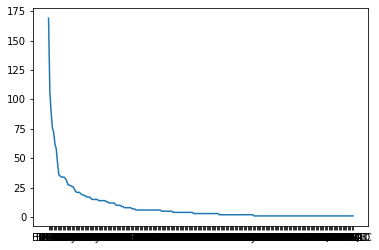

In [79]:
#distribution of genes

plt.plot(unique_genes)

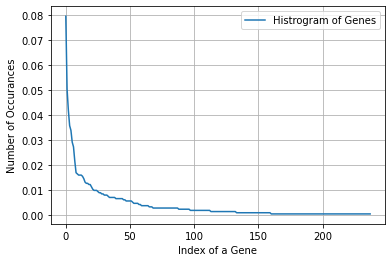

In [80]:
#lest be more clear,normalize it
s= sum(unique_genes.values)
h= unique_genes.values/s
plt.plot(h,label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


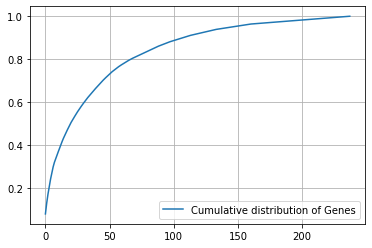

In [81]:
#let see the CDF

c= np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

In [82]:
# Its shows 50 top of gene are present in 78% in data and rest are available in only 22 ^ of data

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [83]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature

train_gene_feature_responseCoding = np.array(get_gv_features(alpha,'Gene',train_df))

#test_gene features

test_gene_feature_responseCoding = np.array(get_gv_features(alpha,'Gene',test_df))

#Cv gene feature

cv_gene_feature_responseCoding = np.array(get_gv_features(alpha,'Gene',cv_df))

In [84]:
train_gene_feature_responseCoding.shape

(2124, 9)

In [85]:
test_gene_feature_responseCoding.shape

(665, 9)

In [86]:
cv_gene_feature_responseCoding.shape

(532, 9)

In [87]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [88]:
# one-hot encoding of Gene feature.

gene_vectorizer= CountVectorizer()

train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])#fit only on train data to avoide data leakage
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [89]:
train_df['Gene'].head()

101     TGFBR2
1739      MSH2
3280       RET
2553     BRCA1
611       CDK4
Name: Gene, dtype: object

In [90]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 237)


In [91]:
test_gene_feature_onehotCoding.shape

(665, 237)

<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2113809955480572
For values of alpha =  0.0001 The log loss is: 1.1817368997385556
For values of alpha =  0.001 The log loss is: 1.2317814296455671
For values of alpha =  0.01 The log loss is: 1.3487385822419764
For values of alpha =  0.1 The log loss is: 1.4427887198646514
For values of alpha =  1 The log loss is: 1.4834233117497813


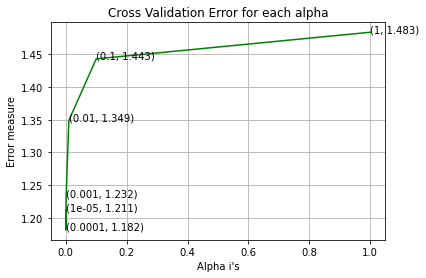

For the best value of alpha=  0.0001 The Log loss is for train set is  0.9971501871721575
For the best value of alpha=  0.0001 The Log loss is for test is  1.1676179222387915
For the best value of alpha=  0.0001 The Log loss is for cv set is  1.1817368997385556


In [92]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.


# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------

cv_log_error_array =[]

for i in alpha:
    clf= SGDClassifier(alpha=i,loss='log',random_state=42,penalty='l2')
    clf.fit(train_gene_feature_onehotCoding,y_train)
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_gene_feature_onehotCoding,y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    
    
fig,ax= plt.subplots()

ax.plot(alpha,cv_log_error_array,c='g')

for i,txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],cv_log_error_array[i]))

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha_idx = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha_idx],penalty='l2',loss='log',random_state=42)
clf.fit(train_gene_feature_onehotCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_gene_feature_onehotCoding,y_train)

predict_y_train= sig_clf.predict_proba(train_gene_feature_onehotCoding)
predict_y_test= sig_clf.predict_proba(test_gene_feature_onehotCoding)
predict_y_cv= sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print("For the best value of alpha= ",alpha[best_alpha_idx],"The Log loss is for train set is ",log_loss(y_train,predict_y_train,labels=clf.classes_,eps=1e-15))
#clf = SGDClassifier(alpha=alpha[best_alpha_idx],penalty='l2',loss='log',random_state=42)
print("For the best value of alpha= ",alpha[best_alpha_idx],"The Log loss is for test is ",log_loss(y_test,predict_y_test,labels=clf.classes_,eps=1e-15))
#clf = SGDClassifier(alpha=alpha[best_alpha_idx],penalty='l2',loss='log',random_state=42)
print("For the best value of alpha= ",alpha[best_alpha_idx],"The Log loss is for cv set is ",log_loss(y_cv,predict_y_cv,labels=clf.classes_,eps=1e-15))

<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [93]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(set(unique_genes.index))].shape[0]
cv_coverage = cv_df[cv_df['Gene'].isin(set(unique_genes.index))].shape[0]
print("Ans \n 1. In test data",test_coverage," is out of ",test_df.shape[0]," : ",(test_coverage/test_df.shape[0])*100,"%")
print(" 2. In Cv data",cv_coverage," is out of ",cv_df.shape[0]," : ",(cv_coverage/cv_df.shape[0])*100,"%")

Q6. How many data points in Test and CV datasets are covered by the  238  genes in train dataset?
Ans 
 1. In test data 643  is out of  665  :  96.69172932330827 %
 2. In Cv data 522  is out of  532  :  98.1203007518797 %


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

In [94]:
# we will now see the variation feature of the data

In [95]:
result['Variation'].value_counts()

Truncating_Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
G245A                    1
N546K                    1
C136R                    1
M980T                    1
I103N                    1
Name: Variation, Length: 2996, dtype: int64

In [96]:
#in train set 

unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1922
Truncating_Mutations         62
Deletion                     50
Amplification                46
Fusions                      18
Overexpression                5
G12V                          4
Q61L                          3
Promoter_Hypermethylation     2
A146V                         2
P130S                         2
Name: Variation, dtype: int64


In [97]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data having total values of Varitions as ",train_df.shape[0], "and they are distibuted as follows",)

Ans: There are 1922 different categories of variations in the train data having total values of Varitions as  2124 and they are distibuted as follows


In [98]:
#so in start only we can see there are much more category that qualifies to be a stable categorical variable

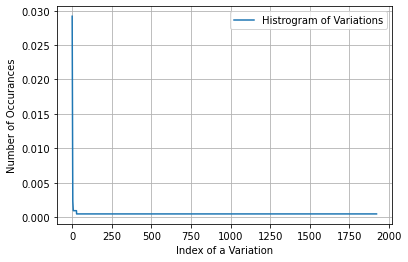

In [99]:
#lets see its distribution

s= sum(unique_variations.values)
h= unique_variations.values/s
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

In [100]:
#only a few values have more frequency else all points are very low frequency

[0.02919021 0.0527307  0.07438795 ... 0.99905838 0.99952919 1.        ]


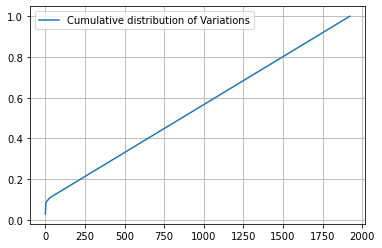

In [101]:
#lets see its CDF

c= np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

In [102]:
#top 1500 values out of 1927 is consituting 80% of data,So we can say most of the variation or frequency is 1 or 2

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [103]:
#with Response coding

alpha=1

train_variation_feature_responseCoding= np.array(get_gv_features(alpha,'Variation',train_df))
test_variation_feature_responseCoding= np.array(get_gv_features(alpha,'Variation',test_df))
cv_variation_feature_responseCoding= np.array(get_gv_features(alpha,'Variation',cv_df))

In [104]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [105]:
cv_variation_feature_responseCoding

array([[0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       ...,
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111],
       [0.11111111, 0.24074074, 0.09259259, ..., 0.09259259, 0.09259259,
        0.09259259],
       [0.11111111, 0.11111111, 0.11111111, ..., 0.11111111, 0.11111111,
        0.11111111]])

In [106]:
# one-hot encoding of variation feature.

variation_vectorizer= CountVectorizer()

train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding =  variation_vectorizer.transform(cv_df['Variation'])

In [107]:
cv_variation_feature_onehotCoding.shape

(532, 1954)

In [108]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1954)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

In [109]:
#lets build a model same we have done for Gene Feature

For value of alpha  1e-05  the Log loss is  1.727918370872748
For value of alpha  0.0001  the Log loss is  1.7245835415792394
For value of alpha  0.001  the Log loss is  1.7315234093344292
For value of alpha  0.01  the Log loss is  1.7386580551160329
For value of alpha  0.1  the Log loss is  1.7472907099131907
For value of alpha  1  the Log loss is  1.748938498615539


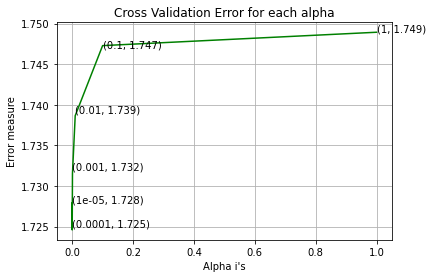

For value of best alpha  0.0001  The train log loss is 0.7149830864467225
For value of best alpha  0.0001  The test log loss is 1.695561797998323
For value of best alpha  0.0001  The Cross validation log loss is 1.7245835415792394


In [110]:
alpha= [10 ** x for x in range(-5,1)]

cv_log_error_array=[]

for i in alpha:
    clf= SGDClassifier(alpha=i,loss='log',penalty='l2',random_state=42)
    clf.fit(train_variation_feature_onehotCoding,y_train)
    #to get pfrediction prob we need to calibrate the model
    sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_variation_feature_onehotCoding,y_train)
    
    predict_y= sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    loss=log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15)
    cv_log_error_array.append(loss)
    print("For value of alpha ",i, " the Log loss is ",loss)
    
    
fig,ax= plt.subplots()

ax.plot(alpha,cv_log_error_array,c='g')
#annotate the pts
for i,txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)),(alpha[i],np.round(txt,3)))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



#get the best alpha

best_alpha_idx= np.argmin(cv_log_error_array)
#retrain with best alpha
clf= SGDClassifier(alpha=alpha[best_alpha_idx],loss='log',penalty='l2',random_state=42)
clf.fit(train_variation_feature_onehotCoding,y_train)
#to get pfrediction prob we need to calibrate the model
sig_clf = CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_variation_feature_onehotCoding,y_train)

predict_y_train= sig_clf.predict_proba(train_variation_feature_onehotCoding)
print("For value of best alpha ",alpha[best_alpha_idx]," The train log loss is",log_loss(y_train,predict_y_train,labels=clf.classes_,eps=1e-15))
predict_y_test= sig_clf.predict_proba(test_variation_feature_onehotCoding)
print("For value of best alpha ",alpha[best_alpha_idx]," The test log loss is",log_loss(y_test,predict_y_test,labels=clf.classes_,eps=1e-15))
predict_y_cv= sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print("For value of best alpha ",alpha[best_alpha_idx]," The Cross validation log loss is",log_loss(y_cv,predict_y_cv,labels=clf.classes_,eps=1e-15))

In [111]:
#train loss is less and test and cv loss is alomost triple,SO it dont look very well actually 
#But we can see our random model log loss was 2.5 
#and it is still better in this case as 1.7 <2.5

<h3>So We can say that Variation features is still useful</h3>

<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [112]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_variations.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Variation'].isin(set(unique_variations.index))].shape[0]
cv_coverage = cv_df[cv_df['Variation'].isin(set(unique_variations.index))].shape[0]
print("Ans \n 1. In test data",test_coverage," is out of ",test_df.shape[0]," : ",(test_coverage/test_df.shape[0])*100,"%")
print(" 2. In Cv data",cv_coverage," is out of ",cv_df.shape[0]," : ",(cv_coverage/cv_df.shape[0])*100,"%")

Q6. How many data points in Test and CV datasets are covered by the  1922  genes in train dataset?
Ans 
 1. In test data 72  is out of  665  :  10.827067669172932 %
 2. In Cv data 48  is out of  532  :  9.022556390977442 %


In [113]:
#this shows with This feature is not correctly distributed among the train test and cv sets,
#Its doesnt seems to be stableamong the train test and cv sets because overlap between train and other set seem to be quite


In [114]:
## SO we can say this seems to unstable But the test and cv loss is lesser than random model ,
#So its not as good as Gene feature but still can add reduction in loss tha random model
#Finally we will not leave out this feature but be careful As its not stable much

<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [115]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

from collections import defaultdict

def extract_dictionary_paddle(df):#df is data frame like train_df haviong column ['TEXT']
    #The functionality of both dictionaries and defualtdict are almost same except for the fact 
    #that defualtdict never raises a KeyError. It provides a default value for the key that does not exists.
    dictionary = defaultdict(int)
    for index,row in df.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] += 1
    return dictionary

In [116]:
dict_list=[]
# dict_list =[] contains 9 dictoinaries each corresponds to a class

for i in range(1,10):
    cls_text= train_df[train_df['Class']==i]
    #build a word dict based on  the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    #so this list will have a word count dictionary for each class,each dict will be deafaultDict
    
# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data

total_dict = extract_dictionary_paddle(train_df)

In [117]:
#get the responseCoding for the txt feature ,The coding will be on the basis of class it belong to


def get_text_responsecoding(df):
    text_feature_responsecoding= np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index=0
        for index,row in df.iterrows():
            sub_prob= 0 #this will contain product 
            for word in row['TEXT'].split():
                #in case of text data which is usually very large the multiply of all prob become very small say we
                #have 100 words then its multiple will become order 10^-100 So we use log
                sub_prob += math.log(((dict_list[i].get(word,0)+10)/(total_dict.get(word,0)+90)))
            text_feature_responsecoding[row_index][i]= math.exp(sub_prob/len(row['TEXT'].split()))
            row_index +=1
    return text_feature_responsecoding

In [118]:
#builing a CountVectorizer with all the words that occured minimum 3 times in train data

text_vectorizer = CountVectorizer(min_df=3)

train_text_feature_onehotcoding = text_vectorizer.fit_transform(train_df['TEXT'])



# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

## train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector

train_text_fea_counts = train_text_feature_onehotcoding.sum(axis=0).A1 # actually with .A1 this will give a matrix and .A1 will 
#convert this to the numpy array.This will count occurence of each word in the corpus

In [119]:
# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured in corpus
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

In [120]:

print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52204


In [121]:
len(train_text_fea_counts)

52204

In [122]:
#response coding of text features

train_text_feature_responseCoding = get_text_responsecoding(train_df)
test_text_feature_responseCoding = get_text_responsecoding(test_df)
cv_text_feature_responseCoding = get_text_responsecoding(cv_df)

In [123]:
#normalizing the response coded features 


train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [124]:
# we will also normalize the oneHotEncoded feature,Its a good habit anyways
from sklearn.preprocessing import normalize


train_text_feature_onehotcoding = normalize(train_text_feature_onehotcoding,axis=0)

#test one hot encode data

test_text_feature_onehotcoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotcoding = normalize(test_text_feature_onehotcoding,axis=0)
#CV
cv_text_feature_onehotcoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotcoding = normalize(cv_text_feature_onehotcoding,axis=0)

In [125]:
#Now we will how often or frequently words occur?
sorted_text_fea_dict= dict(sorted(text_fea_dict.items(), key= lambda x :x[1],reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [126]:
print(Counter(sorted_text_occur))
#so This will show How many words occured how many time in sorted order ,SO lile first element
#3: 5307 will say , there are total 5037 word which have occured max 3 tiems in the corpus ,So the distribution is right skewed for sure

Counter({3: 4901, 4: 3352, 5: 3194, 6: 2812, 7: 2198, 8: 1755, 12: 1575, 9: 1540, 10: 1367, 11: 1091, 13: 960, 14: 950, 15: 860, 16: 749, 18: 681, 24: 605, 20: 600, 17: 535, 19: 526, 21: 509, 30: 498, 47: 426, 22: 397, 26: 375, 23: 367, 25: 332, 27: 330, 28: 295, 32: 293, 36: 284, 31: 278, 35: 273, 29: 247, 34: 242, 38: 229, 33: 223, 48: 215, 40: 209, 42: 202, 50: 199, 41: 196, 37: 195, 39: 192, 44: 189, 43: 174, 46: 162, 60: 157, 51: 154, 70: 153, 54: 149, 45: 149, 49: 147, 64: 139, 56: 135, 53: 134, 58: 132, 57: 129, 52: 129, 55: 125, 67: 118, 72: 113, 65: 109, 61: 109, 62: 108, 66: 105, 63: 102, 84: 99, 59: 96, 68: 91, 69: 88, 94: 87, 80: 87, 78: 84, 71: 84, 74: 79, 82: 77, 81: 76, 77: 76, 90: 75, 73: 73, 96: 71, 105: 66, 85: 66, 75: 66, 86: 64, 76: 62, 106: 61, 91: 61, 97: 60, 98: 59, 87: 59, 83: 58, 99: 56, 79: 56, 101: 55, 107: 54, 108: 52, 95: 52, 88: 52, 120: 51, 113: 51, 89: 51, 126: 50, 121: 50, 112: 50, 100: 50, 119: 48, 114: 48, 93: 48, 92: 48, 124: 47, 104: 47, 102: 45, 11

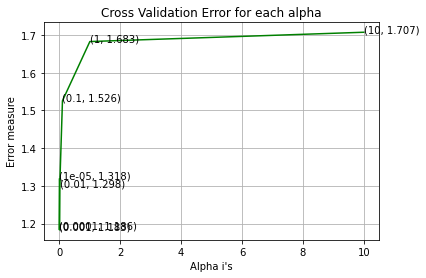

In [127]:
#now lets see how is the predictability of the text features
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded

cv_log_error_array = []
alpha = [10 ** x for x in range(-5, 2)]

for i in alpha:
    
    clf= SGDClassifier(alpha=i,loss='log',random_state=42)
    clf.fit(train_text_feature_onehotcoding,y_train)
    
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_text_feature_onehotcoding,y_train)
    
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotcoding)
    cv_log_error_array.append(log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))
    #Log loss is undefined for p=0 or p=1, so probabilities are clipped to max(eps, min(1 - eps, p)).
    
fig,ax = plt.subplots()

ax.plot(alpha,cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()



In [128]:

best_alpha= np.argmin(cv_log_error_array)

clf= SGDClassifier(alpha=alpha[best_alpha],loss='log',random_state=42)
clf.fit(train_text_feature_onehotcoding,y_train)
    
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_text_feature_onehotcoding,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001, loss='log',
                                                    random_state=42))

In [129]:
predict_y = sig_clf.predict_proba(train_text_feature_onehotcoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotcoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotcoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


For values of best alpha =  0.001 The train log loss is: 0.6580908529526227
For values of best alpha =  0.001 The cross validation log loss is: 1.1833628810143777
For values of best alpha =  0.001 The test log loss is: 1.096380289246239


In [130]:
#Hence its seem to be a good participant for predicting target class

In [131]:
#now let us see how this text feature is stable around train test and cv dataset

<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [132]:
#lets check it

def get_common_text(df):
    df_text_vec= CountVectorizer(min_df=3)
    df_text_fea= df_text_vec.fit_transform(df["TEXT"])
    df_text_features= df_text_vec.get_feature_names()
    
    len1= len(set(df_text_features))
    len2= len(set(train_text_features) & set(df_text_features))
    
    return len1,len2

In [133]:
len1,len2 = get_common_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_common_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

96.372 % of word of test data appeared in train data
97.91 % of word of Cross Validation appeared in train data


In [134]:
#SO Yeah its pretty stable between all set

 We can see
- 1. For gene, log loss for train is 1.1,cv is 1.25 and test is 1.21, stability is good
- 2. For variation, log loss for train is 1.11,cv is 1.72 and test is 1.70, stability is bad 
- 3. For gene, log loss for train is 0.77,cv is 1.21 and test is 1.11, stability is best


In [135]:
#Now we will move on and create some machine learining models

<h1>4. Machine Learning Models</h1>

<p style="font-size:24px;text-align:Center"> <b>Stacking the three types of features </b><p>

In [136]:
# merging gene, variance and text features

# building train, test and cross validation data sets

In [137]:
#one_hot_encoded datset

In [138]:
from scipy.sparse import hstack
train_x_onehotCoding=hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding,train_text_feature_onehotcoding)).tocsr()
test_x_onehotCoding= hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding,test_text_feature_onehotcoding)).tocsr()
cv_x_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding,cv_text_feature_onehotcoding)).tocsr()

In [139]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54395)
(number of data points * number of features) in test data =  (665, 54395)
(number of data points * number of features) in cross validation data = (532, 54395)


In [140]:
train_y = np.array(list(train_df['Class']))
test_y = np.array(list(test_df['Class']))
cv_y = np.array(list(cv_df['Class']))

In [225]:
#So its a high dimensional data, So in such cases linear or probabily based nodel works very well,like Logistic Regression
#LInear Svm  and Naive bayes
#Naive Bayes works much well in case of text classification data

In [226]:
#ResposeCodeDatset
#here we are not using sparse matrix ,because each dimension will defenitely have most values more than 0

In [141]:
train_x_responseCoding =np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding,train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding,test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding,cv_text_feature_responseCoding))

In [142]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


In [161]:
#save the data to .npy file file

from scipy import sparse
np.save('train_df.npy',train_df)
np.save('test_df.npy',test_df)
np.save('cv_df.npy',cv_df)
np.save('train_x_responseCoding.npy',train_x_responseCoding)
np.save('test_x_responseCoding.npy',test_x_responseCoding)
np.save('cv_x_responseCoding.npy',cv_x_responseCoding)

## #your_matrix_back = sparse.load_npz("yourmatrix.npz")

sparse.save_npz("train_x_onehotCoding.npz", train_x_onehotCoding)
sparse.save_npz("test_x_onehotCoding.npz", test_x_onehotCoding)
sparse.save_npz("cv_x_onehotCoding.npz", cv_x_onehotCoding)
np.save('y_train.npy',y_train)
np.save('y_test.npy',y_test)
np.save('y_cv.npy',y_cv)


In [ ]:
#Read the preprocessed data 

In [2]:
from scipy import sparse
train_x_responseCoding = np.load("train_x_responseCoding.npy",allow_pickle=True)
test_x_responseCoding = np.load("test_x_responseCoding.npy",allow_pickle=True)
cv_x_responseCoding  = np.load("cv_x_responseCoding.npy",allow_pickle=True)
train_x_onehotCoding  = sparse.load_npz("train_x_onehotCoding.npz")
test_x_onehotCoding  = sparse.load_npz("test_x_onehotCoding.npz")
cv_x_onehotCoding  = sparse.load_npz("cv_x_onehotCoding.npz")
y_train= np.load("y_train.npy",allow_pickle=True)
y_test= np.load("y_test.npy",allow_pickle=True)
y_cv= np.load("y_cv.npy",allow_pickle=True)
train_df = np.load("train_df.npy",allow_pickle=True)
test_df = np.load("test_df.npy",allow_pickle=True)
cv_df = np.load("test_df.npy",allow_pickle=True)


<h2>4.1. Base Line Model</h2>

<h3>4.1.1. Naive Bayes</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

In [243]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/naive-bayes-algorithm-1/
# -----------------------


In [244]:
clf= MultinomialNB(alpha=1)
clf.fit(train_x_onehotCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_onehotCoding,y_train)
sig_clf_probs= sig_clf.predict_proba(cv_x_onehotCoding)

For Alpha =  1e-05
Log loss:  1.3226737560158426
For Alpha =  0.0001
Log loss:  1.3130709574177568
For Alpha =  0.001
Log loss:  1.3117023807390946
For Alpha =  0.1
Log loss:  1.298243834604973
For Alpha =  1
Log loss:  1.3424502735485224
For Alpha =  10
Log loss:  1.4269182086137646
For Alpha =  100
Log loss:  1.4680492848640938
For Alpha =  1000
Log loss:  1.453395576431208


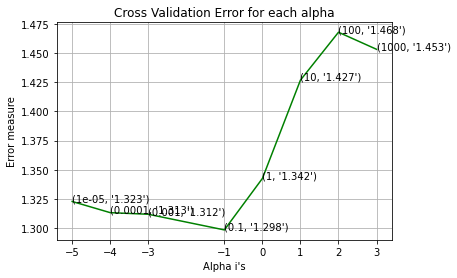

For values of best alpha =  0.1 The train log loss is: 0.8336468991290107
For values of best alpha =  0.1 The cross validation log loss is: 1.298243834604973
For values of best alpha =  0.1 The test log loss is: 1.2690271264687003


In [245]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []


for i in alpha:
    print("For Alpha = ",i)
    clf= MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding,y_train)
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_x_onehotCoding,y_train)
    sig_clf_probs= sig_clf.predict_proba(cv_x_onehotCoding)
    #sig_clf_prob will have dimension of (cv_x_onehotCoding.shape[0],9)
    loss=log_loss(y_cv,sig_clf_probs,eps=1e-15,labels=clf.classes_)
    cv_log_error_array.append(loss)
    print("Log loss: ",loss)
    
    

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [246]:
#So we aree using onehot encoding and Multipe Clas nAive BAyes 
#So even though we are using all features but Navive bayes is a weak model ,because it takes the naive assumptions
#Hence the test loss is even higher than we have use the individual features while we checked how the predictibility of the 
# each feature is . The model we choose was also logistic regression which is more powerful.



In [11]:
#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [12]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

<h4>4.1.1.2. Testing the model with best hyper paramters</h4>

Log-Loss for cross validation 1.298243834604973
Number of missclassified point : 0.40789473684210525
------------------------------ Confusion matrix --------------------


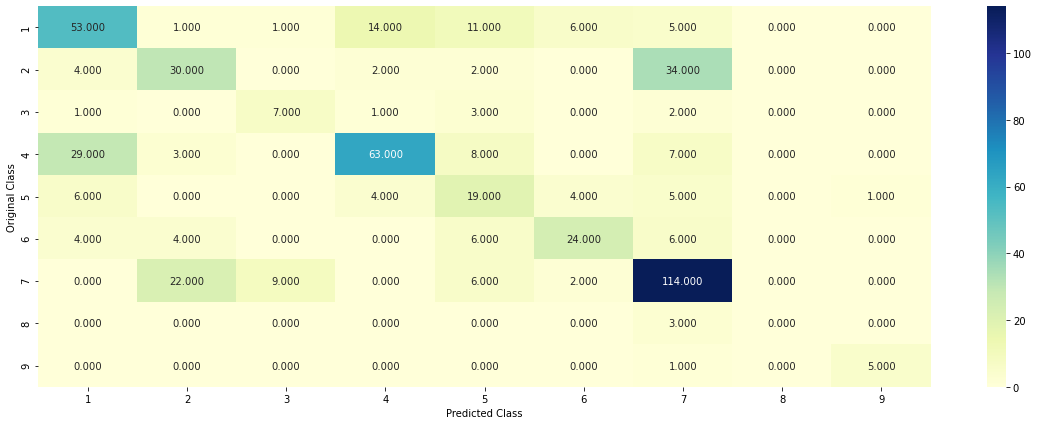

-------------------- Precision matrix (Columm Sum=1) --------------------


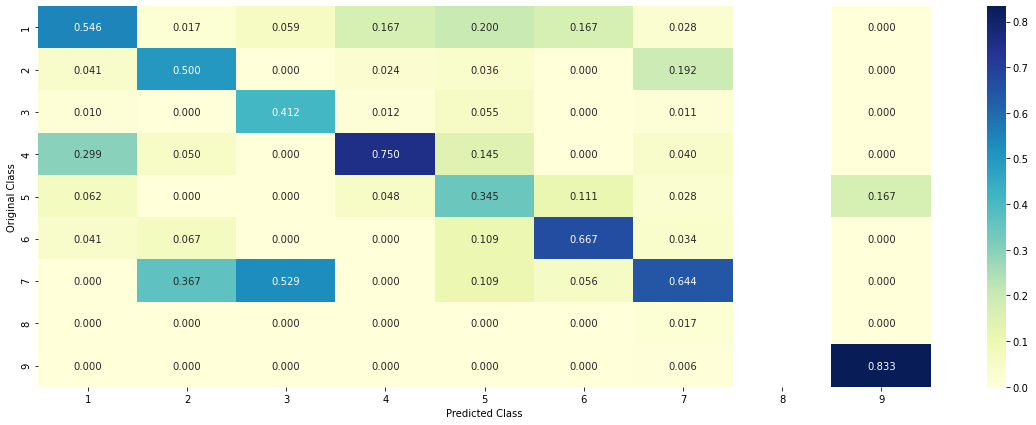

-------------------- Recall matrix (Row Sum=1) --------------------


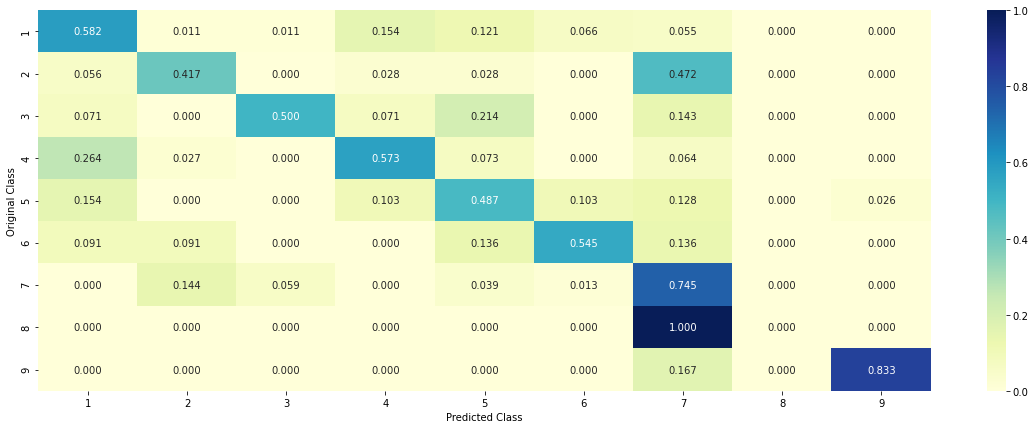

In [249]:
best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs= sig_clf.predict_proba(cv_x_onehotCoding)
 #to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log-Loss for cross validation",log_loss(y_cv,sig_clf_probs,labels=clf.classes_,eps=1e-15))
print("Number of missclassified point :",np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)-y_cv))/y_cv.shape[0])
plot_confusion_matrix(y_cv,sig_clf.predict(cv_x_onehotCoding.toarray()))

In [250]:
# So in precision matrix ,as most of diagonal points are more values Hence it looks good

# 2 pred,2 actual in this matrix says, out of all point predicted as class 2 74.3% points are actually belong to class 2
# SO its like in all predicted point as postive(any specific class) How many are actual true positive

In [251]:
#we can say for class predicted as  1, the most actaul 1,8,9,4
##we can say for class predicted as  7, the most actaul 2,3,6

In [252]:
# SO in Recall matrix ,as most of diagonal points are more values Hence it looks good

# class 2 as pred,class 2 actual in this matrix says, out of all point actually as class 2 36.1% points are predicted to belong to class 2
# SO its like in all actual postive points(TP+FN)(any specific class) How many are actual true positive

In [253]:
#if we see Recall matrix , for class 8 ,all class predicted as clas 1/9 because there are very few pts for class 8 
#similarly for class 2 actual, most predicted is class 7, same is for class 3 actual

In [254]:
# we cant get so much intuition with confusion matrix but with precision and recall matrix

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [255]:
#this is one of the business requirement ,Interpreatibilty ,So lets see how we encode the interpretibility
#here we will take probablity

In [256]:
test_point_index=0
no_features = 100

predict_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class : ",predict_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class : ",y_test[test_point_index])


Predicted Class :  6
Predicted Class Probabilities: [[0.0719 0.0632 0.0146 0.0918 0.0338 0.5955 0.1201 0.0046 0.0045]]
Actual Class :  6


In [257]:
predict_cls

array([6])

In [258]:
#This shows P(y=7|Xi)=0.6554 and teh second largest is 0.0869, There is a significant differnet so our prediction is quite intuitive

In [259]:
clf.coef_.shape# coef is for each class and foreach feature

(9, 55360)

In [260]:
indicies = np.argsort(-1* clf.coef_)

In [261]:
indicies.shape#just sorted them

(9, 55360)

In [262]:
[predict_cls-1]

[array([5])]

In [263]:
indicies[predict_cls-1]

array([[   26,    25,   102, ..., 22159, 22146, 55359]], dtype=int64)

In [264]:
#feature index for most important feature for class 7(index starts from 7 here)

In [265]:
indicies[predict_cls-1].shape

(1, 55360)

In [266]:
#now we will need the only no_feature = 100 features ,that is top 100 features
indicies[predict_cls-1][:,:no_features]


array([[   26,    25,   102,   125,   335,    59, 27672, 29578, 12568,
        27624, 29570,  5108, 30096, 30030, 32401, 29575, 45430, 35359,
        29586, 39609,  5777, 11510, 26788, 37448, 47842,  3605, 13708,
        29589, 49011,  6377, 49504, 19953, 54863, 17263, 54862,  8037,
        17521, 47844, 27631, 35562, 43056, 52022, 35843, 42959, 49503,
         8878,  3099, 35695,  8877, 37851, 42468,  7945, 23669, 35522,
        42818, 19928,  2663,  5441, 15163, 23876,  6004, 31029, 25694,
        49519, 49549,  4919,  6676, 32159, 32160, 32161, 24480,  2677,
         2916, 17279, 17482, 35691, 27626, 27605, 25679, 27629, 27775,
        42499, 53271, 29938, 37718,  6180, 12946, 20146, 37717, 37699,
        25483, 34100, 30198, 52997, 23615, 37703, 32821,  9624,  4989,
        35724]], dtype=int64)

In [267]:
#so this is top features for class 7,Now just accumulate the whole code

In [268]:
indicies= np.argsort(-1*clf.coef_)[predict_cls-1][:,:no_features]

In [269]:
indicies[0].shape

(100,)

In [270]:
#so this says these are features which are the most important for any point to belong to class 7

In [271]:
#Now we can check ,if the important text present in class 7 , is avaialble in test data or not

In [272]:
test_df['TEXT'].iloc[test_point_index]

'mutation screening breast ovarian cancer predisposition genes brca1 brca2 becoming increasingly important part clinical practice classification rare nontruncating sequence variants genes problematic known whether subtle changes alter function sufficiently predispose cells cancer development using data myriad genetic laboratories database nearly 70 000 full sequence tests assessed clinical significance 1 433 sequence variants unknown significance vuss brca genes three independent measures employed assessment co occurrence trans vus known deleterious mutations detailed analysis logistic regression personal family history cancer vus carrying probands subset probands analysis cosegregation disease pedigrees factors likelihood ratio computed hypothesis vuss equivalent average deleterious mutation compared neutral respect risk likelihood ratios derived component combined provide overall assessment vus total 133 vuss odds least 100 1 favor neutrality respect risk whereas 43 odds least 20 1 f

In [273]:
no_feature

NameError: name 'no_feature' is not defined

In [ ]:
test_df['Gene'].iloc[test_point_index]

In [ ]:
test_df['Variation'].iloc[test_point_index]

In [ ]:
clf.coef_.shape

In [21]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not

def get_impfeature_names(indicies,text,gene,var,no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec= CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    
    gene_vec= gene_count_vec.fit(train_df["Gene"])
    var_vec= var_count_vec.fit(train_df["Variation"])
    text_vec= text_count_vec.fit(train_df["TEXT"])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    
    for i ,v in enumerate(indicies):
        if (v< fea1_len): #1st feature in stacking was gene, So this if part is for gene feature importance only
            word= gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no :
                word_present += 1
                print(i,"Gene feature [{}] persent in test data point [{}]".format(word,yes_no))
        elif (v< fea1_len+fea2_len):#2nd feature in stacking was Variation, So this if part is for vartion feature importance only
            word = var_vec.get_feature_names()[v - fea1_len] #here the 
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i,"Variation feature [{}] persent in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v -(fea1_len+fea2_len)] #position of index of any text_feature will be after gene and var feature
            yes_no= True if word in text.split() else False # So in get_feature_name the index will be v -(fea1_len+fea2_len)
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))
    
    print("out of the top ",no_features," features ",word_present,"are present in query point")
     

In [275]:
get_impfeature_names(indicies[0],test_df["TEXT"].iloc[test_point_index],test_df["Gene"].iloc[test_point_index],test_df["Variation"].iloc[test_point_index],no_features)

6 Text feature [i2285v] present in test data point [True]
7 Text feature [ivs20] present in test data point [True]
8 Text feature [brca] present in test data point [True]
9 Text feature [i124v] present in test data point [True]
10 Text feature [ivs13] present in test data point [True]
11 Text feature [3098] present in test data point [True]
12 Text feature [k513r] present in test data point [True]
13 Text feature [k2950n] present in test data point [True]
14 Text feature [lrs] present in test data point [True]
15 Text feature [ivs18] present in test data point [True]
16 Text feature [s1172l] present in test data point [True]
17 Text feature [multiplied] present in test data point [True]
18 Text feature [ivs5] present in test data point [True]
19 Text feature [personal] present in test data point [True]
20 Text feature [433] present in test data point [True]
21 Text feature [basis] present in test data point [True]
22 Text feature [history] present in test data point [True]
23 Text feat

In [276]:
test_point_index=0
no_features = 100

predict_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class : ",predict_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class : ",y_test[test_point_index])
indicies= np.argsort(-1*abs(clf.coef_))[predict_cls-1][:,:]
print("="*50)
get_impfeature_names(indicies[0],test_df["TEXT"].iloc[test_point_index],test_df["Gene"].iloc[test_point_index],test_df["Variation"].iloc[test_point_index],no_features)

Predicted Class :  6
Predicted Class Probabilities: [[0.0719 0.0632 0.0146 0.0918 0.0338 0.5955 0.1201 0.0046 0.0045]]
Actual Class :  6


KeyboardInterrupt: 

<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [ ]:
test_point_index=100
no_features = 100

predict_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class : ",predict_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class : ",y_test[test_point_index])
indicies= np.argsort(-1*abs(clf.coef_))[predict_cls-1][:,:no_features]
print("="*50)
get_impfeature_names(indicies[0],test_df["TEXT"].iloc[test_point_index],test_df["Gene"].iloc[test_point_index],test_df["Variation"].iloc[test_point_index],no_features)

In [ ]:
#this is good
#So for actual and predicted to be same ,we have overlap of 52 top features and for Incorrectly classified point we have ) feature overallping out of top 100 features

<h2>4.2. K Nearest Neighbour Classification</h2>

In [ ]:
# we know KNN is affected by Curese of Dimension Hence we will better use the ResponseCoded feature

<h3>4.2.1. Hyper parameter tuning</h3>

In [ ]:
n_neighbors = [5, 11, 15, 21, 31, 41, 51, 99]

cv_log_error_array= []

for i in n_neighbors:
    print("For n_neighbors: ",i)
    clf= KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding,y_train)
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_x_responseCoding,y_train)
    sig_clf_probs= sig_clf.predict_proba(cv_x_responseCoding)
    loss= log_loss(y_cv,sig_clf_probs,labels=clf.classes_,eps=1e-15)
    cv_log_error_array.append(loss)
    
    print("Log loss for N_neigbours: ",i, " is ",loss)

    
    
fig,axs = plt.subplots()

axs.plot(n_neighbors,cv_log_error_array,c='g')

for i , txt in enumerate(np.round(cv_log_error_array,3)):
    axs.annotate((n_neighbors[i],str(txt)),(n_neighbors[i],cv_log_error_array[i]))

plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("N_neighbours")
plt.ylabel("Error measure")
plt.show()



In [ ]:
best_k= np.argmin(cv_log_error_array)

clf= KNeighborsClassifier(n_neighbors=n_neighbors[best_k])
clf.fit(train_x_responseCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_responseCoding,y_train)

predict_y= sig_clf.predict_proba(train_x_responseCoding)
print("For best Value of K = ",n_neighbors[best_k]," The Train loss is ",log_loss(y_train,predict_y,labels=clf.classes_,eps=1e-15))

predict_y= sig_clf.predict_proba(cv_x_responseCoding)
print("For best Value of K = ",n_neighbors[best_k]," The cv loss is ",log_loss(y_cv,predict_y,labels=clf.classes_,eps=1e-15))

predict_y= sig_clf.predict_proba(test_x_responseCoding)
print("For best Value of K = ",n_neighbors[best_k]," The test loss is ",log_loss(y_test,predict_y,labels=clf.classes_,eps=1e-15))

In [ ]:
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, test_x_responseCoding, test_y, clf)

In [ ]:
#log loss might be different for some model may be different but number of miss classified point could be similar because missclassificatio is determined by the actual labels of the predicted Points 
#BUt the log loss is computed upon the actuall probablity score of a point to belong to a class

In [ ]:
# if we see the precison and recall matrix 
#it has done a better job than the naive bayes
# It has also take care of small frequencied classes as well


In [ ]:
#But KNN dont have the feature importance can be known 
#But we can always see the neigbours classes

<h3>4.2.3.Sample Query point -1</h3>

In [ ]:
clf = KNeighborsClassifier(n_neighbors=n_neighbors[best_k])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

In [ ]:
test_point_index = 1
predicted_cls= sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
#actual= y_test[test_point_index]
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])



In [ ]:
#lts look out its neigbours

neighbors= clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1,-1),n_neighbors[best_k])
print("The ",n_neighbors[best_k]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

In [ ]:
#Hence due to majority voting it has predicted 2 over 7

<h3>4.2.4. Sample Query Point-2 </h3>

In [ ]:
test_point_index = 108
predicted_cls= sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
#actual= y_test[test_point_index]
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])


#lts look out its neigbours

neighbors= clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1,-1),n_neighbors[best_k])
print("The ",n_neighbors[best_k]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

In [ ]:
#in KNN we cant get the feature imprtance Hence we can do much but just interpret that neighbours,SO error may happen
#beacuse we can interpret the data but feature importance is not availble and prone to errors
#Hence in case of KNN in this case, Even if LOg loss is lesser we can rely on this model much

## 4.3 Logistic Regression

### 4.3.1 WIth Class Balancing

In [ ]:
# we can take one hot encoded features for Logistic Regression Because LR works very well in High dimension to get a plain which serated the feature data
# We will train LR with Data class balanced
# we can use SGDClassifier with Class_weight as balanced and loss =log loss

In [160]:

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


In [162]:
train_x_onehotCoding

array(<2124x55761 sparse matrix of type '<class 'numpy.float64'>'
	with 3307394 stored elements in Compressed Sparse Row format>,
      dtype=object)

For Alpha :  1e-06 Log Loss : 1.4015387969446245
For Alpha :  1e-05 Log Loss : 1.3868710272513503
For Alpha :  0.0001 Log Loss : 1.2657378068637262
For Alpha :  0.001 Log Loss : 1.2516366045340626
For Alpha :  0.01 Log Loss : 1.2649103217522941
For Alpha :  0.1 Log Loss : 1.522243706796631
For Alpha :  1 Log Loss : 1.7210253880444673
For Alpha :  10 Log Loss : 1.7452371179301098


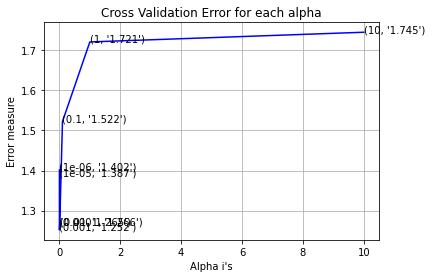

In [235]:
alpha= [10 ** x for x in range(-6,2)]

cv_log_error_array=[]

for i in alpha:
    # we will use the balanced clas weight,This is kind of upsampling
    # we will use one hot encode features because LR is got in handling those 
    clf= SGDClassifier(alpha=i,penalty='l2',loss='log',class_weight='balanced',random_state=42)
    clf.fit(train_x_onehotCoding,y_train)
    
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_x_onehotCoding,y_train)
    sig_clf_probs= sig_clf.predict_proba(cv_x_onehotCoding)
    loss= log_loss(y_cv,sig_clf_probs,labels=clf.classes_,eps=1e-15)
    cv_log_error_array.append(loss)
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("For Alpha : ", i ,"Log Loss :",loss)
    

fig,ax= plt.subplots()

ax.plot(alpha,cv_log_error_array,c='blue')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [236]:
best_alpha = np.argmin(cv_log_error_array)
clf= SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='log',class_weight='balanced',random_state=42)
clf.fit(train_x_onehotCoding,y_train)

sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_onehotCoding,y_train)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.001 The train log loss is: 0.4922036321547087
For values of best alpha =  0.001 The cross validation log loss is: 1.2516366045340626
For values of best alpha =  0.001 The test log loss is: 1.1191867720848265


Log loss : 1.162989165634752
Number of mis-classified points : 0.37406015037593987
------------------------------ Confusion matrix --------------------


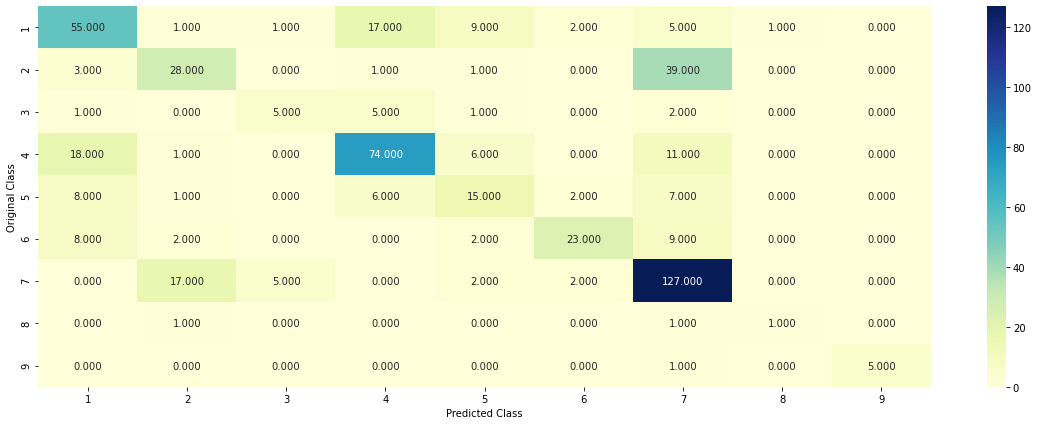

-------------------- Precision matrix (Columm Sum=1) --------------------


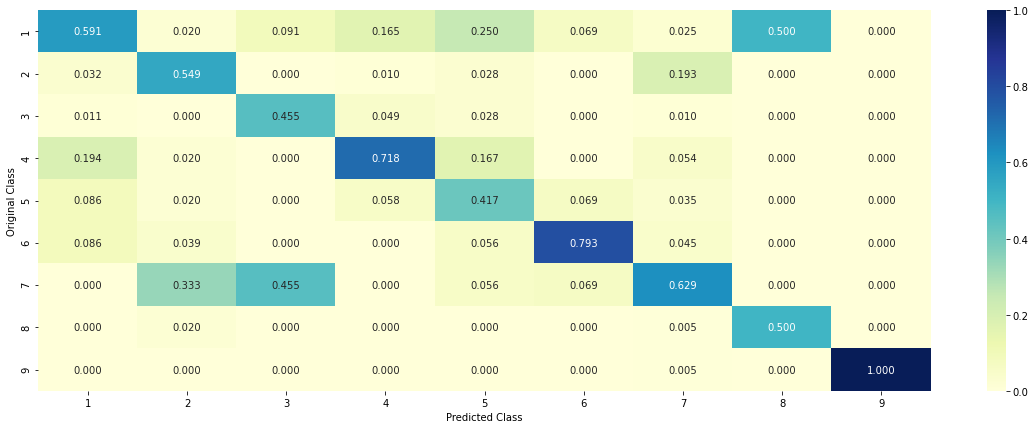

-------------------- Recall matrix (Row Sum=1) --------------------


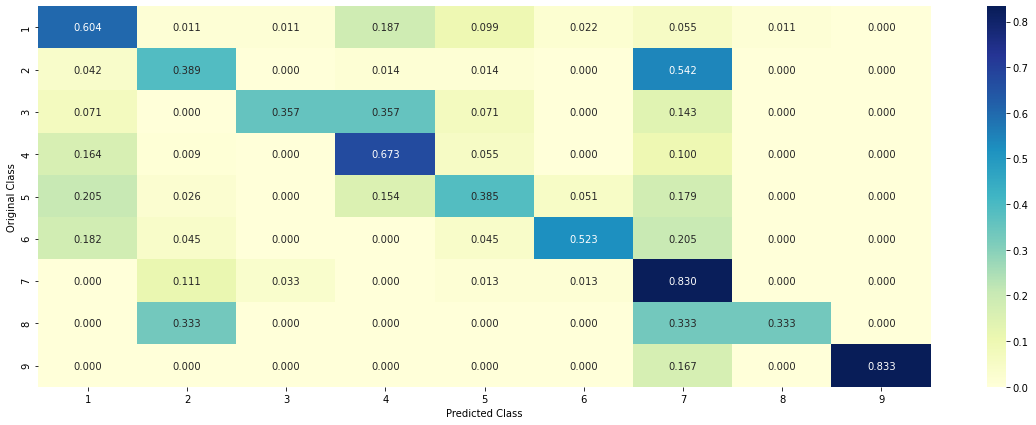

In [237]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

predict_and_plot_confusion_matrix(train_x_onehotCoding,y_train,cv_x_onehotCoding,y_cv,sig_clf)

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [238]:
correct_pts=[i for i in range(len(y_test)) if y_test[i] == pred[i] ]

NameError: name 'pred' is not defined

In [ ]:
len(correct_pts)

In [ ]:
correct_pts[:6]

In [ ]:
incorrect_pts=[i for i in range(len(y_test)) if y_test[i] != pred[i] ]

In [ ]:
len(incorrect_pts)

In [ ]:
incorrect_pts[:6]

In [ ]:
#we can see predcited class probabiltity is 

In [ ]:
test_point_index = 6
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted cls",predicted_cls[0])
print("Actual class",y_test[test_point_index])
print("Predicted_class probabilities",np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),3))


In [ ]:
predicted_cls

In [ ]:
(np.array([y_test[test_point_index]]))

In [ ]:
#important 500 features fore perdicted class
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

In [ ]:
#important 500 features
indices = np.argsort(-1*abs(clf.coef_))[(np.array([y_test[test_point_index]]))-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [ ]:
test_point_index = 22
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted cls",predicted_cls[0])
print("Actual class",y_test[test_point_index])
print("Predicted_class probabilities",np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),3))

In [350]:
(np.array([y_test[test_point_index]]))

array([6], dtype=int64)

In [ ]:
#important 500 features for predicted class as 1
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

In [ ]:
#important 500 features for actual class 6
indices = np.argsort(-1*abs(clf.coef_))[(np.array([y_test[test_point_index]]))-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

In [ ]:
# SO what we can see Here in last two codes are
#for predicted class 1 the  most important features available in test point is 8 
#for actual class 6 the  most important features available in test point is 13


# Then Why our classifier is predicted it 1 where for class 6 more features are avaialble??

The important features are for interpretation of results only, decision of model is not based on number of important features contributing to it but it is based on the weights(strength) of those features, let's say that  having 'kinosis' will definitely imply it's of class 1 as it is only used there and no other class uses it, but having 'pyto','syncr','theres' will imply that there's 70% chance that it belongs to class 2 even though here 3 features are contributing. This way we should interpret important features.

### 4.3.1 WIthout Class Balancing

<h4>4.3.2.1. Hyper paramter tuning</h4>

In [144]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []

for i in alpha:
    clf= SGDClassifier(alpha=i,penalty='l2',loss='log',random_state=42)
    clf.fit(train_x_onehotCoding,y_train)
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_x_onehotCoding,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    loss= log_loss(y_cv,sig_clf_probs,labels=clf.classes_,eps=1e-15)
    cv_log_error_array.append(loss)
    print("For Alpha : ",i,"The log loss is ",loss)

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

In [ ]:

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

In [ ]:
#testing with best parameter and get the confusion matrices
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

In [ ]:
#here after looking at the loss values We can say with Balancing the Results got better

#in All confusion matrix we can see because of 8 being the least fequncy label hence its hardly got a value in prediction
# same is for 7 , as biggest class 

#With CLas balancing ,the minor classes is as correctly predicted as possible

<h2>4.4. Linear Support Vector Machines</h2>

In [145]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []

for i in alpha:
    clf= SGDClassifier(alpha=i,penalty='l2',loss='hinge',random_state=42,class_weight='balanced')
    clf.fit(train_x_onehotCoding,y_train)
    sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
    sig_clf.fit(train_x_onehotCoding,y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    loss= log_loss(y_cv,sig_clf_probs,labels=clf.classes_,eps=1e-15)
    cv_log_error_array.append(loss)
    print("For Alpha : ",i,"The log loss is ",loss)

For Alpha :  1e-06 The log loss is  1.3273906647693656
For Alpha :  1e-05 The log loss is  1.3092635580800127
For Alpha :  0.0001 The log loss is  1.2242428713246594
For Alpha :  0.001 The log loss is  1.1321009077740967
For Alpha :  0.01 The log loss is  1.1547851041504216
For Alpha :  0.1 The log loss is  1.3677878379956376
For Alpha :  1 The log loss is  1.721651594124247


In [146]:
# we are using SGDClassifier with Hinge loss because we have a high dimension data Hnece We are using the Linear SVM

Text(0, 0.5, 'Log loss')

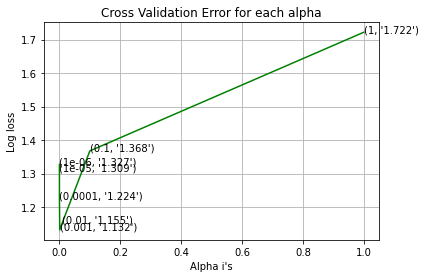

In [147]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Log loss")

In [148]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha],penalty='l2',loss='hinge',random_state=42,class_weight='balanced')
clf.fit(train_x_onehotCoding,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                    class_weight='balanced',
                                                    random_state=42))

In [149]:

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.001 The train log loss is: 0.5608925863920986
For values of best alpha =  0.001 The cross validation log loss is: 1.1321009077740967
For values of best alpha =  0.001 The test log loss is: 1.0730826505626463


Log loss : 1.1321009077740967
Number of mis-classified points : 0.34398496240601506
------------------------------ Confusion matrix --------------------


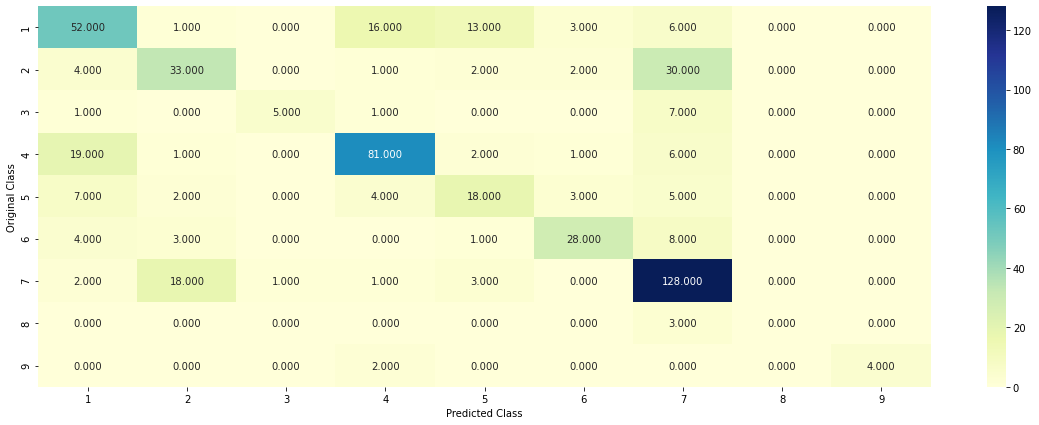

-------------------- Precision matrix (Columm Sum=1) --------------------


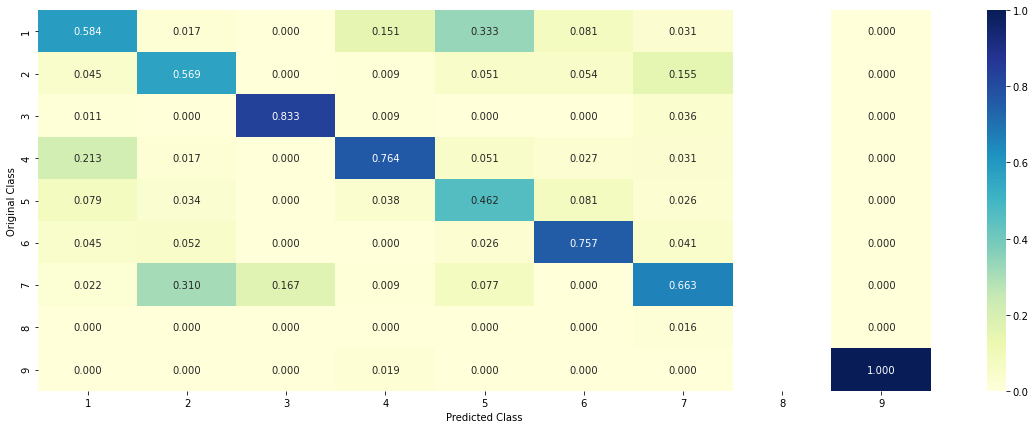

-------------------- Recall matrix (Row Sum=1) --------------------


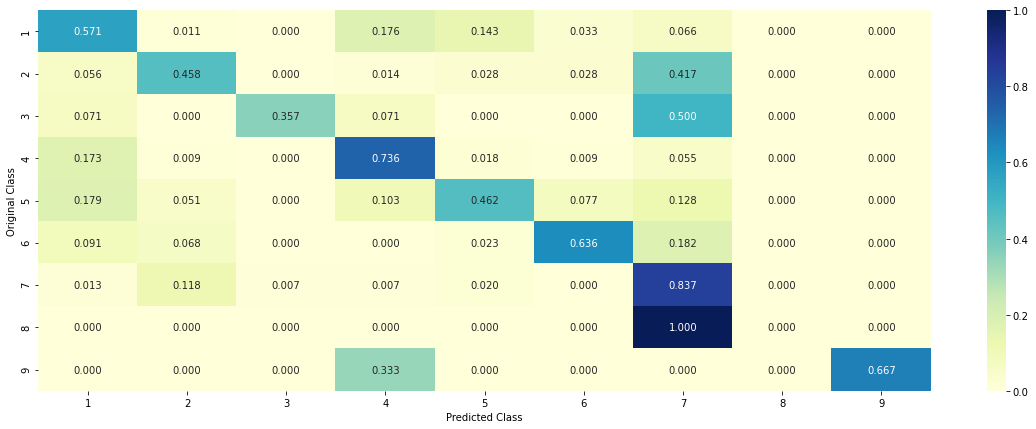

In [150]:
#testing with best parameter and get the confusion matrices
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2',loss='hinge',random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train, cv_x_onehotCoding, y_cv, clf)

In [151]:
# I will still use the Logistic regerssion with balancing because it has low missclassified points
# Because  we have done balancing in the SvM case also hence precision and recall mtrix is good ,also for low frequncy labels

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [152]:
y_pred_test= sig_clf.predict(test_x_onehotCoding)

In [153]:
corrrect_classified_pts= [i for i in range(len(y_test)) if y_test[i]== y_pred_test[i]]

In [154]:
incorrrect_classified_pts= [i for i in  range(len(y_test)) if y_test[i] != y_pred_test[i]]

In [155]:
corrrect_classified_pts[:5]

[1, 3, 4, 5, 8]

In [156]:
incorrrect_classified_pts[:5]

[0, 2, 6, 7, 13]

In [157]:
test_point_index= 1
predicted_cls= sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])

Predicted Class : 1
Predicted Class Probabilities: [[0.6861 0.0581 0.0065 0.1013 0.0186 0.0244 0.0945 0.0051 0.0053]]
Actual Class : 1


In [158]:
#indicies for top 500 features
no_feature = 500
indicies= np.argsort(-1 * abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indicies[0],test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

--------------------------------------------------
422 Text feature [eto] present in test data point [True]
out of the top  500  features  1 are present in query point


The important features are for interpretation of results only, decision of model is not based on number of important features contributing to it but it is based on the weights(strength) of those features, let's say that  having 'kinosis' will definitely imply it's of class 1 as it is only used there and no other class uses it, but having 'pyto','syncr','theres' will imply that there's 70% chance that it belongs to class 2 even though here 3 features are contributing. This way we should interpret important features.

In [162]:
## Incorrectly classfied point

In [163]:
test_point_index= 2
predicted_cls= sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
#indicies for top 500 features
no_feature = 500
indicies= np.argsort(-1 * abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indicies[0],test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0727 0.0422 0.01   0.0223 0.7935 0.0036 0.0475 0.0037 0.0045]]
Actual Class : 1
--------------------------------------------------
396 Text feature [ets2] present in test data point [True]
416 Text feature [pea3] present in test data point [True]
out of the top  500  features  2 are present in query point


# Random Forest Classifier


#### (With one hot encoding)

In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------


In [159]:
# we know Random forest doesnt work well with the HD data, But its very powerful Hence we will try with both kind of featurization

In [74]:
n_estimators = [100,200,500,1000,2000]
max_depth = [5, 10,15]
cv_log_error_array = []

for i in n_estimators:
    for j in max_depth:
        clf= RandomForestClassifier(n_estimators=i ,max_depth=j,random_state=42,criterion='gini',n_jobs=-1)
        clf.fit(train_x_onehotCoding,y_train)
        sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
        sig_clf.fit(train_x_onehotCoding,y_train)
        sig_clf_probs= sig_clf.predict_proba(cv_x_onehotCoding)
        loss= log_loss(y_cv,sig_clf_probs,labels= clf.classes_)
        cv_log_error_array.append(loss)
        print("for n_estimators =", i,"and max depth = ", j, "The Log loss is ", loss)
        

for n_estimators = 100 and max depth =  5 The Log loss is  1.2557697449659493
for n_estimators = 100 and max depth =  10 The Log loss is  1.1762503628115133
for n_estimators = 100 and max depth =  15 The Log loss is  1.1715216134612059
for n_estimators = 200 and max depth =  5 The Log loss is  1.247960668204971
for n_estimators = 200 and max depth =  10 The Log loss is  1.1675033534360773
for n_estimators = 200 and max depth =  15 The Log loss is  1.1655115863397143
for n_estimators = 500 and max depth =  5 The Log loss is  1.2442980806360961
for n_estimators = 500 and max depth =  10 The Log loss is  1.1603124869111403
for n_estimators = 500 and max depth =  15 The Log loss is  1.1604664504193933
for n_estimators = 1000 and max depth =  5 The Log loss is  1.240758121750703
for n_estimators = 1000 and max depth =  10 The Log loss is  1.1579807944831022
for n_estimators = 1000 and max depth =  15 The Log loss is  1.1602538096600206
for n_estimators = 2000 and max depth =  5 The Log loss

In [81]:
clf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_responseCoding,y_train)
predict_y = sig_clf.predict_proba(train_x_responseCoding)
print( "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print( "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print( "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

The train log loss is: 0.0357778702039675
The cross validation log loss is: 1.6345055699512074
The test log loss is: 1.6522319516359714


In [75]:
#lets try Grid Search CV

from sklearn.model_selection import GridSearchCV

clf= RandomForestClassifier(random_state=42,criterion='gini',n_jobs=-1)
clf.fit(train_x_onehotCoding,y_train)

param = {'n_estimators' :[100,200,500,1000,2000],'max_depth' : [5, 10,15]}

clf2= GridSearchCV(clf,param_grid=param,n_jobs=-1,scoring='neg_log_loss',cv=3,verbose=2)

In [76]:
clf2.fit(train_x_onehotCoding,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]},
             scoring='neg_log_loss', verbose=2)

In [78]:
clf2.best_params_

{'max_depth': 15, 'n_estimators': 2000}

In [ ]:
#So
#for n_estimators = 2000 and max depth =  10 The Log loss is  1.157532428501994 is best result

Log loss : 1.1602079245435177
Number of mis-classified points : 0.38721804511278196
------------------------------ Confusion matrix --------------------


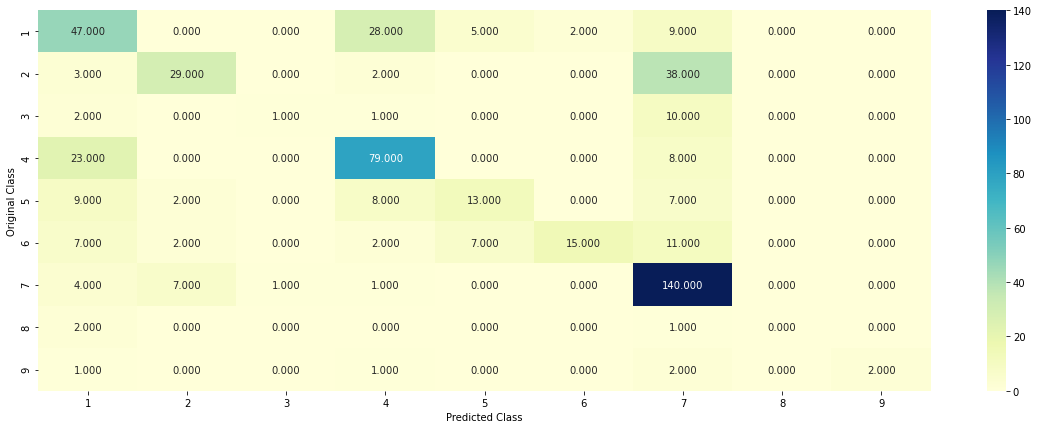

-------------------- Precision matrix (Columm Sum=1) --------------------


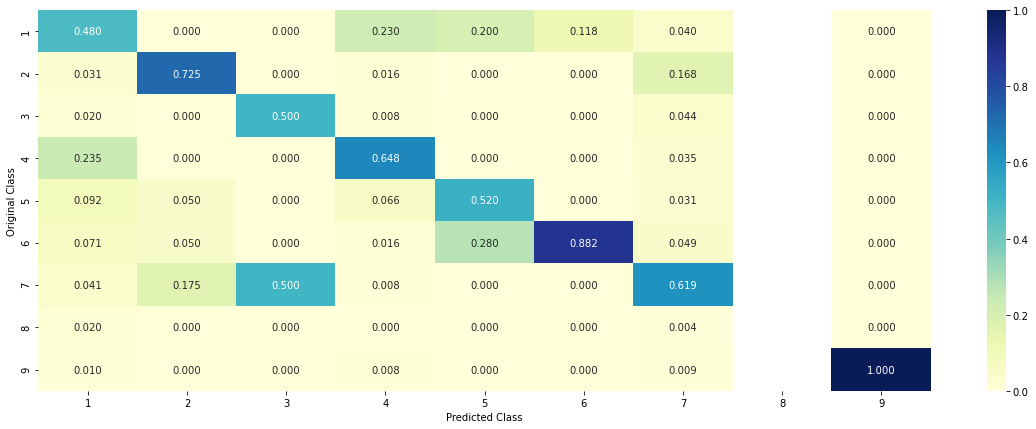

-------------------- Recall matrix (Row Sum=1) --------------------


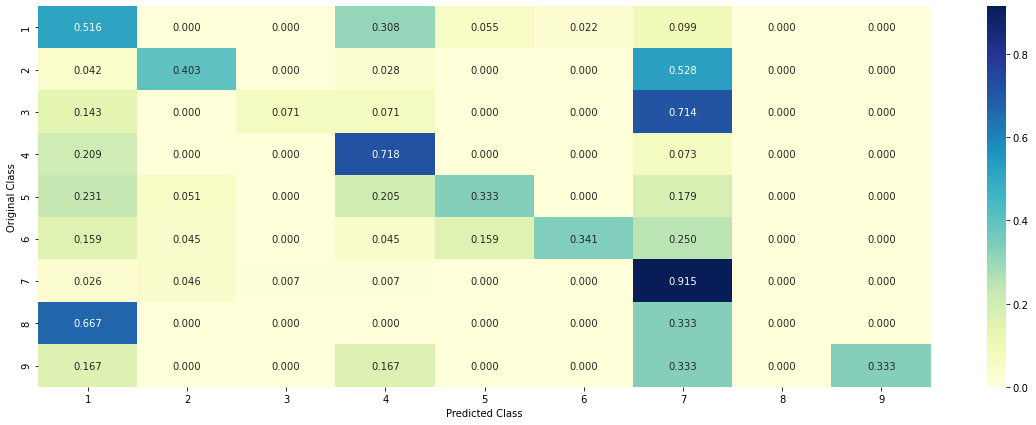

In [79]:
#retrain with ebst params
clf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=15, random_state=42, n_jobs=-1)
#clf.fit(train_x_onehotCoding,y_train)
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train,cv_x_onehotCoding,y_cv, clf)

In [10]:
#log reg with the balancing was better because its faster and less missclassified points,alos log loss is also better

In [15]:
## WIth Response Coding

In [67]:
#WIth hyperparameter tuning
from sklearn.model_selection import GridSearchCV

clf= RandomForestClassifier(random_state=42,criterion='gini',n_jobs=-1)
clf.fit(train_x_responseCoding,y_train)
param = {'n_estimators':[10,20,50,100,500,1000],'max_depth' : [2,3,5,10]}

clf2= GridSearchCV(clf,param_grid=param,n_jobs=-1,scoring='neg_log_loss',cv=3,verbose=2)

In [68]:
clf2.fit(train_x_responseCoding,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 500, 1000]},
             scoring='neg_log_loss', verbose=2)

In [69]:
clf2.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=1000, n_jobs=-1,
                       random_state=42)

Log loss : 1.819005355123721
Number of mis-classified points : 0.75
------------------------------ Confusion matrix --------------------


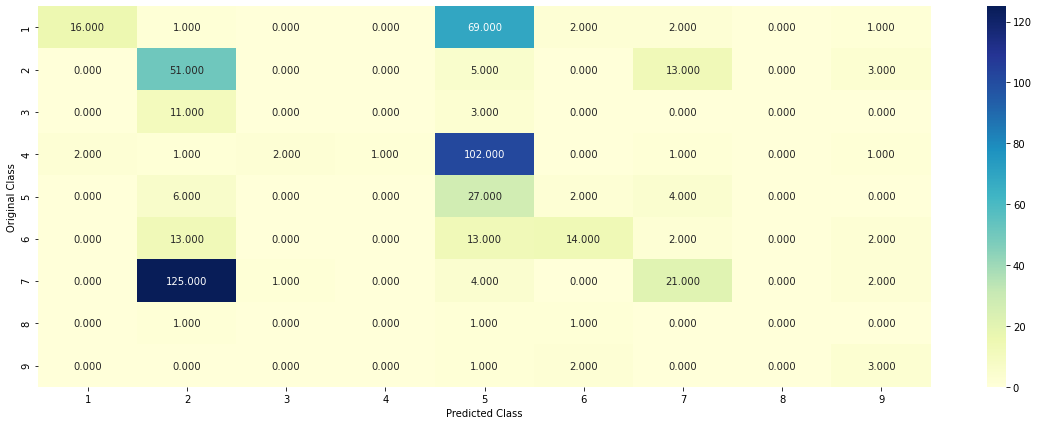

-------------------- Precision matrix (Columm Sum=1) --------------------


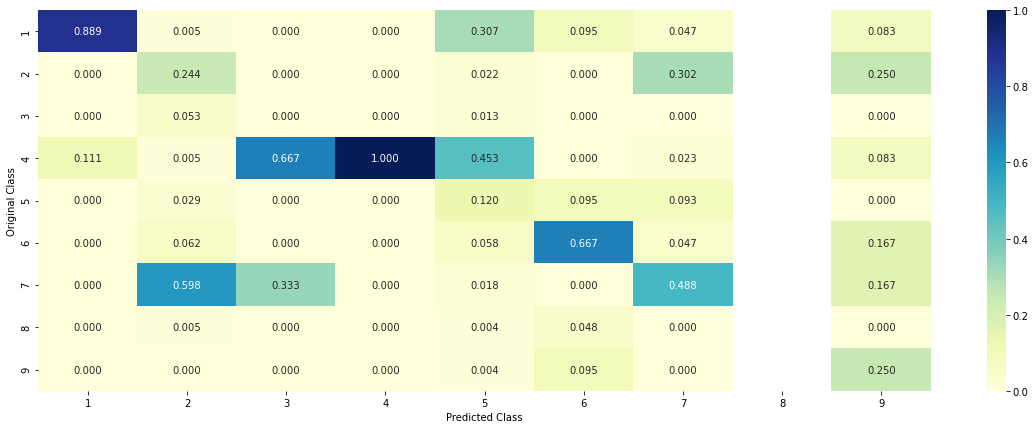

-------------------- Recall matrix (Row Sum=1) --------------------


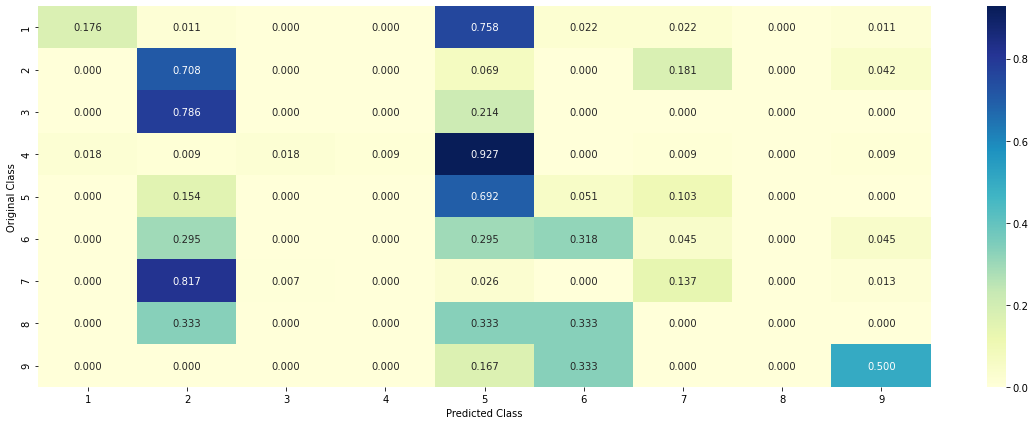

In [46]:
#retrain with ebst params
clf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=2, random_state=42, n_jobs=-1)
#clf.fit(train_x_responseCoding,y_train)
predict_and_plot_confusion_matrix(train_x_responseCoding, y_train,cv_x_responseCoding,y_cv, clf)

In [73]:
#try the traditional ways

n_estimators = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_dict = {}

for i in n_estimators:
    for j in max_depth:
        clf= RandomForestClassifier(n_estimators=i ,max_depth=j,random_state=42,criterion='gini',n_jobs=-1)
        clf.fit(train_x_responseCoding,y_train)
        sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
        sig_clf.fit(train_x_responseCoding,y_train)
        sig_clf_probs= sig_clf.predict_proba(cv_x_responseCoding)
        loss= log_loss(y_cv,sig_clf_probs,labels= clf.classes_)
        cv_log_error_dict[str(i)+"_"+str(j)]=loss
        print("for n_estimators =", i,"and max depth = ", j, "The Log loss is ", loss)
        

for n_estimators = 10 and max depth =  2 The Log loss is  1.8190053551237213
for n_estimators = 10 and max depth =  3 The Log loss is  1.5993172374729536
for n_estimators = 10 and max depth =  5 The Log loss is  1.6206826539889878
for n_estimators = 10 and max depth =  10 The Log loss is  1.8918679818227548
for n_estimators = 50 and max depth =  2 The Log loss is  1.6620055903205242
for n_estimators = 50 and max depth =  3 The Log loss is  1.420428875877795
for n_estimators = 50 and max depth =  5 The Log loss is  1.332833879417896
for n_estimators = 50 and max depth =  10 The Log loss is  1.625166070728951
for n_estimators = 100 and max depth =  2 The Log loss is  1.5418306427422406
for n_estimators = 100 and max depth =  3 The Log loss is  1.4516722849630161
for n_estimators = 100 and max depth =  5 The Log loss is  1.361359305865922
for n_estimators = 100 and max depth =  10 The Log loss is  1.6317340239515046
for n_estimators = 200 and max depth =  2 The Log loss is  1.586732791605

In [62]:
key_list = list(cv_log_error_dict.keys())
val_list = list(cv_log_error_dict.values())
best_param=key_list[val_list.index(min(val_list))]

In [64]:
best_param.split("_")

['50', '5']

In [71]:
clf = RandomForestClassifier(n_estimators=int(best_param.split("_")[0]), criterion='gini', max_depth=int(best_param.split("_")[1]), random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_responseCoding,y_train)
predict_y = sig_clf.predict_proba(train_x_responseCoding)
print( "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print( "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print( "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

The train log loss is: 0.0688270716296116
The cross validation log loss is: 1.3328338794184469
The test log loss is: 1.337935246826298


In [ ]:
#this model is overfit because train loss is much much lesser than test loss

Log loss : 1.6527037361702073
Number of mis-classified points : 0.5507518796992481
------------------------------ Confusion matrix --------------------


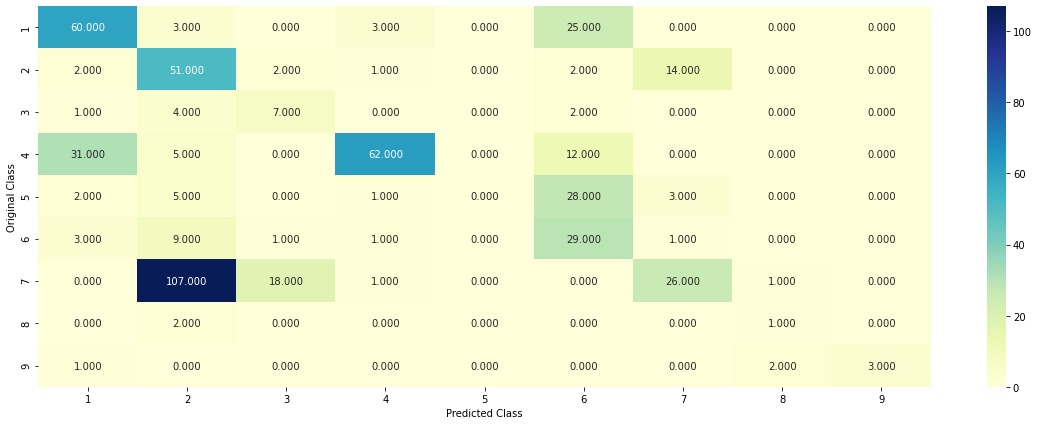

-------------------- Precision matrix (Columm Sum=1) --------------------


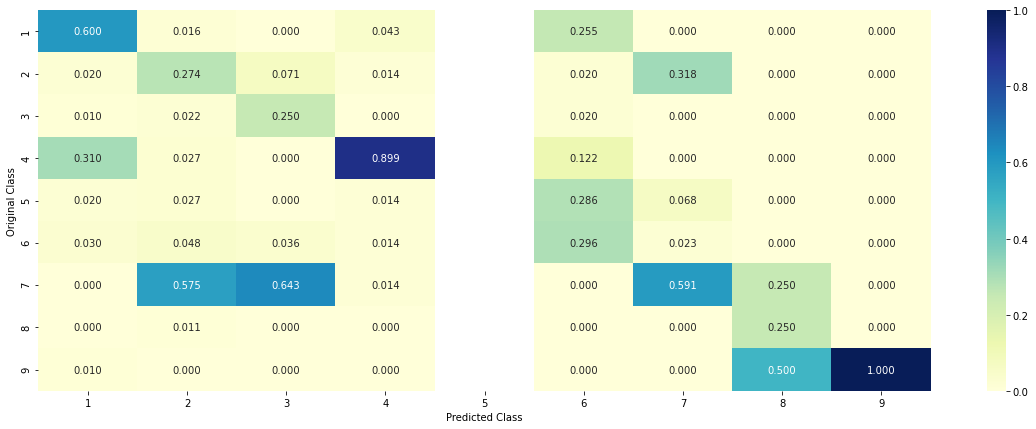

-------------------- Recall matrix (Row Sum=1) --------------------


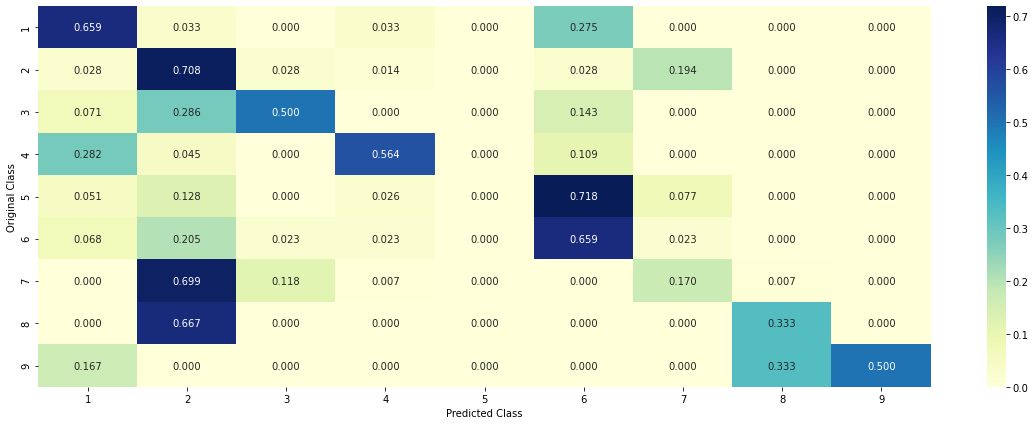

In [72]:
#retrain with best params
clf = RandomForestClassifier(n_estimators=int(best_param.split("_")[0]), criterion='gini', max_depth=int(best_param.split("_")[1]), random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding,y_train)
sig_clf= CalibratedClassifierCV(clf,method='sigmoid')
sig_clf.fit(train_x_responseCoding,y_train)
#clf.fit(train_x_responseCoding,y_train)
predict_and_plot_confusion_matrix(train_x_responseCoding, y_train,cv_x_responseCoding,y_cv, sig_clf)

In [7]:
#Because the loss difference btwn traun and test and the missclasfied points as high as 0.55 this is worsth than the random model
#Hence its totally useless
#probably this response coding featurization is not working here
# we can see ,we should keep our eyes open, In classification ,we should be very much be careful about the test loss and the 
#percenteage of missclassified points

This happened because of this =

In this link shared by you = https://www.kaggle.com/general/8005 for resonse encoding, one of the comment says =
It's a good approach. Just be very careful as you employ this technique because it can introduce leakage. Linoff and Berry, if I recall correctly, in their book assume you're working with a traditional train-validate-test split of a large dataset, which is the default SAS Enterprise Miner paradigm (not surprisingly because both Gordon and Michael teach a data mining class for SAS). In that case you should make sure that rates are built only using the response from the train set. In Kaggle competitions is far more common to use k fold cross validation. As part of that loop you'd need to make sure you recalculate your rates every time in the loop, using only response from the train set.

I fell for this in my first Kaggle competition, the Amazon challenge. I was getting great results in SAS which did not translate in Leaderboard.

Long story short, this technique works great, but be careful how you implement it.

Therefore, if you use response coding or any vectorizations(count vectorizer, TFIDF vectorizer) in general, we have to apply techniques to train and cv data separately hence there is a data leakage with k-fold cv.

<h2>4.7 Stack the models </h2>

<h3>4.7.1 testing with hyper parameter tuning</h3>

In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/mathematical-derivation-copy-8/
# --------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------


In [11]:
#stancking all well performing models

In [3]:

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")


In [4]:
sig_clf1.fit(train_x_onehotCoding, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, y_train)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)

Logistic Regression :  Log Loss: 1.11
Support vector machines : Log Loss: 1.72
Naive Bayes : Log Loss: 1.25
--------------------------------------------------


In [5]:
#so in stacking all best performing mdoel is stacked and another meta model is used to predict the output of those results

In [6]:
alpha= [0.0001,0.001,0.01,0.1,1,10]
best_alpha=999
for i in alpha:
    lr= LogisticRegression(C=i)
    sclf= StackingClassifier(classifiers=[sig_clf1,sig_clf2,sig_clf3],meta_classifier=lr,use_probas=True)
    sclf.fit(train_x_onehotCoding,y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_x_onehotCoding))))
    log_error= log_loss(y_cv,sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha >log_error:
        best_alpha =log_error   

Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 1.819
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.725
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.327
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.141
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.362
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.612


<h3>4.7.2 testing the model with the best hyper parameters</h3>

In [7]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- y_test))/y_test.shape[0])


Log loss (train) on the stacking classifier : 0.5137506565201605
Log loss (CV) on the stacking classifier : 1.141471968739974
Log loss (test) on the stacking classifier : 1.0975866633780051
Number of missclassified point : 0.32781954887218046


------------------------------ Confusion matrix --------------------


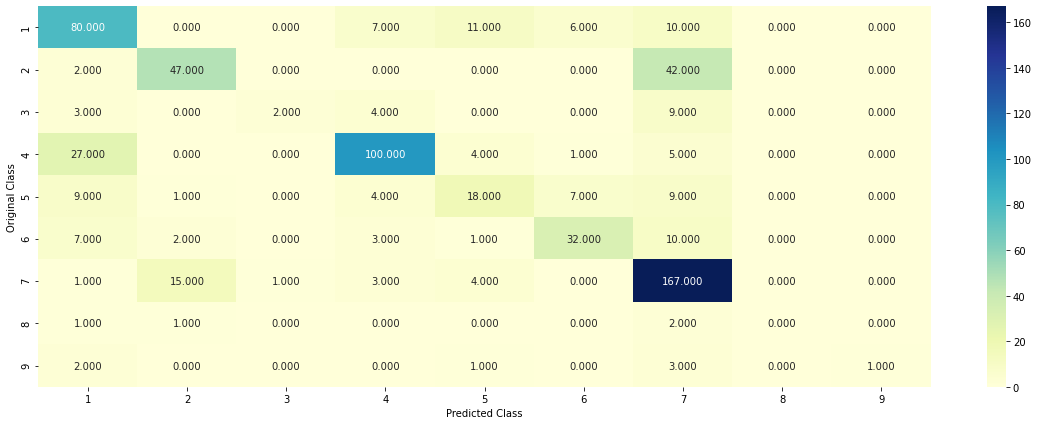

-------------------- Precision matrix (Columm Sum=1) --------------------


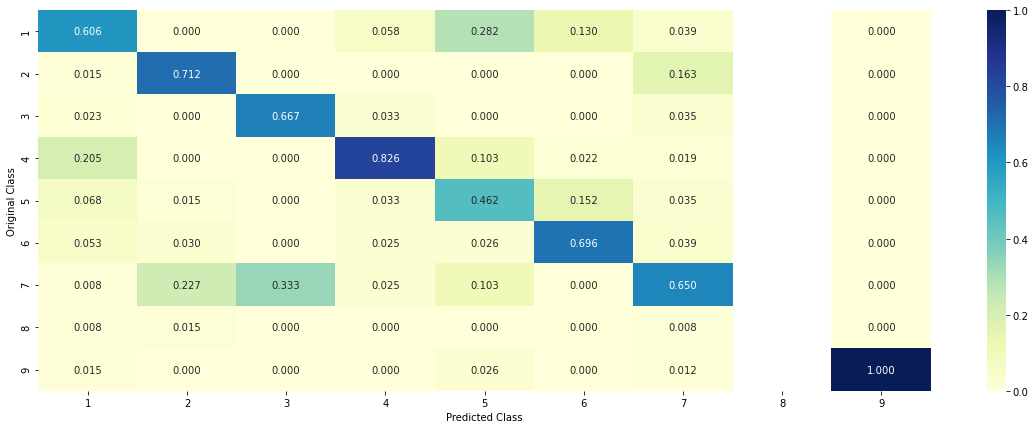

-------------------- Recall matrix (Row Sum=1) --------------------


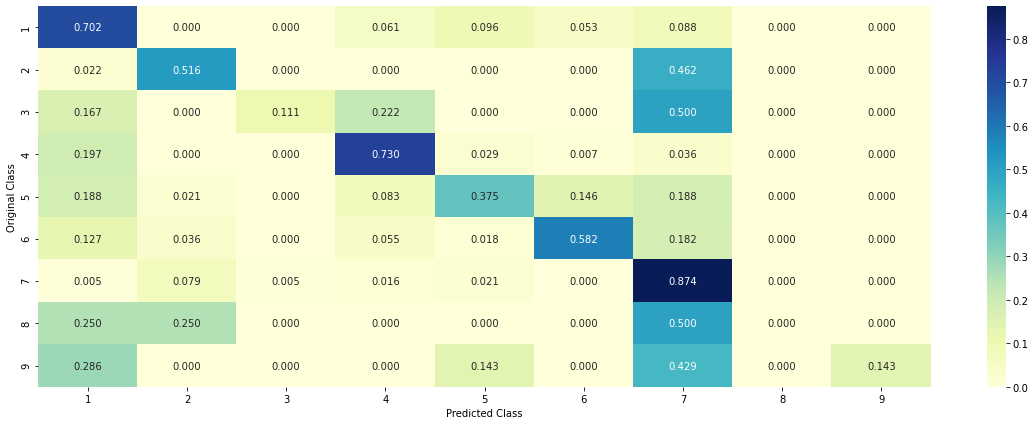

In [13]:
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(test_x_onehotCoding))

In [15]:
#With stacking classifier we have attained a good model overall
# But it has no way to get feature importance and Interpreting the prediction
#Not advisable in this case

<h3>4.7.3 Maximum Voting classifier </h3>

In [16]:
#The maximum voting classifier expects the probabilty values, and does the majority vote,kind of ensemble but not interpretable

In [17]:
clf4 = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=15, random_state=42, n_jobs=-1)
clf4.fit(train_x_onehotCoding,y_train)
sig_clf4= CalibratedClassifierCV(clf4,method='sigmoid')
sig_clf4.fit(train_x_onehotCoding,y_train)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(max_depth=15,
                                                             n_estimators=2000,
                                                             n_jobs=-1,
                                                             random_state=42))

In [20]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

from sklearn.ensemble import VotingClassifier

vclf= VotingClassifier(estimators=[('lr',sig_clf1),('svc',sig_clf2),('nb',sig_clf3)],voting='soft')
#voting ='soft' means we are going to use the probability values instead of the actual labels
vclf.fit(train_x_onehotCoding,y_train)
print("Log loss (train) on VotingClassifier ",log_loss(y_train,vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (cv) on VotingClassifier ",log_loss(y_cv,vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on VotingClassifier ",log_loss(y_test,vclf.predict_proba(test_x_onehotCoding)))


Log loss (train) on VotingClassifier  0.8740449095190229
Log loss (cv) on VotingClassifier  1.185481528470144
Log loss (test) on VotingClassifier  1.1815979886437886


In [22]:
#no of missclassified points
print("Number of missclassified points: ",np.count_nonzero((vclf.predict(test_x_onehotCoding)-y_test))/y_test.shape[0])

Number of missclassified points:  0.3398496240601504


------------------------------ Confusion matrix --------------------


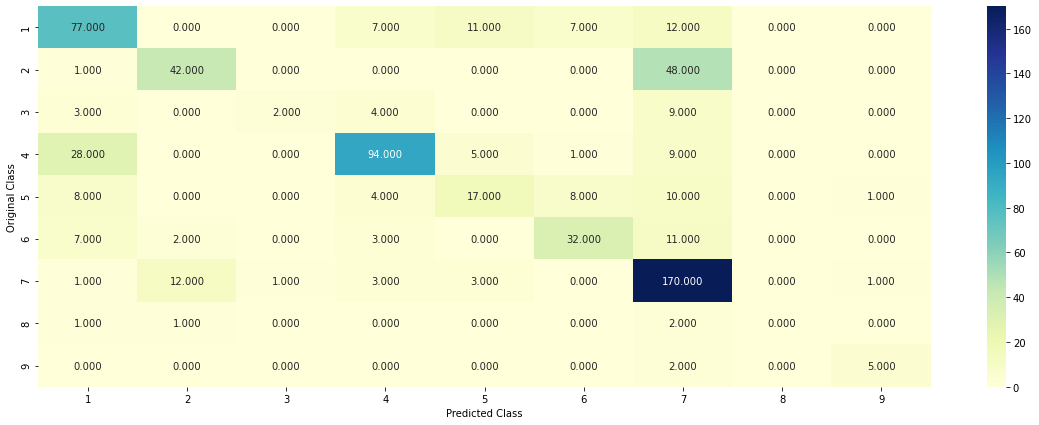

-------------------- Precision matrix (Columm Sum=1) --------------------


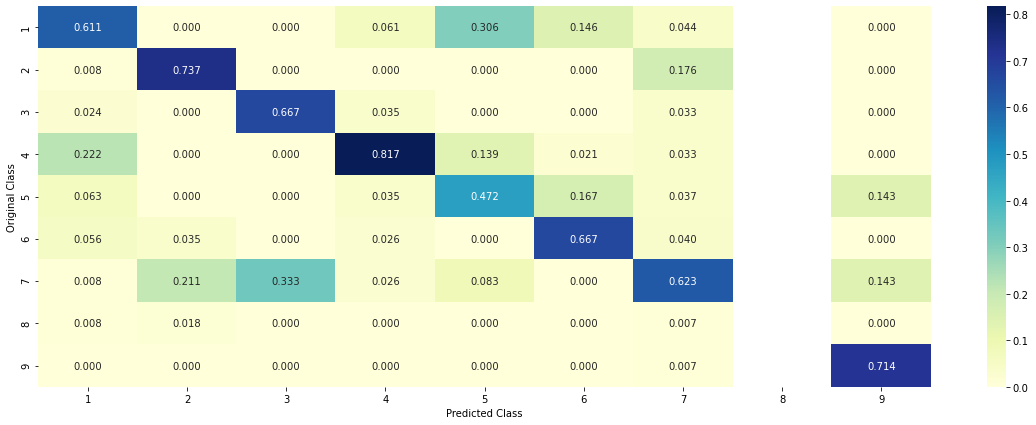

-------------------- Recall matrix (Row Sum=1) --------------------


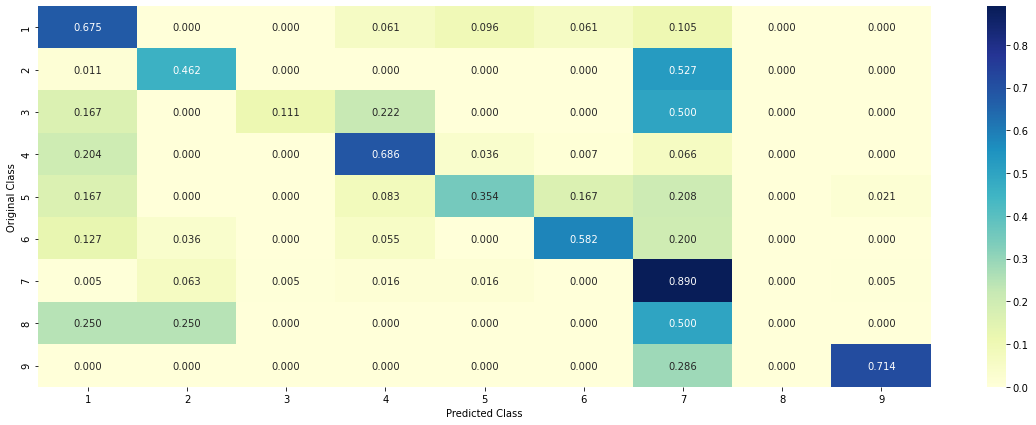

In [23]:
plot_confusion_matrix(y_test,vclf.predict(test_x_onehotCoding))

In [24]:
#amongst all classifier we have seen ,
#best one is Logistic Regression with balancing ,
#its test log loss is low and missclassfied point percentage is also least amongst all(excepct stacking and Maj voting)
# Also Log Reg is very much interpreatble


# Assignments

<ol>
    <li> Apply All the models with tf-idf features (Replace CountVectorizer with tfidfVectorizer and run the same cells)</li>
    <li> Instead of using all the words in the dataset, use only the top 1000 words based of tf-idf values</li>
    <li>Apply Logistic regression with CountVectorizer Features, including both unigrams and bigrams</li>
    <li> Try any of the feature engineering techniques discussed in the course to reduce the CV and test log-loss to a value less than 1.0</li>
</ol>